# Data set 

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import joblib
from nltk.tokenize import RegexpTokenizer
import nltk
from imblearn.combine import SMOTETomek

nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english')
default_tokenizer=RegexpTokenizer(r"\w+")
from wordcloud import WordCloud , ImageColorGenerator
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import numpy as np # linear algebra
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
jobdata = pd.read_csv("fake_job_postings.csv");
jobdata.head()

job_id  ... fraudulent
0       1  ...          0
1       2  ...          0
2       3  ...          0
3       4  ...          0
4       5  ...          0

[5 rows x 18 columns]

In [8]:
jobdata.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [9]:
jobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [10]:
jobdata.shape

(17880, 18)

In [11]:
jobdata.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [12]:
jobdata.describe()

job_id  telecommuting  ...  has_questions    fraudulent
count  17880.000000   17880.000000  ...   17880.000000  17880.000000
mean    8940.500000       0.042897  ...       0.491723      0.048434
std     5161.655742       0.202631  ...       0.499945      0.214688
min        1.000000       0.000000  ...       0.000000      0.000000
25%     4470.750000       0.000000  ...       0.000000      0.000000
50%     8940.500000       0.000000  ...       0.000000      0.000000
75%    13410.250000       0.000000  ...       1.000000      0.000000
max    17880.000000       1.000000  ...       1.000000      1.000000

[8 rows x 5 columns]

In [13]:
jobdata.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [14]:
datamiss = jobdata.isna()
datamiss

job_id  title  location  ...  industry  function  fraudulent
0       False  False     False  ...      True     False       False
1       False  False     False  ...     False     False       False
2       False  False     False  ...      True      True       False
3       False  False     False  ...     False     False       False
4       False  False     False  ...     False     False       False
...       ...    ...       ...  ...       ...       ...         ...
17875   False  False     False  ...     False     False       False
17876   False  False     False  ...     False     False       False
17877   False  False     False  ...      True      True       False
17878   False  False     False  ...     False     False       False
17879   False  False     False  ...     False     False       False

[17880 rows x 18 columns]

In [15]:
datamisssum = datamiss.sum()
datamisssum

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [16]:
perccentage = (datamisssum/17880 )*100
perccentage

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64

In [17]:
#Dropping 'job_id' as it is irrelevant to fraudulent
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']
complex_features = ['location', 'salary_range']
bin_features = ['telecommuting', 'has_company_logo', 'has_questions']
cat_features = ['department', 'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']

In [18]:
jobdata.describe(include='all').loc['unique', :]

job_id                   NaN
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting            NaN
has_company_logo         NaN
has_questions            NaN
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent               NaN
Name: unique, dtype: object

In [19]:
jobdata["company_profile"].unique

<bound method Series.unique of 0        We're Food52, and we've created a groundbreaki...
1        90 Seconds, the worlds Cloud Video Production ...
2        Valor Services provides Workforce Solutions th...
3        Our passion for improving quality of life thro...
4        SpotSource Solutions LLC is a Global Human Cap...
                               ...                        
17875    Vend is looking for some awesome new talent to...
17876    WebLinc is the e-commerce platform and service...
17877    We Provide Full Time Permanent Positions for m...
17878                                                  NaN
17879    Vend is looking for some awesome new talent to...
Name: company_profile, Length: 17880, dtype: object>

In [20]:
corr_matrix=jobdata.corr()

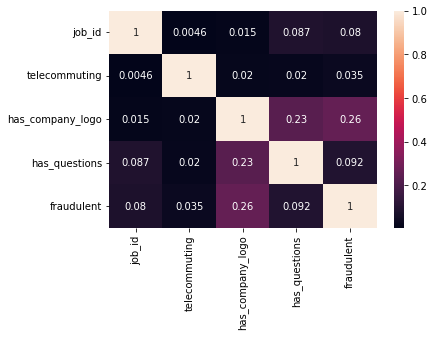

In [21]:
sns.heatmap(data=jobdata.corr().abs(), annot=True)
plt.show()

In [22]:
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                  job_id  telecommuting  ...  has_questions  fraudulent
job_id               NaN       0.004559  ...       0.087025    0.079872
telecommuting        NaN            NaN  ...       0.020345    0.034523
has_company_logo     NaN            NaN  ...       0.233932    0.261971
has_questions        NaN            NaN  ...            NaN    0.091627
fraudulent           NaN            NaN  ...            NaN         NaN

[5 rows x 5 columns]


In [23]:
corr_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_to_drop)

[]


In [24]:
df=jobdata[['description', 'fraudulent']]

df_real=df.loc[df['fraudulent']==0]
df_fake=df.loc[df['fraudulent']==1]

In [25]:
df['description'] = df['description'].astype('str')
df_fake['description'] = df_fake['description'].astype('str')


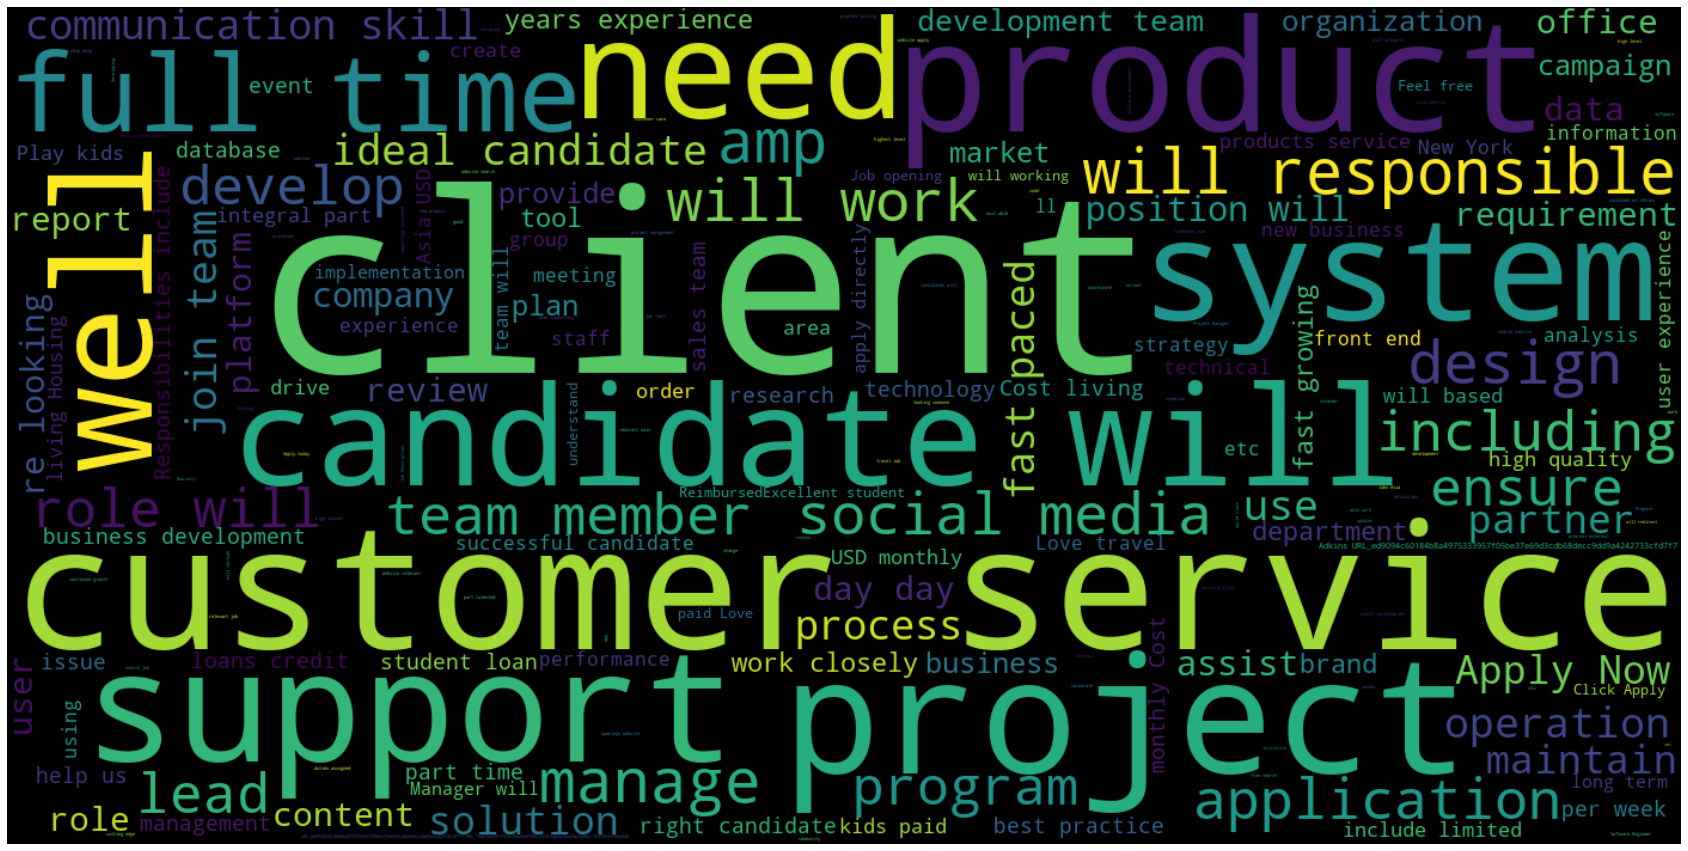

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(df['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

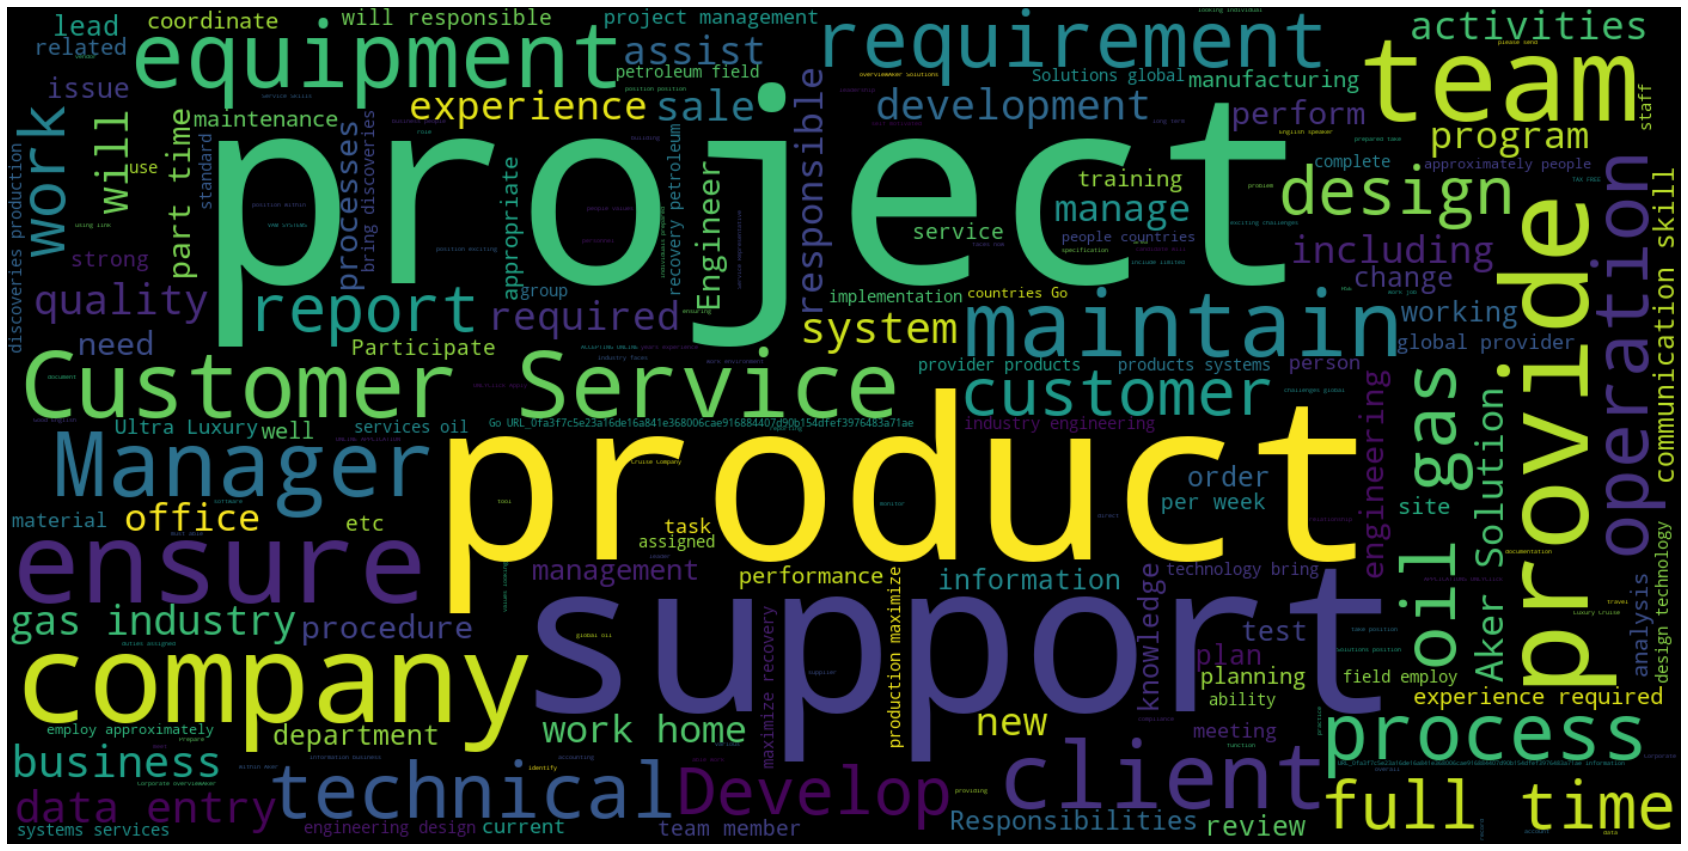

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(df_fake['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


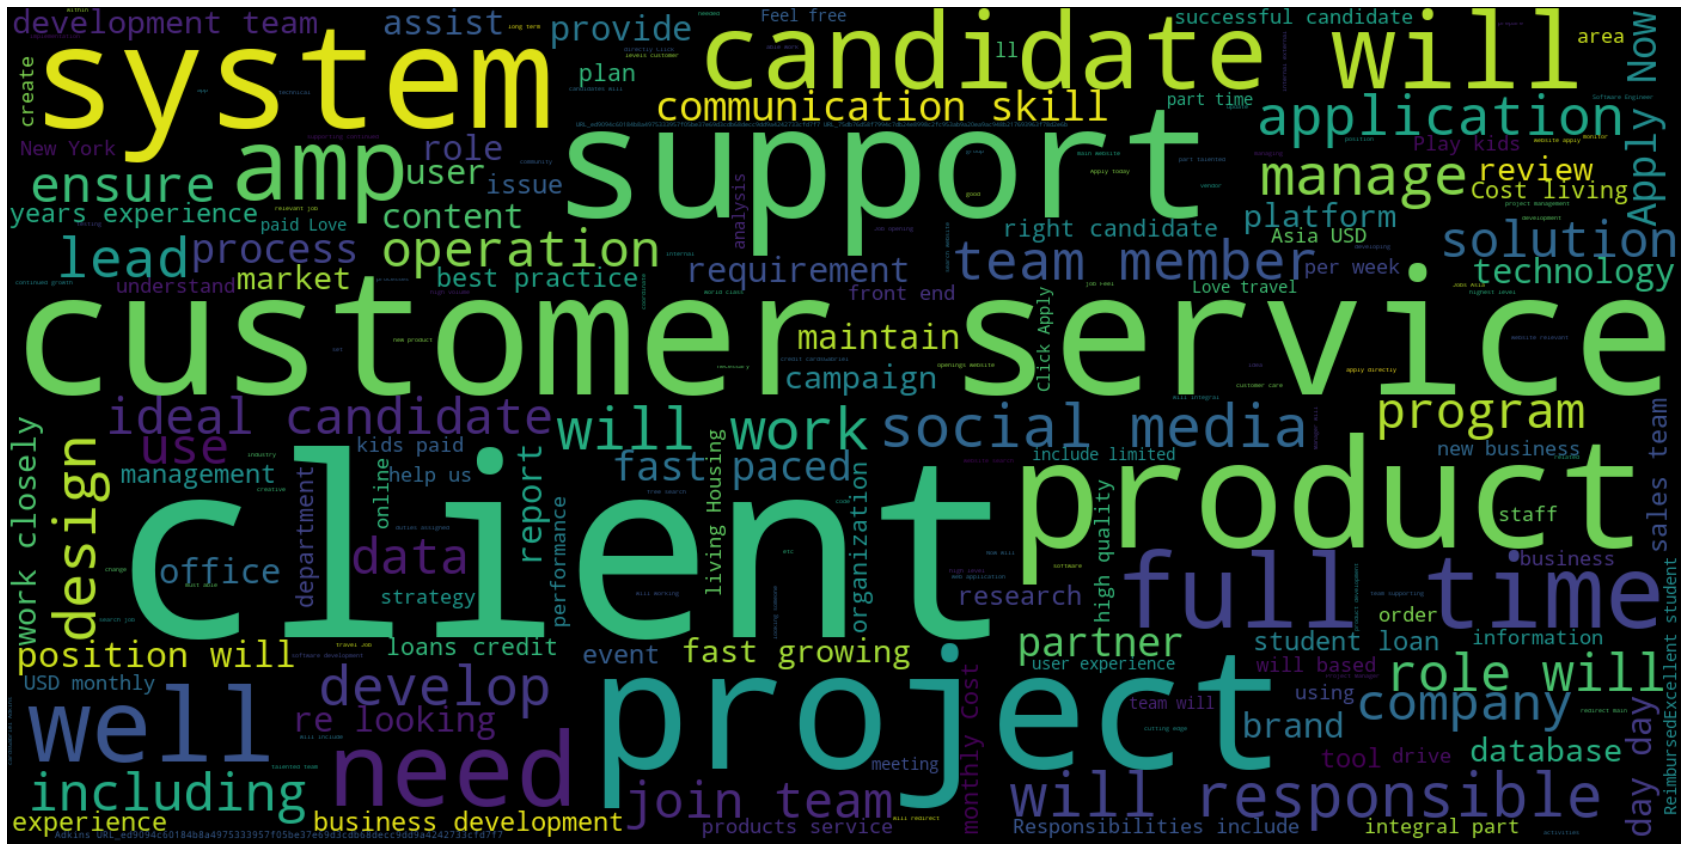

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(df_real['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [29]:
#Dropping 'job_id' as it is irrelevant to fraudulent
text_features = ['title', 'company_profile', 'description', 'requirements', 'benefits']
complex_features = ['location', 'salary_range']
bin_features = ['telecommuting', 'has_company_logo', 'has_questions']
cat_features = ['department', 'employment_type', 'required_experience', 
                'required_education', 'industry', 'function']

In [30]:
jobdata.describe(include='all').loc['unique', :]

job_id                   NaN
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting            NaN
has_company_logo         NaN
has_questions            NaN
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent               NaN
Name: unique, dtype: object

In [31]:
jobdata["company_profile"].unique

<bound method Series.unique of 0        We're Food52, and we've created a groundbreaki...
1        90 Seconds, the worlds Cloud Video Production ...
2        Valor Services provides Workforce Solutions th...
3        Our passion for improving quality of life thro...
4        SpotSource Solutions LLC is a Global Human Cap...
                               ...                        
17875    Vend is looking for some awesome new talent to...
17876    WebLinc is the e-commerce platform and service...
17877    We Provide Full Time Permanent Positions for m...
17878                                                  NaN
17879    Vend is looking for some awesome new talent to...
Name: company_profile, Length: 17880, dtype: object>

In [32]:
exp = dict(jobdata.required_experience.value_counts())
exp

{'Associate': 2297,
 'Director': 389,
 'Entry level': 2697,
 'Executive': 141,
 'Internship': 381,
 'Mid-Senior level': 3809,
 'Not Applicable': 1116}

In [33]:
edu = dict(jobdata.required_education.value_counts())
edu

{'Associate Degree': 274,
 "Bachelor's Degree": 5145,
 'Certification': 170,
 'Doctorate': 26,
 'High School or equivalent': 2080,
 "Master's Degree": 416,
 'Professional': 74,
 'Some College Coursework Completed': 102,
 'Some High School Coursework': 27,
 'Unspecified': 1397,
 'Vocational': 49,
 'Vocational - Degree': 6,
 'Vocational - HS Diploma': 9}

In [34]:
emp_type = dict(jobdata.employment_type.value_counts())
emp_type

{'Contract': 1524,
 'Full-time': 11620,
 'Other': 227,
 'Part-time': 797,
 'Temporary': 241}

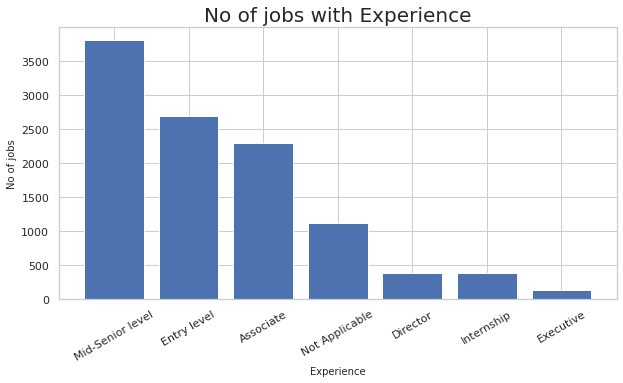

In [35]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title('No of jobs with Experience',size =20)
plt.xlabel('Experience',size = 10)
plt.ylabel('No of jobs',size = 10)
plt.xticks(rotation = 30)
plt.show()

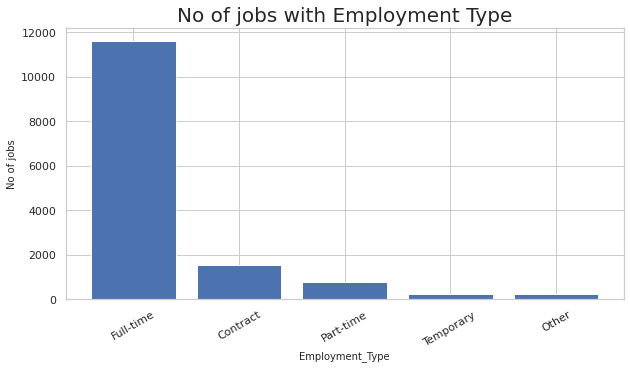

In [36]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.bar(emp_type.keys(), emp_type.values())
plt.title('No of jobs with Employment Type',size =20)
plt.xlabel('Employment_Type',size = 10)
plt.ylabel('No of jobs',size = 10)
plt.xticks(rotation = 30)
plt.show()

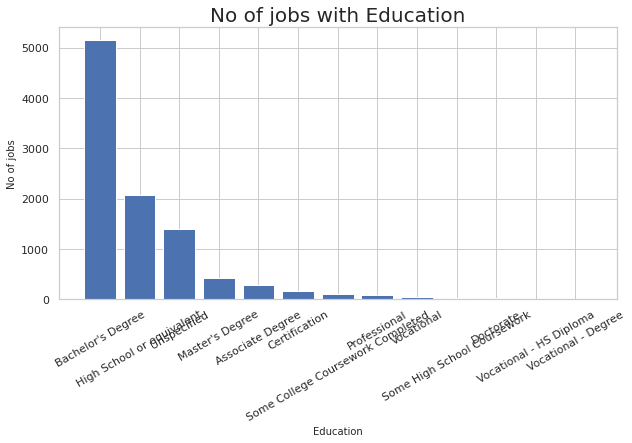

In [37]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.bar(edu.keys(), edu.values())
plt.title('No of jobs with Education',size =20)
plt.xlabel('Education',size = 10)
plt.ylabel('No of jobs',size = 10)
plt.xticks(rotation = 30)
plt.show()

In [38]:
jobdata[jobdata.fraudulent ==0].title.value_counts()[:10]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64

In [39]:
jobdata[jobdata.fraudulent ==1].title.value_counts()[:10]

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Name: title, dtype: int64

In [40]:
corr_matrix=jobdata.corr()

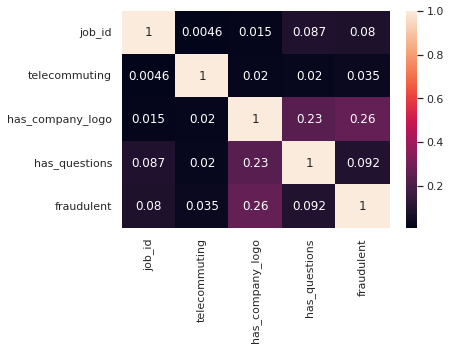

In [41]:
sns.heatmap(data=jobdata.corr().abs(), annot=True)
plt.show()

In [42]:
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                  job_id  telecommuting  ...  has_questions  fraudulent
job_id               NaN       0.004559  ...       0.087025    0.079872
telecommuting        NaN            NaN  ...       0.020345    0.034523
has_company_logo     NaN            NaN  ...       0.233932    0.261971
has_questions        NaN            NaN  ...            NaN    0.091627
fraudulent           NaN            NaN  ...            NaN         NaN

[5 rows x 5 columns]


In [43]:
corr_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_to_drop)

[]


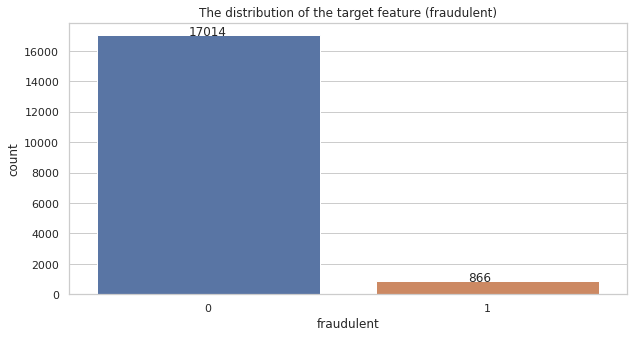

In [44]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(jobdata.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

# Step1

In [45]:
data1=jobdata.copy()
data1 = data1.drop(
        ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements',
         'benefits'], axis=1)

In [46]:
data1.isna().sum()

telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [47]:
data1=data1.dropna()
data1.reset_index(inplace = True, drop = True)
data1.shape

(7615, 9)

In [48]:
data1.isna().sum()

telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [49]:
data1['fraudulent']=data1['fraudulent'].astype('category')
print(data1.dtypes)

telecommuting             int64
has_company_logo          int64
has_questions             int64
employment_type          object
required_experience      object
required_education       object
industry                 object
function                 object
fraudulent             category
dtype: object


# BINARY ENCODER

In [50]:
!pip install category_encoders


In [51]:
import category_encoders as ce


In [52]:
encoder= ce.BinaryEncoder(cols=['employment_type'],return_df=True)
data1=encoder.fit_transform(data1) 
encoder1= ce.BinaryEncoder(cols=['required_experience'],return_df=True)
data1=encoder1.fit_transform(data1) 
encoder2= ce.BinaryEncoder(cols=['required_education'],return_df=True)
data1=encoder2.fit_transform(data1) 
encoder3= ce.BinaryEncoder(cols=['industry'],return_df=True)
data1=encoder3.fit_transform(data1) 
encoder4= ce.BinaryEncoder(cols=['function'],return_df=True)
data1=encoder4.fit_transform(data1) 
data1

telecommuting  has_company_logo  ...  function_5  fraudulent
0                 0                 1  ...           1           0
1                 0                 1  ...           0           0
2                 0                 1  ...           1           0
3                 0                 1  ...           0           0
4                 0                 0  ...           1           0
...             ...               ...  ...         ...         ...
7610              0                 1  ...           1           0
7611              0                 1  ...           0           0
7612              0                 0  ...           1           0
7613              0                 1  ...           1           0
7614              0                 0  ...           1           0

[7615 rows x 28 columns]

In [53]:
data1.isnull().sum()

telecommuting            0
has_company_logo         0
has_questions            0
employment_type_0        0
employment_type_1        0
employment_type_2        0
required_experience_0    0
required_experience_1    0
required_experience_2    0
required_education_0     0
required_education_1     0
required_education_2     0
required_education_3     0
industry_0               0
industry_1               0
industry_2               0
industry_3               0
industry_4               0
industry_5               0
industry_6               0
industry_7               0
function_0               0
function_1               0
function_2               0
function_3               0
function_4               0
function_5               0
fraudulent               0
dtype: int64

In [54]:
X_data = data1.drop(['fraudulent'], axis=1)
X_data_col = X_data.columns
y_data = data1['fraudulent']

In [55]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_data, X_validation_data, y_train_data, y_validation_data = train_test_split(X_train_data, y_train_data,
                                                    train_size=0.8,
                                                    random_state=42)

In [56]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("\nTest Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        

# Models

## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_data = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_data.fit(X_train_data, y_train_data)
print_score(knn_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(knn_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9729

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4651
           1       0.83      0.51      0.63       222

    accuracy                           0.97      4873
   macro avg       0.90      0.75      0.81      4873
weighted avg       0.97      0.97      0.97      4873


Confusion Matrix: 
 [[4628   23]
 [ 109  113]]

ROC AUC: 0.7520

Average Accuracy: 	 0.9649
Accuracy SD: 		 0.0050

Test Result:

accuracy score: 0.9721

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1166
           1       0.79      0.49      0.60        53

    accuracy                           0.97      1219
   macro avg       0.88      0.74      0.80      1219
weighted avg       0.97      0.97      0.97      1219


Confusion Matrix: 
 [[1159    7]
 [  27   26]]

ROC AUC: 0.7423



*prediction on test*

In [58]:
print_score(knn_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9639

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1456
           1       0.65      0.39      0.49        67

    accuracy                           0.96      1523
   macro avg       0.81      0.69      0.73      1523
weighted avg       0.96      0.96      0.96      1523


Confusion Matrix: 
 [[1442   14]
 [  41   26]]

ROC AUC: 0.6892



## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_data = RandomForestClassifier(random_state=42, n_estimators=100)
rf_data.fit(X_train_data, y_train_data)
print_score(rf_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(rf_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9928

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4651
           1       0.94      0.90      0.92       222

    accuracy                           0.99      4873
   macro avg       0.97      0.95      0.96      4873
weighted avg       0.99      0.99      0.99      4873


Confusion Matrix: 
 [[4639   12]
 [  23  199]]

ROC AUC: 0.9469

Average Accuracy: 	 0.9729
Accuracy SD: 		 0.0050

Test Result:

accuracy score: 0.9746

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1166
           1       0.84      0.51      0.64        53

    accuracy                           0.97      1219
   macro avg       0.91      0.75      0.81      1219
weighted avg       0.97      0.97      0.97      1219


Confusion Matrix: 
 [[1161    5]
 [  26   27]]

ROC AUC: 0.7526



*prediction on test*

In [60]:
print_score(rf_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9744

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1456
           1       0.77      0.60      0.67        67

    accuracy                           0.97      1523
   macro avg       0.88      0.79      0.83      1523
weighted avg       0.97      0.97      0.97      1523


Confusion Matrix: 
 [[1444   12]
 [  27   40]]

ROC AUC: 0.7944



## Descion Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
Tree_data = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_data.fit(X_train_data, y_train_data)
print_score(Tree_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(Tree_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9819

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4651
           1       0.92      0.66      0.77       222

    accuracy                           0.98      4873
   macro avg       0.95      0.83      0.88      4873
weighted avg       0.98      0.98      0.98      4873


Confusion Matrix: 
 [[4639   12]
 [  76  146]]

ROC AUC: 0.8275

Average Accuracy: 	 0.9514
Accuracy SD: 		 0.0051

Test Result:

accuracy score: 0.9582

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1166
           1       0.53      0.40      0.45        53

    accuracy                           0.96      1219
   macro avg       0.75      0.69      0.71      1219
weighted avg       0.95      0.96      0.96      1219


Confusion Matrix: 
 [[1147   19]
 [  32   21]]

ROC AUC: 0.6900



*prediction on test data*

In [62]:
print_score(Tree_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9639

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1456
           1       0.61      0.51      0.55        67

    accuracy                           0.96      1523
   macro avg       0.79      0.75      0.77      1523
weighted avg       0.96      0.96      0.96      1523


Confusion Matrix: 
 [[1434   22]
 [  33   34]]

ROC AUC: 0.7462



## Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gb_data = GradientBoostingClassifier(random_state=42)
gb_data.fit(X_train_data, y_train_data)
print_score(gb_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(gb_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9647

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4651
           1       0.90      0.25      0.39       222

    accuracy                           0.96      4873
   macro avg       0.93      0.63      0.69      4873
weighted avg       0.96      0.96      0.96      4873


Confusion Matrix: 
 [[4645    6]
 [ 166   56]]

ROC AUC: 0.6255

Average Accuracy: 	 0.9600
Accuracy SD: 		 0.0021

Test Result:

accuracy score: 0.9688

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1166
           1       0.94      0.30      0.46        53

    accuracy                           0.97      1219
   macro avg       0.96      0.65      0.72      1219
weighted avg       0.97      0.97      0.96      1219


Confusion Matrix: 
 [[1165    1]
 [  37   16]]

ROC AUC: 0.6505



In [64]:
print_score(gb_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9639

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1456
           1       0.83      0.22      0.35        67

    accuracy                           0.96      1523
   macro avg       0.90      0.61      0.67      1523
weighted avg       0.96      0.96      0.95      1523


Confusion Matrix: 
 [[1453    3]
 [  52   15]]

ROC AUC: 0.6109



## XGB


In [65]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_data = xgb.XGBClassifier(random_state=42)
xgb_data.fit(X_train_data, y_train_data)
print_score(xgb_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(xgb_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9618

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4651
           1       0.93      0.18      0.30       222

    accuracy                           0.96      4873
   macro avg       0.95      0.59      0.64      4873
weighted avg       0.96      0.96      0.95      4873


Confusion Matrix: 
 [[4648    3]
 [ 183   39]]

ROC AUC: 0.5875

Average Accuracy: 	 0.9600
Accuracy SD: 		 0.0021

Test Result:

accuracy score: 0.9655

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1166
           1       0.92      0.23      0.36        53

    accuracy                           0.97      1219
   macro avg       0.94      0.61      0.67      1219
weighted avg       0.96      0.97      0.96      1219


Confusion Matrix: 
 [[1165    1]
 [  41   12]]

ROC AUC: 0.6128



In [66]:
print_score(xgb_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9606

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1456
           1       0.82      0.13      0.23        67

    accuracy                           0.96      1523
   macro avg       0.89      0.57      0.61      1523
weighted avg       0.96      0.96      0.95      1523


Confusion Matrix: 
 [[1454    2]
 [  58    9]]

ROC AUC: 0.5665



## SVM

In [67]:
from sklearn import svm
SVM_data = svm.SVC(kernel='rbf')
SVM_data.fit(X_train_data, y_train_data)
print_score(SVM_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(SVM_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9637

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      4651
           1       0.98      0.21      0.34       222

    accuracy                           0.96      4873
   macro avg       0.97      0.60      0.66      4873
weighted avg       0.96      0.96      0.95      4873


Confusion Matrix: 
 [[4650    1]
 [ 176   46]]

ROC AUC: 0.6035

Average Accuracy: 	 0.9600
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9664

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1166
           1       1.00      0.23      0.37        53

    accuracy                           0.97      1219
   macro avg       0.98      0.61      0.68      1219
weighted avg       0.97      0.97      0.96      1219


Confusion Matrix: 
 [[1166    0]
 [  41   12]]

ROC AUC: 0.6132



In [68]:
print_score(SVM_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9619

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1456
           1       1.00      0.13      0.24        67

    accuracy                           0.96      1523
   macro avg       0.98      0.57      0.61      1523
weighted avg       0.96      0.96      0.95      1523


Confusion Matrix: 
 [[1456    0]
 [  58    9]]

ROC AUC: 0.5672



## Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier
bag_data = BaggingClassifier(base_estimator=Tree_data, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

bag_data.fit(X_train_data, y_train_data)
print(bag_data.oob_score_)
print_score(bag_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(bag_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

0.9710650523291606
Train Result:

accuracy score: 0.9883

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4651
           1       0.98      0.76      0.85       222

    accuracy                           0.99      4873
   macro avg       0.99      0.88      0.92      4873
weighted avg       0.99      0.99      0.99      4873


Confusion Matrix: 
 [[4648    3]
 [  54  168]]

ROC AUC: 0.8781

Average Accuracy: 	 0.9707
Accuracy SD: 		 0.0049

Test Result:

accuracy score: 0.9762

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1166
           1       0.90      0.51      0.65        53

    accuracy                           0.98      1219
   macro avg       0.94      0.75      0.82      1219
weighted avg       0.97      0.98      0.97      1219


Confusion Matrix: 
 [[1163    3]
 [  26   27]]

ROC AUC: 0.7534



In [70]:
print_score(bag_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9777

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1456
           1       0.90      0.55      0.69        67

    accuracy                           0.98      1523
   macro avg       0.94      0.77      0.84      1523
weighted avg       0.98      0.98      0.98      1523


Confusion Matrix: 
 [[1452    4]
 [  30   37]]

ROC AUC: 0.7747



## Logistic Regression

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_data = LogisticRegression(random_state=42)
model_data.fit(X_train_data, y_train_data)
model_data.score(X_test_data, y_test_data)
print_score(model_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(model_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9542

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      4651
           1       0.33      0.00      0.01       222

    accuracy                           0.95      4873
   macro avg       0.64      0.50      0.49      4873
weighted avg       0.93      0.95      0.93      4873


Confusion Matrix: 
 [[4649    2]
 [ 221    1]]

ROC AUC: 0.5020

Average Accuracy: 	 0.9542
Accuracy SD: 		 0.0013

Test Result:

accuracy score: 0.9573

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1166
           1       1.00      0.02      0.04        53

    accuracy                           0.96      1219
   macro avg       0.98      0.51      0.51      1219
weighted avg       0.96      0.96      0.94      1219


Confusion Matrix: 
 [[1166    0]
 [  52    1]]

ROC AUC: 0.5094



In [72]:
print_score(model_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9567

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1456
           1       1.00      0.01      0.03        67

    accuracy                           0.96      1523
   macro avg       0.98      0.51      0.50      1523
weighted avg       0.96      0.96      0.94      1523


Confusion Matrix: 
 [[1456    0]
 [  66    1]]

ROC AUC: 0.5075



## MLP Multiple layer perception

In [73]:
from sklearn.neural_network import MLPClassifier
MLP_data = MLPClassifier(random_state=1, max_iter=300)
MLP_data.fit(X_train_data, y_train_data)
print_score(MLP_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=True)
print_score(MLP_data, X_train_data, X_validation_data, y_train_data, y_validation_data, train=False)

Train Result:

accuracy score: 0.9914

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4651
           1       0.97      0.84      0.90       222

    accuracy                           0.99      4873
   macro avg       0.98      0.92      0.95      4873
weighted avg       0.99      0.99      0.99      4873


Confusion Matrix: 
 [[4645    6]
 [  36  186]]

ROC AUC: 0.9183

Average Accuracy: 	 0.9694
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.9762

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1166
           1       0.82      0.58      0.68        53

    accuracy                           0.98      1219
   macro avg       0.90      0.79      0.83      1219
weighted avg       0.97      0.98      0.97      1219


Confusion Matrix: 
 [[1159    7]
 [  22   31]]

ROC AUC: 0.7895



In [74]:
print_score(MLP_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9718

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1456
           1       0.70      0.63      0.66        67

    accuracy                           0.97      1523
   macro avg       0.84      0.81      0.82      1523
weighted avg       0.97      0.97      0.97      1523


Confusion Matrix: 
 [[1438   18]
 [  25   42]]

ROC AUC: 0.8073



## Ada Boost

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ARf_data = AdaBoostClassifier(base_estimator=rf_data, random_state=42)
ARf_data.fit(X_train_data, y_train_data)
print_score(ARf_data, X_train_data, X_test_data, y_train_data, y_test_data, train=True)
print_score(ARf_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)

Train Result:

accuracy score: 0.9928

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4651
           1       0.93      0.91      0.92       222

    accuracy                           0.99      4873
   macro avg       0.96      0.95      0.96      4873
weighted avg       0.99      0.99      0.99      4873


Confusion Matrix: 
 [[4636   15]
 [  20  202]]

ROC AUC: 0.9533

Average Accuracy: 	 0.9727
Accuracy SD: 		 0.0055

Test Result:

accuracy score: 0.9711

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1456
           1       0.73      0.55      0.63        67

    accuracy                           0.97      1523
   macro avg       0.85      0.77      0.81      1523
weighted avg       0.97      0.97      0.97      1523


Confusion Matrix: 
 [[1442   14]
 [  30   37]]

ROC AUC: 0.7713



In [76]:
print_score(ARf_data, X_train_data, X_test_data, y_train_data, y_test_data, train=False)


Test Result:

accuracy score: 0.9711

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1456
           1       0.73      0.55      0.63        67

    accuracy                           0.97      1523
   macro avg       0.85      0.77      0.81      1523
weighted avg       0.97      0.97      0.97      1523


Confusion Matrix: 
 [[1442   14]
 [  30   37]]

ROC AUC: 0.7713



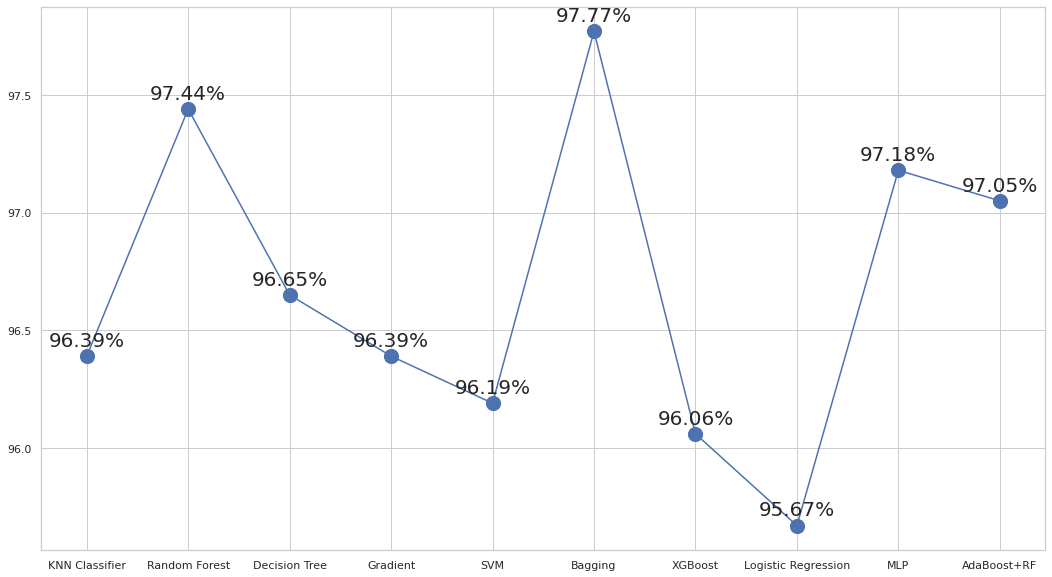

In [77]:
models1=['KNN Classifier','Random Forest','Decision Tree','Gradient','SVM', "Bagging",'XGBoost','Logistic Regression','MLP',"AdaBoost+RF"]
accuracies1=[96.39, 97.44, 96.65, 96.39, 96.19, 97.77, 96.06, 95.67, 97.18, 97.05]
plt.figure(figsize=(18,10))
plt.scatter(x=models1, y=accuracies1,s=200)
plt.plot(models1,accuracies1)
for x,y in zip(models1,accuracies1):
    label = "{:.2f}%".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center',fontsize=20)

# Handling String Columns

In [78]:
df_string=jobdata.copy()
df_string[df_string.columns].isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [79]:
df_string.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [80]:
df_string.isna().sum().sum()

70103

In [81]:
df_string['location']=df_string['location'].replace(np.nan, '', regex=True)
df_string['department']=df_string['department'].replace(np.nan, '', regex=True)
df_string['salary_range']=df_string['salary_range'].replace(np.nan, '', regex=True)
df_string['company_profile']=df_string['company_profile'].replace(np.nan, '', regex=True)
df_string['description']=df_string['description'].replace(np.nan, '', regex=True)
df_string['requirements']=df_string['requirements'].replace(np.nan, '', regex=True)
df_string['benefits']=df_string['benefits'].replace(np.nan, '', regex=True)

In [82]:
df_string['text'] = df_string[['title', 'department','company_profile','description','requirements','benefits']].apply(lambda x: ' '.join(x), axis = 1)

In [83]:
df_string.head()

job_id  ...                                               text
0       1  ...  Marketing Intern Marketing We're Food52, and w...
1       2  ...  Customer Service - Cloud Video Production Succ...
2       3  ...  Commissioning Machinery Assistant (CMA)  Valor...
3       4  ...  Account Executive - Washington DC Sales Our pa...
4       5  ...  Bill Review Manager  SpotSource Solutions LLC ...

[5 rows x 19 columns]

In [84]:
df_string.drop(['job_id', 'location','title','salary_range' ,'department','salary_range','company_profile','description','requirements','benefits'], axis=1, inplace=True)

In [85]:
df_string.columns
df_string_columns = df_string.columns.tolist()
print(df_string_columns)

['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent', 'text']


In [86]:
df_string_columns = df_string_columns[-1:] + df_string_columns[:-1]
df_string = df_string[df_string_columns]
df_string.head()

text  ...  fraudulent
0  Marketing Intern Marketing We're Food52, and w...  ...           0
1  Customer Service - Cloud Video Production Succ...  ...           0
2  Commissioning Machinery Assistant (CMA)  Valor...  ...           0
3  Account Executive - Washington DC Sales Our pa...  ...           0
4  Bill Review Manager  SpotSource Solutions LLC ...  ...           0

[5 rows x 10 columns]

In [87]:
def clean_text(text, ):
        if text is not None:
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
                text = re.sub(r'[0-9]+','',text)
                text =  text.lower()
                text = re.sub('re:', '', text)
                text = re.sub('-', '', text)
                text = re.sub('_', '', text)
                text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
                text = re.sub(r'\S*@\S*\s?', '', text, flags=re.MULTILINE)
        # Remove text between square brackets
                text =re.sub('\[[^]]*\]', '', text)
        # removes punctuation
                text = re.sub(r'[^\w\s]','',text)
                text = re.sub(r'\n',' ',text)
                text = re.sub(r'[0-9]+','',text)
                #text = re.sub(r'[0-9]+','',text)
        # strip html 
                p = re.compile(r'<.*?>')
                text = re.sub(r"\'ve", " have ", text)
                text = re.sub(r"can't", "cannot ", text)
                text = re.sub(r"n't", " not ", text)
                text = re.sub(r"I'm", "I am", text)
                text = re.sub(r" m ", " am ", text)
                text = re.sub(r"\'re", " are ", text)
                text = re.sub(r"\'d", " would ", text)
                text = re.sub(r"\'ll", " will ", text)
        
                text = p.sub('', text)

        def tokenize_text(text,tokenizer=default_tokenizer):
            token = default_tokenizer.tokenize(text)
            return token
        
        def remove_stopwords(text, stop_words=default_stopwords):
            tokens = [w for w in tokenize_text(text) if w not in stop_words]
            return ' '.join(tokens)

        def stem_text(text, stemmer=default_stemmer):
            tokens = tokenize_text(text)
            return ' '.join([stemmer.stem(t) for t in tokens])

        text = stem_text(text) # stemming
        text = remove_stopwords(text) # remove stopwords
        #text.strip(' ') # strip whitespaces again?

        return text

In [88]:
df_string['text'] = df_string['text'].apply(clean_text)

In [89]:
df_string['text'].head()

0    market intern market food weve creat groundbre...
1    custom servic cloud video product success seco...
2    commiss machineri assist cma valor servic prov...
3    account execut washington dc sale passion impr...
4    bill review manag spotsourc solut llc global h...
Name: text, dtype: object

In [90]:
cv = TfidfVectorizer(max_features = 100)
x = cv.fit_transform(df_string['text'])
dftext = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())

In [91]:
fraudjobs_text = df_string[df_string.fraudulent == 1].text
realjobs_text = df_string[df_string.fraudulent == 0].text

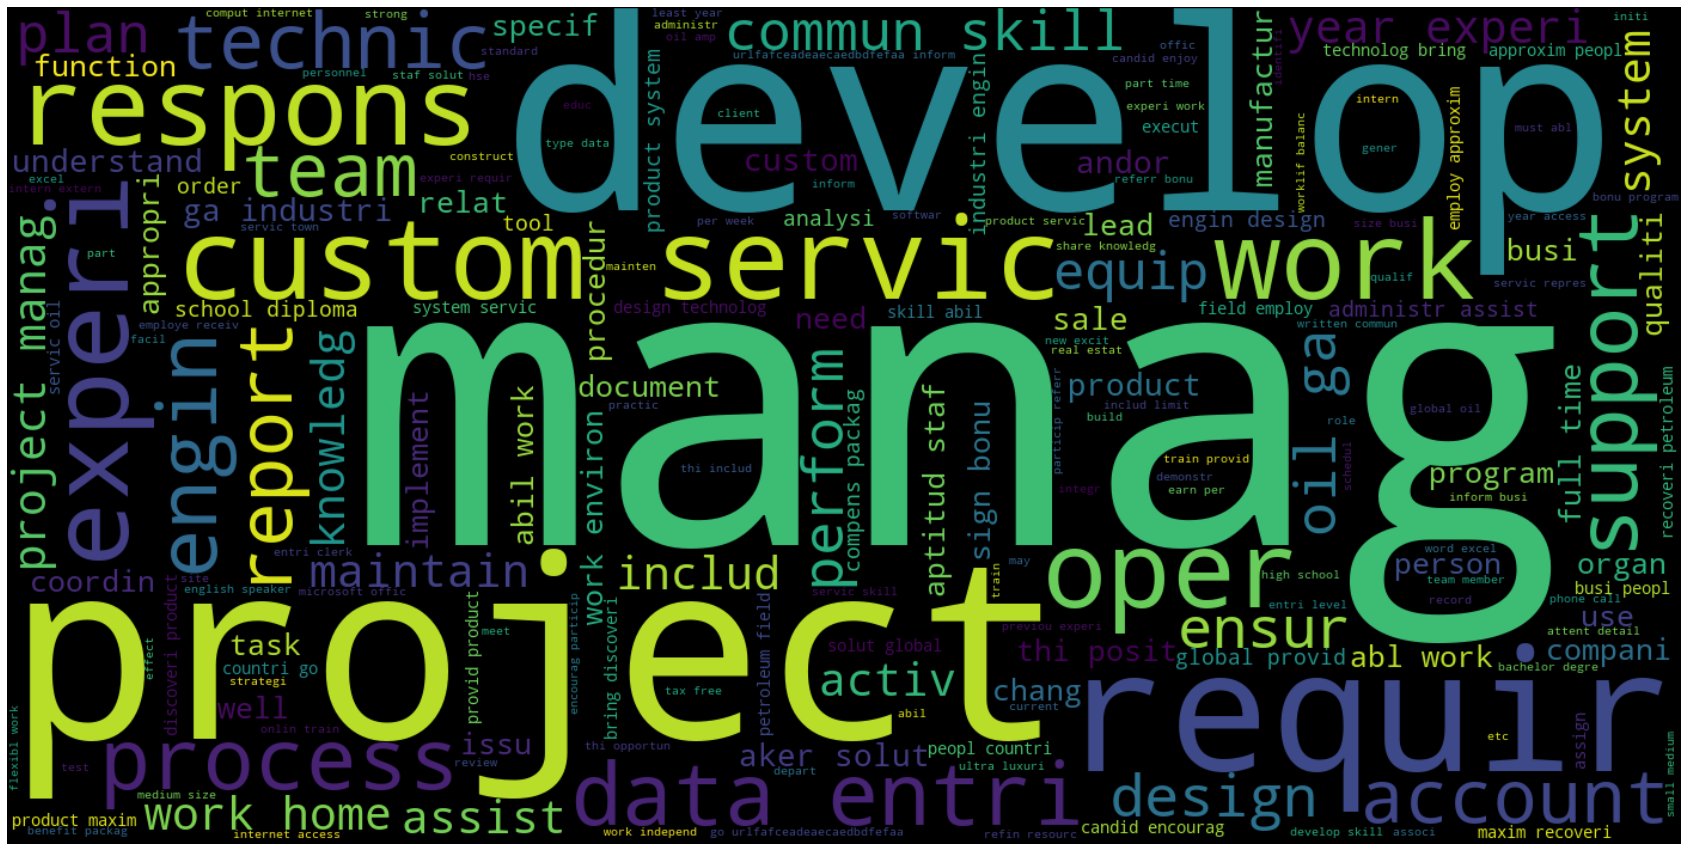

In [92]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(fraudjobs_text)
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


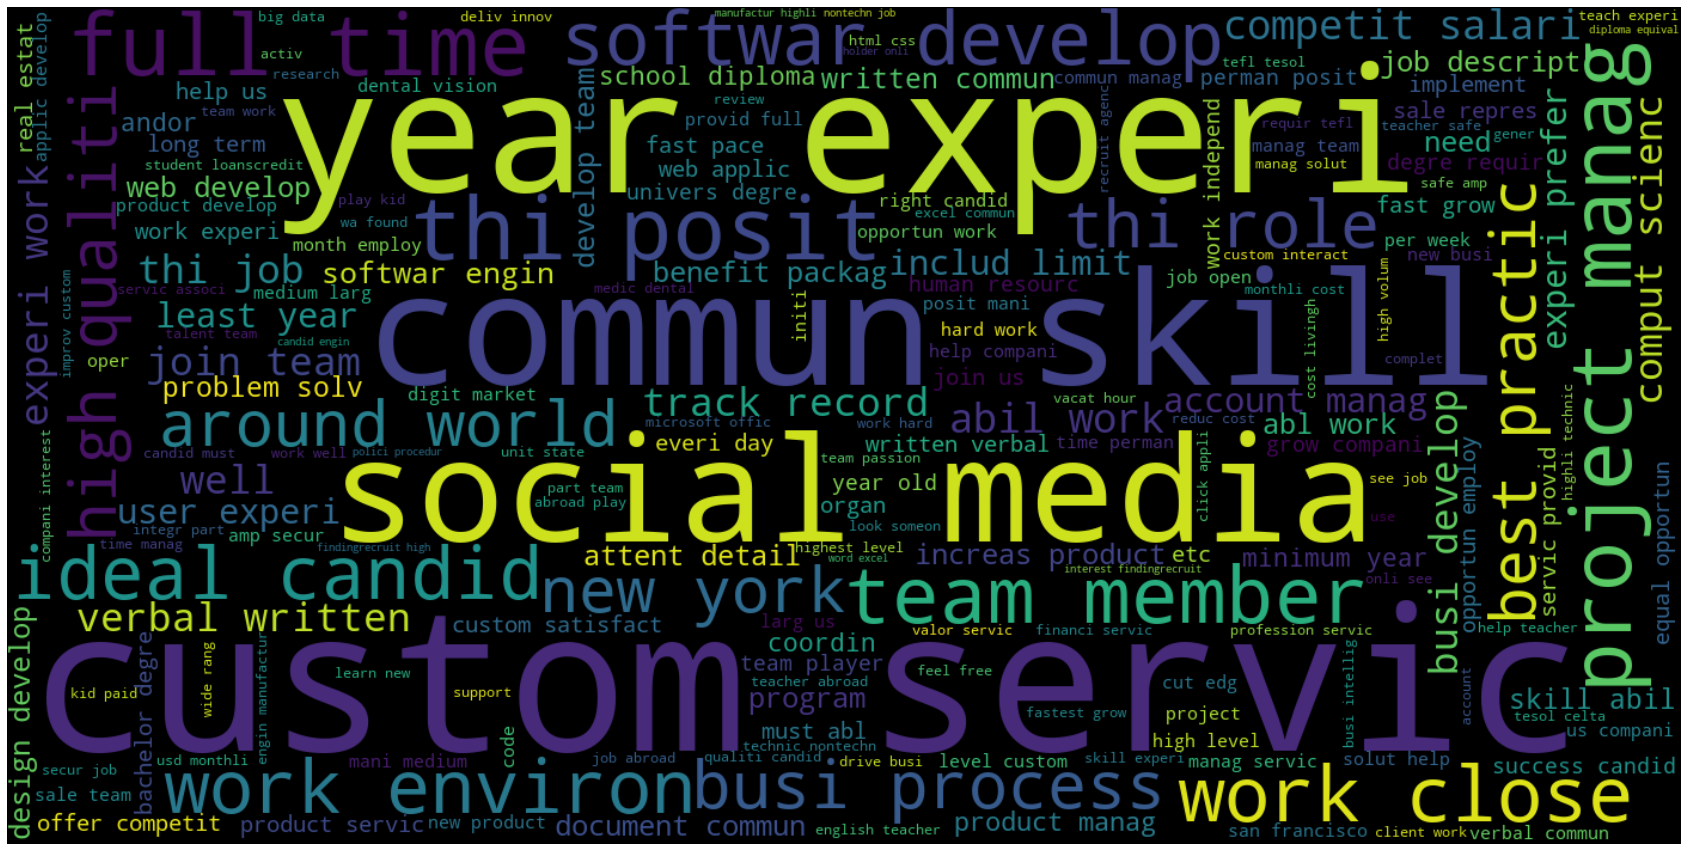

In [93]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(realjobs_text)
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(30,18))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [94]:
df_string.drop(["text"], axis=1, inplace=True)

In [95]:
df_string= pd.concat([dftext, df_string], axis=1)

In [96]:
df_string.head()

abil   account  ...              function  fraudulent
0  0.000000  0.000000  ...             Marketing           0
1  0.000000  0.041469  ...      Customer Service           0
2  0.000000  0.000000  ...                   NaN           0
3  0.039152  0.566401  ...                 Sales           0
4  0.000000  0.109922  ...  Health Care Provider           0

[5 rows x 109 columns]

# Handling Complex attributes

In [97]:
#splitting salary
salary_range = jobdata.salary_range.copy()

In [98]:
salary_range.unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [99]:
salary_range.fillna('111110-111111', inplace=True)
salary_range_sep = list(salary_range.str.split('-').values)
salary_range_sep[5538] = ['40000', '40000']
error_range_inds = []
for range_ind, s_range in enumerate(salary_range_sep):
    min_value, max_value = s_range
    if not min_value.isdigit() or not max_value.isdigit():
        error_range_inds += [range_ind]
for range_ind in error_range_inds:
    salary_range_sep[range_ind] = ['0', '0']
data_salary_range = pd.DataFrame(np.array(salary_range_sep, dtype='int64'), 
                                 columns=['min_salary', 'max_salary'])

num_features = ['min_salary', 'max_salary']
df_salary = pd.concat([df_string, data_salary_range], axis=1)

In [100]:
df_salary.replace(111110,np.nan, inplace=True)
print(df_salary['min_salary'].isna().sum())
df_salary.replace(111111,np.nan, inplace=True)
print(df_salary['max_salary'].isna().sum())

15012
15012


In [101]:
df_salary.head()

abil   account      also  ...  fraudulent  min_salary  max_salary
0  0.000000  0.000000  0.116434  ...           0         NaN         NaN
1  0.000000  0.041469  0.033522  ...           0         NaN         NaN
2  0.000000  0.000000  0.000000  ...           0         NaN         NaN
3  0.039152  0.566401  0.000000  ...           0         NaN         NaN
4  0.000000  0.109922  0.000000  ...           0         NaN         NaN

[5 rows x 111 columns]

In [102]:
#Splitting locations
location = jobdata['location'].copy()

In [103]:
location.unique()

array(['US, NY, New York', 'NZ, , Auckland', 'US, IA, Wever', ...,
       'US, CA, los Angeles', 'CA, , Ottawa', 'GB, WSX, Chichester'],
      dtype=object)

In [104]:
#splitting location
location_splitted = list(location.str.split(', ').values)
for loc_ind, loc in enumerate(location_splitted):
    if loc is np.nan:
        location_splitted[loc_ind] = ['Unspecified'] * 3
    else:
        for el_ind, el in enumerate(loc):
            if el == '':
                loc[el_ind] = 'Unspecified'
                
location_splitted = list(map(lambda loc: list(loc), location_splitted))
for loc_ind, loc in enumerate(location_splitted):
    if len(loc) > 3:
        location_splitted[loc_ind] = loc[:2] + [', '.join(loc[2:])]
    if len(loc) < 3:
        location_splitted[loc_ind] += ['Unspecified'] * 2
        
data_location = pd.DataFrame(location_splitted, columns=['country', 'state', 'city'])
cat_features += ['country', 'state', 'city']
df=pd.concat([df_salary, data_location], axis=1)
df.replace('Unspecified', np.nan, inplace=True)
df.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ    NaN    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [105]:
df

abil   account      also  ...  country  state          city
0      0.000000  0.000000  0.116434  ...       US     NY      New York
1      0.000000  0.041469  0.033522  ...       NZ    NaN      Auckland
2      0.000000  0.000000  0.000000  ...       US     IA         Wever
3      0.039152  0.566401  0.000000  ...       US     DC    Washington
4      0.000000  0.109922  0.000000  ...       US     FL    Fort Worth
...         ...       ...       ...  ...      ...    ...           ...
17875  0.038962  0.153725  0.082843  ...       CA     ON       Toronto
17876  0.090792  0.776149  0.048262  ...       US     PA  Philadelphia
17877  0.000000  0.174196  0.000000  ...       US     TX       Houston
17878  0.000000  0.000000  0.000000  ...       NG     LA         Lagos
17879  0.000000  0.000000  0.093702  ...       NZ      N    Wellington

[17880 rows x 114 columns]

In [106]:
df.isna().sum()

abil              0
account           0
also              0
amp               0
applic            0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

# Categorical NaN values filled with empty string and numerical with 0

In [107]:
df1=df.copy()
df1['employment_type'].fillna("", inplace=True)
df1['required_experience'].fillna("", inplace=True)
df1['required_education'].fillna("", inplace=True)
df1['industry'].fillna("", inplace=True)
df1['function'].fillna("", inplace=True)
df1['min_salary'].fillna(0, inplace=True)
df1['max_salary'].fillna(0, inplace=True)
df1['country'].fillna("", inplace=True)
df1['state'].fillna("", inplace=True)
df1['city'].fillna("", inplace=True)
df1.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ           Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [108]:
df1.isna().sum()

abil          0
account       0
also          0
amp           0
applic        0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [109]:
df1.isna().sum().sum()

0

## Label Encoding

In [110]:
df1['fraudulent']=df1['fraudulent'].astype('category')
print(df1.dtypes)

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object


In [111]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df1['employment_type'] = lb_make.fit_transform(df1['employment_type'])
df1['required_experience'] = lb_make.fit_transform(df1['required_experience'])
df1['required_education'] = lb_make.fit_transform(df1['required_education'])
df1['industry'] = lb_make.fit_transform(df1['industry'])
df1['function'] = lb_make.fit_transform(df1['function'])
df1['country']=lb_make.fit_transform(df1['country'])
df1['state']=lb_make.fit_transform(df1['state'])
df1['city']=lb_make.fit_transform(df1['city'])
df1.head() #Results in appending a new column to df

abil   account      also       amp  ...  max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...         0.0       86    228  1458
1  0.000000  0.041469  0.033522  0.059203  ...         0.0       61      0   189
2  0.000000  0.000000  0.000000  0.092825  ...         0.0       86    156  2213
3  0.039152  0.566401  0.000000  0.000000  ...         0.0       86    105  2164
4  0.000000  0.109922  0.000000  0.000000  ...         0.0       86    131   787

[5 rows x 114 columns]

In [112]:
df1.dtypes

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country         int64
state           int64
city            int64
Length: 114, dtype: object

In [113]:
X_ = df1.drop(['fraudulent'], axis=1)
X_col = X_.columns
y_ = df1['fraudulent']

In [114]:
df1

abil   account      also       amp  ...  max_salary  country  state  city
0      0.000000  0.000000  0.116434  0.102818  ...         0.0       86    228  1458
1      0.000000  0.041469  0.033522  0.059203  ...         0.0       61      0   189
2      0.000000  0.000000  0.000000  0.092825  ...         0.0       86    156  2213
3      0.039152  0.566401  0.000000  0.000000  ...         0.0       86    105  2164
4      0.000000  0.109922  0.000000  0.000000  ...         0.0       86    131   787
...         ...       ...       ...       ...  ...         ...      ...    ...   ...
17875  0.038962  0.153725  0.082843  0.146310  ...         0.0       13    235  2082
17876  0.090792  0.776149  0.048262  0.127853  ...         0.0       86    239  1630
17877  0.000000  0.174196  0.000000  0.000000  ...         0.0       86    289   976
17878  0.000000  0.000000  0.000000  0.205171  ...         0.0       57    176  1115
17879  0.000000  0.000000  0.093702  0.000000  ...         0.0       61    205  2182

[17880 rows x 114 columns]

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_, y_,
                                                    train_size=0.8,
                                                    random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,
                                                    train_size=0.8,
                                                    random_state=42)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(11443, 113)
(3576, 113)
(2861, 113)


## Models

### KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn.fit(X_train, y_train)
print_score(knn, X_train, X_validation, y_train, y_validation, train=True)
print_score(knn, X_train, X_validation, y_train, y_validation, train=False)


Train Result:

accuracy score: 0.9663

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     10910
           1       0.80      0.37      0.50       533

    accuracy                           0.97     11443
   macro avg       0.88      0.68      0.74     11443
weighted avg       0.96      0.97      0.96     11443


Confusion Matrix: 
 [[10861    49]
 [  337   196]]

ROC AUC: 0.6816

Average Accuracy: 	 0.9584
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9609

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.74      0.41      0.53       152

    accuracy                           0.96      2861
   macro avg       0.85      0.70      0.75      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2687   22]
 [  90   62]]

ROC AUC: 0.6999



In [118]:
print_score(knn, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9550

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      3395
           1       0.63      0.27      0.37       181

    accuracy                           0.95      3576
   macro avg       0.80      0.63      0.68      3576
weighted avg       0.95      0.95      0.95      3576


Confusion Matrix: 
 [[3367   28]
 [ 133   48]]

ROC AUC: 0.6285



### Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
print_score(rf, X_train, X_validation, y_train, y_validation, train=True)
print_score(rf, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9702
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  80   72]]

ROC AUC: 0.7368



In [120]:
print_score(rf, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9690

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.39      0.56       181

    accuracy                           0.97      3576
   macro avg       0.98      0.69      0.77      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 111   70]]

ROC AUC: 0.6934



### Descion Tree

In [121]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree.fit(X_train, y_train)
print_score(Tree, X_train, X_validation, y_train, y_validation, train=True)
print_score(Tree, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9865

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10910
           1       0.95      0.75      0.84       533

    accuracy                           0.99     11443
   macro avg       0.97      0.87      0.92     11443
weighted avg       0.99      0.99      0.99     11443


Confusion Matrix: 
 [[10889    21]
 [  134   399]]

ROC AUC: 0.8733

Average Accuracy: 	 0.9579
Accuracy SD: 		 0.0059

Test Result:

accuracy score: 0.9581

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2709
           1       0.63      0.51      0.57       152

    accuracy                           0.96      2861
   macro avg       0.80      0.75      0.77      2861
weighted avg       0.95      0.96      0.96      2861


Confusion Matrix: 
 [[2663   46]
 [  74   78]]

ROC AUC: 0.7481



In [122]:
print_score(Tree, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9567

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3395
           1       0.59      0.45      0.51       181

    accuracy                           0.96      3576
   macro avg       0.78      0.72      0.75      3576
weighted avg       0.95      0.96      0.95      3576


Confusion Matrix: 
 [[3339   56]
 [  99   82]]

ROC AUC: 0.7183



### Gradient Boosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
print_score(gb, X_train, X_validation, y_train, y_validation, train=True)
print_score(gb, X_train, X_validation, y_train, y_validation, train=False)


Train Result:

accuracy score: 0.9733

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     10910
           1       0.99      0.43      0.60       533

    accuracy                           0.97     11443
   macro avg       0.98      0.72      0.79     11443
weighted avg       0.97      0.97      0.97     11443


Confusion Matrix: 
 [[10907     3]
 [  302   231]]

ROC AUC: 0.7166

Average Accuracy: 	 0.9641
Accuracy SD: 		 0.0035

Test Result:

accuracy score: 0.9640

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.89      0.37      0.52       152

    accuracy                           0.96      2861
   macro avg       0.93      0.68      0.75      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2702    7]
 [  96   56]]

ROC AUC: 0.6829



In [124]:
print_score(gb, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9656

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.93      0.35      0.51       181

    accuracy                           0.97      3576
   macro avg       0.95      0.67      0.74      3576
weighted avg       0.96      0.97      0.96      3576


Confusion Matrix: 
 [[3390    5]
 [ 118   63]]

ROC AUC: 0.6733



### XGB

In [125]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
print_score(xgb, X_train, X_validation, y_train, y_validation, train=True)
print_score(xgb, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9736

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     10910
           1       0.98      0.44      0.61       533

    accuracy                           0.97     11443
   macro avg       0.98      0.72      0.80     11443
weighted avg       0.97      0.97      0.97     11443


Confusion Matrix: 
 [[10905     5]
 [  297   236]]

ROC AUC: 0.7212

Average Accuracy: 	 0.9652
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9678

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.97      0.41      0.57       152

    accuracy                           0.97      2861
   macro avg       0.97      0.70      0.78      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2707    2]
 [  90   62]]

ROC AUC: 0.7036



In [126]:
print_score(xgb, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9653

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.90      0.35      0.51       181

    accuracy                           0.97      3576
   macro avg       0.93      0.68      0.74      3576
weighted avg       0.96      0.97      0.96      3576


Confusion Matrix: 
 [[3388    7]
 [ 117   64]]

ROC AUC: 0.6758



### SVM

In [127]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train)
print_score(SVM, X_train, X_validation, y_train, y_validation, train=True)
print_score(SVM, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9534
Accuracy SD: 		 0.0004

Test Result:

accuracy score: 0.9469

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2709    0]
 [ 152    0]]

ROC AUC: 0.5000



In [128]:
print_score(SVM, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9494

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576


Confusion Matrix: 
 [[3395    0]
 [ 181    0]]

ROC AUC: 0.5000



### Bagging

In [129]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=Tree, n_estimators=1000,
                            bootstrap=True, oob_score=True,
                            n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
print_score(bag_clf, X_train, X_validation, y_train, y_validation, train=True)
print_score(bag_clf, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9913

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     10910
           1       1.00      0.81      0.90       533

    accuracy                           0.99     11443
   macro avg       1.00      0.91      0.95     11443
weighted avg       0.99      0.99      0.99     11443


Confusion Matrix: 
 [[10910     0]
 [   99   434]]

ROC AUC: 0.9071

Average Accuracy: 	 0.9708
Accuracy SD: 		 0.0028

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.97      0.49      0.65       152

    accuracy                           0.97      2861
   macro avg       0.97      0.74      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2707    2]
 [  78   74]]

ROC AUC: 0.7431



In [130]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9709

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.94      0.45      0.61       181

    accuracy                           0.97      3576
   macro avg       0.96      0.73      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3390    5]
 [  99   82]]

ROC AUC: 0.7258



### Logistic Regression

In [131]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)
print_score(model, X_train, X_validation, y_train, y_validation, train=True)
print_score(model, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9532
Accuracy SD: 		 0.0006

Test Result:

accuracy score: 0.9465

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2708    1]
 [ 152    0]]

ROC AUC: 0.4998



In [132]:
print_score(model, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9494

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576


Confusion Matrix: 
 [[3395    0]
 [ 181    0]]

ROC AUC: 0.5000



### MLP 

In [133]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=1, max_iter=300)
MLP.fit(X_train, y_train)
print_score(MLP, X_train, X_validation, y_train, y_validation, train=True)
print_score(MLP, X_train, X_validation, y_train, y_validation, train=False)

Train Result:

accuracy score: 0.9301

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     10910
           1       0.22      0.20      0.21       533

    accuracy                           0.93     11443
   macro avg       0.59      0.58      0.59     11443
weighted avg       0.93      0.93      0.93     11443


Confusion Matrix: 
 [[10537   373]
 [  427   106]]

ROC AUC: 0.5823

Average Accuracy: 	 0.9234
Accuracy SD: 		 0.0503

Test Result:

accuracy score: 0.9256

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2709
           1       0.26      0.21      0.23       152

    accuracy                           0.93      2861
   macro avg       0.61      0.59      0.60      2861
weighted avg       0.92      0.93      0.92      2861


Confusion Matrix: 
 [[2616   93]
 [ 120   32]]

ROC AUC: 0.5881



In [256]:
print_score(MLP, X_train, X_test, y_train, y_test, train=False)


Test Result:

accuracy score: 0.9267

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3395
           1       0.26      0.24      0.25       181

    accuracy                           0.93      3576
   macro avg       0.61      0.60      0.60      3576
weighted avg       0.92      0.93      0.93      3576


Confusion Matrix: 
 [[3271  124]
 [ 138   43]]

ROC AUC: 0.6005



### Ada Boost

In [257]:
from sklearn.ensemble import AdaBoostClassifier
ARf_clf = AdaBoostClassifier(base_estimator=rf, random_state=42)
ARf_clf.fit(X_train, y_train)
print_score(ARf_clf, X_train, X_test, y_train, y_test, train=True)
print_score(ARf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9696
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9706

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.42      0.59       181

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 105   76]]

ROC AUC: 0.7099



In [258]:
print_score(ARf_clf, X_train, X_test, y_train, y_test, train=False)



Test Result:

accuracy score: 0.9706

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.42      0.59       181

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 105   76]]

ROC AUC: 0.7099



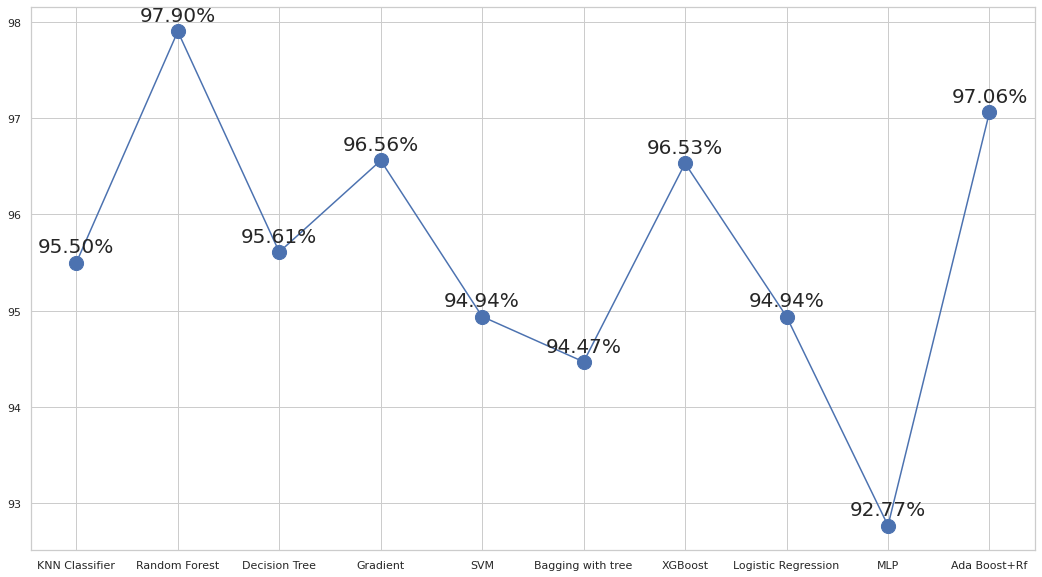

In [259]:
models=['KNN Classifier','Random Forest','Decision Tree','Gradient','SVM', 'Bagging with tree', 'XGBoost','Logistic Regression','MLP', 'Ada Boost+Rf']
accuracies=[95.50, 97.90, 95.61, 96.56, 94.94, 94.47, 96.53, 94.94, 92.77, 97.06]
plt.figure(figsize=(18,10))
plt.scatter(x=models, y=accuracies,s=200)
plt.plot(models,accuracies)
for x,y in zip(models,accuracies):
    label = "{:.2f}%".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center',fontsize=20)

## Standard Scalar

In [138]:
from sklearn.preprocessing import StandardScaler
X_scalar = StandardScaler().fit_transform(X_.values)
df_scalar = pd.DataFrame(X_scalar, columns=X_col)
df_scalar.head()

abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ...  0.757846  0.821354  0.603234
1 -0.553052  0.050792  0.018699  ... -0.091919 -1.600211 -1.155621
2 -0.553052 -0.342603 -0.549431  ...  0.757846  0.056649  1.649677
3 -0.000614  5.030532 -0.549431  ...  0.757846 -0.485017  1.581762
4 -0.553052  0.700166 -0.549431  ...  0.757846 -0.208874 -0.326783

[5 rows x 113 columns]

In [260]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_scalar, y_,
                                                    train_size=0.8,
                                                    random_state=42)
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X_train1, y_train1,
                                                    train_size=0.8,
                                                    random_state=42)

In [261]:
from sklearn.ensemble import AdaBoostClassifier
ARf_clf1 = AdaBoostClassifier(base_estimator=rf, random_state=42)
ARf_clf1.fit(X_train1, y_train1)
print_score(ARf_clf, X_train1, X_test1, y_train1, y_test1, train=True)
print_score(ARf_clf, X_train1, X_test1, y_train1, y_test1, train=False)

Train Result:

accuracy score: 0.8916

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.90      0.94     10910
           1       0.25      0.67      0.37       533

    accuracy                           0.89     11443
   macro avg       0.62      0.79      0.65     11443
weighted avg       0.95      0.89      0.91     11443


Confusion Matrix: 
 [[9845 1065]
 [ 175  358]]

ROC AUC: 0.7870

Average Accuracy: 	 0.9698
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.8761

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      3395
           1       0.23      0.63      0.34       181

    accuracy                           0.88      3576
   macro avg       0.61      0.76      0.64      3576
weighted avg       0.94      0.88      0.90      3576


Confusion Matrix: 
 [[3019  376]
 [  67  114]]

ROC AUC: 0.7595



In [141]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)
print_score(rf1, X_train1, X_validation1, y_train1, y_validation1, train=True)
print_score(rf1, X_train1, X_validation1, y_train1, y_validation1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9703
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  80   72]]

ROC AUC: 0.7368



In [262]:
print_score(rf1, X_train1, X_test, y_train1, y_test, train=False)


Test Result:

accuracy score: 0.9494

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576


Confusion Matrix: 
 [[3395    0]
 [ 181    0]]

ROC AUC: 0.5000



## Min Max Scalar

In [263]:
from sklearn.preprocessing import MinMaxScaler
X_mimmax = MinMaxScaler().fit_transform(X_.values)
df_minmax = pd.DataFrame(X_mimmax, columns=X_col)
df_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.955556  0.703704  0.610809
1  0.000000  0.043620  0.056792  ...  0.677778  0.000000  0.079179
2  0.000000  0.000000  0.000000  ...  0.955556  0.481481  0.927105
3  0.044569  0.595785  0.000000  ...  0.955556  0.324074  0.906577
4  0.000000  0.115624  0.000000  ...  0.955556  0.404321  0.329703

[5 rows x 113 columns]

In [264]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_minmax, y_)
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(X_train2, y_train2,
                                                    train_size=0.8, random_state=42)

In [265]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)
print_score(rf2, X_train2, X_validation2, y_train2, y_validation2, train=True)
print_score(rf2, X_train2, X_validation2, y_train2, y_validation2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10223
           1       1.00      1.00      1.00       505

    accuracy                           1.00     10728
   macro avg       1.00      1.00      1.00     10728
weighted avg       1.00      1.00      1.00     10728


Confusion Matrix: 
 [[10223     0]
 [    0   505]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9718
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.9672

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2544
           1       1.00      0.36      0.53       138

    accuracy                           0.97      2682
   macro avg       0.98      0.68      0.76      2682
weighted avg       0.97      0.97      0.96      2682


Confusion Matrix: 
 [[2544    0]
 [  88   50]]

ROC AUC: 0.6812



In [266]:
print_score(rf2, X_train2, X_test2, y_train2, y_test2, train=False)


Test Result:

accuracy score: 0.9689

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4247
           1       1.00      0.38      0.55       223

    accuracy                           0.97      4470
   macro avg       0.98      0.69      0.77      4470
weighted avg       0.97      0.97      0.96      4470


Confusion Matrix: 
 [[4247    0]
 [ 139   84]]

ROC AUC: 0.6883



## Binarize Data (Make Binary)  value>0 => 1 ,  value<0 => 0    


In [267]:
from sklearn.preprocessing import Binarizer
X_binary = Binarizer(threshold=0.0).fit_transform(X_.values)
df_binary = pd.DataFrame(X_binary, columns=X_col)
df_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         0.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         0.0      1.0    0.0   1.0
2   0.0      0.0   0.0  1.0  ...         0.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         0.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         0.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [268]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_binary, y_,
                                                    train_size=0.8, random_state=42)
X_train3, X_validation3, y_train3, y_validation3 = train_test_split(X_train3, y_train3,
                                                    train_size=0.8, random_state=42)

In [269]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train3, y_train3)
print_score(rf3, X_train3, X_validation3, y_train3, y_validation3, train=True)
print_score(rf3, X_train3, X_validation3, y_train3, y_validation3, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9716
Accuracy SD: 		 0.0023

Test Result:

accuracy score: 0.9731

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.50      0.66       152

    accuracy                           0.97      2861
   macro avg       0.98      0.75      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  76   76]]

ROC AUC: 0.7498



In [270]:
print_score(rf3, X_train3, X_test3, y_train3, y_test3, train=False)


Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       1.00      0.45      0.62       181

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3395    0]
 [ 100   81]]

ROC AUC: 0.7238



## OverSampling using Smote

In [271]:
#upsampling
from imblearn.over_sampling import SMOTE
smk  = SMOTETomek(random_state=42)
X_res,Y_res= smk.fit_resample(df_minmax, y_)

In [272]:
print(X_res.shape)
print(Y_res.shape)
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, Y_res)
X_train_res, X_validation_res, y_train_res, y_validation_res = train_test_split(X_train_res, y_train_res,
                                                    train_size=0.8, random_state=42)

(34028, 113)
(34028,)


In [273]:
print(X_train_res.shape)
print(X_test_res.shape)
print(X_validation_res.shape)

(20416, 113)
(8507, 113)
(5105, 113)


In [274]:
from sklearn.ensemble import RandomForestClassifier
rf_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_res.fit(X_train_res, y_train_res)
print_score(rf_res, X_train_res, X_validation_res, y_train_res, y_validation_res, train=True)
print_score(rf_res, X_train_res, X_validation_res, y_train_res, y_validation_res, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10257
           1       1.00      1.00      1.00     10159

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10257     0]
 [    0 10159]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9949
Accuracy SD: 		 0.0017

Test Result:

accuracy score: 0.9955

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2526
           1       0.99      1.00      1.00      2579

    accuracy                           1.00      5105
   macro avg       1.00      1.00      1.00      5105
weighted avg       1.00      1.00      1.00      5105


Confusion Matrix: 
 [[2513   13]
 [  10 2569]]

ROC AUC: 0.9955



In [275]:
print_score(rf_res, X_train_res, X_test_res, y_train_res, y_test_res, train=False)


Test Result:

accuracy score: 0.9948

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4231
           1       1.00      0.99      0.99      4276

    accuracy                           0.99      8507
   macro avg       0.99      0.99      0.99      8507
weighted avg       0.99      0.99      0.99      8507


Confusion Matrix: 
 [[4211   20]
 [  24 4252]]

ROC AUC: 0.9948



## Adaptive Synthetic Sampling (ADASYN)

In [276]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_res1,Y_res1= adasyn.fit_resample(df_minmax, y_)
print(X_res1.shape)
print(Y_res1.shape)
from sklearn.model_selection import train_test_split
X_train_res1, X_test_res1, y_train_res1, y_test_res1 = train_test_split(X_res1, Y_res1)
X_train_res1, X_validation_res1, y_train_res1, y_validation_res1 = train_test_split(X_train_res1, y_train_res1,
                                                    train_size=0.8, random_state=42)


(34042, 113)
(34042,)


In [277]:
print(X_train_res1.shape)
print(X_test_res1.shape)
print(X_validation_res1.shape)

(20424, 113)
(8511, 113)
(5107, 113)


In [278]:
from sklearn.ensemble import RandomForestClassifier
rf_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_res1.fit(X_train_res1, y_train_res1)
print_score(rf_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=True)
print_score(rf_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10177
           1       1.00      1.00      1.00     10247

    accuracy                           1.00     20424
   macro avg       1.00      1.00      1.00     20424
weighted avg       1.00      1.00      1.00     20424


Confusion Matrix: 
 [[10177     0]
 [    0 10247]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9952
Accuracy SD: 		 0.0016

Test Result:

accuracy score: 0.9941

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2564
           1       0.99      1.00      0.99      2543

    accuracy                           0.99      5107
   macro avg       0.99      0.99      0.99      5107
weighted avg       0.99      0.99      0.99      5107


Confusion Matrix: 
 [[2544   20]
 [  10 2533]]

ROC AUC: 0.9941



In [279]:
print_score(rf_res1, X_train_res1, X_test_res1, y_train_res1, y_test_res1, train=False)



Test Result:

accuracy score: 0.9944

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4273
           1       0.99      1.00      0.99      4238

    accuracy                           0.99      8511
   macro avg       0.99      0.99      0.99      8511
weighted avg       0.99      0.99      0.99      8511


Confusion Matrix: 
 [[4241   32]
 [  16 4222]]

ROC AUC: 0.9944



In [280]:
from sklearn.neighbors import KNeighborsClassifier
knn_res1 = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_res1.fit(X_train_res1, y_train_res1)
print_score(knn_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=True)
print_score(knn_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=False)


Train Result:

accuracy score: 0.9406

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     10177
           1       0.89      1.00      0.94     10247

    accuracy                           0.94     20424
   macro avg       0.95      0.94      0.94     20424
weighted avg       0.95      0.94      0.94     20424


Confusion Matrix: 
 [[ 8964  1213]
 [    0 10247]]

ROC AUC: 0.9404

Average Accuracy: 	 0.9186
Accuracy SD: 		 0.0063

Test Result:

accuracy score: 0.9285

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92      2564
           1       0.87      1.00      0.93      2543

    accuracy                           0.93      5107
   macro avg       0.94      0.93      0.93      5107
weighted avg       0.94      0.93      0.93      5107


Confusion Matrix: 
 [[2199  365]
 [   0 2543]]

ROC AUC: 0.9288



In [281]:
print_score(knn_res1, X_train_res1, X_test_res1, y_train_res1, y_test_res1, train=False)



Test Result:

accuracy score: 0.9203

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      4273
           1       0.86      1.00      0.93      4238

    accuracy                           0.92      8511
   macro avg       0.93      0.92      0.92      8511
weighted avg       0.93      0.92      0.92      8511


Confusion Matrix: 
 [[3595  678]
 [   0 4238]]

ROC AUC: 0.9207



In [282]:
from sklearn.tree import DecisionTreeClassifier
Tree_res1 = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_res1.fit(X_train_res1, y_train_res1)
print_score(Tree_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=True)
print_score(Tree_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=False)

Train Result:

accuracy score: 0.9755

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     10177
           1       0.97      0.98      0.98     10247

    accuracy                           0.98     20424
   macro avg       0.98      0.98      0.98     20424
weighted avg       0.98      0.98      0.98     20424


Confusion Matrix: 
 [[ 9836   341]
 [  159 10088]]

ROC AUC: 0.9755

Average Accuracy: 	 0.9484
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9458

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      2564
           1       0.93      0.97      0.95      2543

    accuracy                           0.95      5107
   macro avg       0.95      0.95      0.95      5107
weighted avg       0.95      0.95      0.95      5107


Confusion Matrix: 
 [[2374  190]
 [  87 2456]]

ROC AUC: 0.9458



In [283]:
print_score(Tree_res1, X_train_res1, X_test_res1, y_train_res1, y_test_res1, train=False)



Test Result:

accuracy score: 0.9463

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      4273
           1       0.93      0.97      0.95      4238

    accuracy                           0.95      8511
   macro avg       0.95      0.95      0.95      8511
weighted avg       0.95      0.95      0.95      8511


Confusion Matrix: 
 [[3960  313]
 [ 144 4094]]

ROC AUC: 0.9464



In [285]:
from sklearn.ensemble import GradientBoostingClassifier
gb_res1 = GradientBoostingClassifier(random_state=42)
gb_res1.fit(X_train_res1, y_train_res1)
print_score(gb_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=True)
print_score(gb_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=False)

Train Result:

accuracy score: 0.9624

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     10177
           1       0.95      0.98      0.96     10247

    accuracy                           0.96     20424
   macro avg       0.96      0.96      0.96     20424
weighted avg       0.96      0.96      0.96     20424


Confusion Matrix: 
 [[ 9608   569]
 [  198 10049]]

ROC AUC: 0.9624

Average Accuracy: 	 0.9530
Accuracy SD: 		 0.0043

Test Result:

accuracy score: 0.9557

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      2564
           1       0.94      0.97      0.96      2543

    accuracy                           0.96      5107
   macro avg       0.96      0.96      0.96      5107
weighted avg       0.96      0.96      0.96      5107


Confusion Matrix: 
 [[2403  161]
 [  65 2478]]

ROC AUC: 0.9558



In [288]:
print_score(gb_res1, X_train_res1, X_test_res1, y_train_res1, y_test_res1, train=False)



Test Result:

accuracy score: 0.9586

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      4273
           1       0.94      0.98      0.96      4238

    accuracy                           0.96      8511
   macro avg       0.96      0.96      0.96      8511
weighted avg       0.96      0.96      0.96      8511


Confusion Matrix: 
 [[4017  256]
 [  96 4142]]

ROC AUC: 0.9587



In [286]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_res1 = xgb.XGBClassifier(random_state=42)
xgb_res1.fit(X_train_res1, y_train_res1)
print_score(xgb_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=True)
print_score(xgb_res1, X_train_res1, X_validation_res1, y_train_res1, y_validation_res1, train=False)


Train Result:

accuracy score: 0.9587

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     10177
           1       0.94      0.98      0.96     10247

    accuracy                           0.96     20424
   macro avg       0.96      0.96      0.96     20424
weighted avg       0.96      0.96      0.96     20424


Confusion Matrix: 
 [[ 9567   610]
 [  233 10014]]

ROC AUC: 0.9587

Average Accuracy: 	 0.9545
Accuracy SD: 		 0.0040

Test Result:

accuracy score: 0.9524

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2564
           1       0.93      0.97      0.95      2543

    accuracy                           0.95      5107
   macro avg       0.95      0.95      0.95      5107
weighted avg       0.95      0.95      0.95      5107


Confusion Matrix: 
 [[2387  177]
 [  66 2477]]

ROC AUC: 0.9525



In [287]:
print_score(xgb_res1, X_train_res1, X_test_res1, y_train_res1, y_test_res1, train=False)



Test Result:

accuracy score: 0.9542

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      4273
           1       0.94      0.97      0.95      4238

    accuracy                           0.95      8511
   macro avg       0.95      0.95      0.95      8511
weighted avg       0.95      0.95      0.95      8511


Confusion Matrix: 
 [[3998  275]
 [ 115 4123]]

ROC AUC: 0.9543



99.02 random forest

# Drop all Na

In [341]:
dropNaN=df.copy()

In [342]:
dropNaN.isna().sum()

abil              0
account           0
also              0
amp               0
applic            0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [343]:
dropNaN=dropNaN.dropna()
dropNaN.reset_index(inplace = True, drop = True)
dropNaN.shape

(1422, 114)

In [344]:
dropNaN.isna().sum()

abil          0
account       0
also          0
amp           0
applic        0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [345]:
dropNaN.head()

abil   account      also  ...  country  state         city
0  0.000000  0.000000  0.000000  ...       DE     BE       Berlin
1  0.134997  0.266317  0.000000  ...       US     NJ  Jersey City
2  0.000000  0.037929  0.061320  ...       SG     01    Singapore
3  0.000000  0.000000  0.000000  ...       US     TX   Fort Worth
4  0.000000  0.000000  0.080157  ...       US     GA      Atlanta

[5 rows x 114 columns]

In [346]:
dropNaN.isna().sum().sum()

0

In [347]:
dropNaN.shape

(1422, 114)

In [348]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
dropNaN['employment_type'] = lb_make.fit_transform(dropNaN['employment_type'])
dropNaN['required_experience'] = lb_make.fit_transform(dropNaN['required_experience'])
dropNaN['required_education'] = lb_make.fit_transform(dropNaN['required_education'])
dropNaN['industry'] = lb_make.fit_transform(dropNaN['industry'])
dropNaN['function'] = lb_make.fit_transform(dropNaN['function'])
dropNaN['country'] = lb_make.fit_transform(dropNaN['country'])
dropNaN['state'] = lb_make.fit_transform(dropNaN['state'])
dropNaN['city'] = lb_make.fit_transform(dropNaN['city'])

dropNaN.head() #Results in appending a new column to df

abil   account      also       amp  ...  max_salary  country  state  city
0  0.000000  0.000000  0.000000  0.177813  ...     28000.0        5     22    58
1  0.134997  0.266317  0.000000  0.063368  ...    120000.0       39     89   190
2  0.000000  0.037929  0.061320  0.000000  ...    150000.0       34      1   352
3  0.000000  0.000000  0.000000  0.000000  ...     70000.0       39    122   145
4  0.000000  0.000000  0.080157  0.212350  ...       115.0       39     45    27

[5 rows x 114 columns]

In [349]:
print(dropNaN['min_salary'].value_counts())
print(dropNaN['max_salary'].value_counts())

30000.0      112
0.0           95
40000.0       86
50000.0       84
70000.0       58
            ... 
4001.0         1
1234.0         1
3000000.0      1
12500.0        1
16500.0        1
Name: min_salary, Length: 159, dtype: int64
0.0          81
50000.0      78
40000.0      66
80000.0      57
100000.0     57
             ..
280000.0      1
168000.0      1
2500000.0     1
16074.0       1
117000.0      1
Name: max_salary, Length: 191, dtype: int64


In [291]:
dropNaN['fraudulent']=dropNaN['fraudulent'].astype('category')
dropNaN.dtypes

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country         int64
state           int64
city            int64
Length: 114, dtype: object

In [350]:
X_dropnan = dropNaN.drop(['fraudulent'], axis=1)
X_col_dropnan = X_dropnan.columns
y_dropnan = dropNaN['fraudulent']

In [351]:
from sklearn.model_selection import train_test_split
X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan = train_test_split(X_dropnan, y_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan = train_test_split(X_train_dropnan, y_train_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)

In [352]:
print(X_train_dropnan.shape)
print(X_test_dropnan.shape)
print(X_validation_dropnan.shape)

(909, 113)
(285, 113)
(228, 113)


## Random Forest after removing all Nas

In [295]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan = RandomForestClassifier(n_estimators=100)
rf_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(rf_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(rf_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9527
Accuracy SD: 		 0.0149

Test Result:

accuracy score: 0.9123

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       201
           1       1.00      0.26      0.41        27

    accuracy                           0.91       228
   macro avg       0.95      0.63      0.68       228
weighted avg       0.92      0.91      0.89       228


Confusion Matrix: 
 [[201   0]
 [ 20   7]]

ROC AUC: 0.6296



In [296]:
print_score(rf_dropnan, X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan, train=False)


Test Result:

accuracy score: 0.9018

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       246
           1       1.00      0.28      0.44        39

    accuracy                           0.90       285
   macro avg       0.95      0.64      0.69       285
weighted avg       0.91      0.90      0.88       285


Confusion Matrix: 
 [[246   0]
 [ 28  11]]

ROC AUC: 0.6410



In [297]:
from sklearn.neighbors import KNeighborsClassifier
knn_dropnan = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(knn_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(knn_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)

Train Result:

accuracy score: 0.9483

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       847
           1       0.83      0.31      0.45        62

    accuracy                           0.95       909
   macro avg       0.89      0.65      0.71       909
weighted avg       0.94      0.95      0.94       909


Confusion Matrix: 
 [[843   4]
 [ 43  19]]

ROC AUC: 0.6509

Average Accuracy: 	 0.9274
Accuracy SD: 		 0.0158

Test Result:

accuracy score: 0.8947

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       201
           1       0.80      0.15      0.25        27

    accuracy                           0.89       228
   macro avg       0.85      0.57      0.60       228
weighted avg       0.89      0.89      0.86       228


Confusion Matrix: 
 [[200   1]
 [ 23   4]]

ROC AUC: 0.5716



In [298]:
print_score(knn_dropnan, X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan, train=False)


Test Result:

accuracy score: 0.8667

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       246
           1       0.60      0.08      0.14        39

    accuracy                           0.87       285
   macro avg       0.74      0.53      0.53       285
weighted avg       0.83      0.87      0.82       285


Confusion Matrix: 
 [[244   2]
 [ 36   3]]

ROC AUC: 0.5344



In [299]:
from sklearn.tree import DecisionTreeClassifier
Tree_dropnan = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(Tree_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(Tree_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9263
Accuracy SD: 		 0.0184

Test Result:

accuracy score: 0.9254

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       201
           1       0.75      0.56      0.64        27

    accuracy                           0.93       228
   macro avg       0.85      0.77      0.80       228
weighted avg       0.92      0.93      0.92       228


Confusion Matrix: 
 [[196   5]
 [ 12  15]]

ROC AUC: 0.7653



In [300]:
print_score(Tree_dropnan, X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan, train=False)


Test Result:

accuracy score: 0.9088

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       246
           1       0.72      0.54      0.62        39

    accuracy                           0.91       285
   macro avg       0.83      0.75      0.78       285
weighted avg       0.90      0.91      0.90       285


Confusion Matrix: 
 [[238   8]
 [ 18  21]]

ROC AUC: 0.7530



In [301]:
from sklearn.ensemble import GradientBoostingClassifier
gb_dropnan = GradientBoostingClassifier(random_state=42)
gb_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(gb_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(gb_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9516
Accuracy SD: 		 0.0142

Test Result:

accuracy score: 0.9386

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       201
           1       0.88      0.56      0.68        27

    accuracy                           0.94       228
   macro avg       0.91      0.77      0.82       228
weighted avg       0.94      0.94      0.93       228


Confusion Matrix: 
 [[199   2]
 [ 12  15]]

ROC AUC: 0.7728



In [353]:
print_score(gb_dropnan, X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan, train=False)


Test Result:

accuracy score: 0.9158

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       246
           1       0.89      0.44      0.59        39

    accuracy                           0.92       285
   macro avg       0.91      0.71      0.77       285
weighted avg       0.91      0.92      0.90       285


Confusion Matrix: 
 [[244   2]
 [ 22  17]]

ROC AUC: 0.7139



In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_dropnan = xgb.XGBClassifier(random_state=42)
xgb_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(xgb_data, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(xgb_data, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)

In [356]:
print_score(xgb_dropnan, X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan, train=False)


Test Result:

accuracy score: 0.9298

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       246
           1       1.00      0.49      0.66        39

    accuracy                           0.93       285
   macro avg       0.96      0.74      0.81       285
weighted avg       0.94      0.93      0.92       285


Confusion Matrix: 
 [[246   0]
 [ 20  19]]

ROC AUC: 0.7436



In [302]:
from sklearn import svm
SVM_dropnan = svm.SVC(kernel='rbf')
SVM_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(SVM_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(SVM_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)


Train Result:

accuracy score: 0.9318

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       847
           1       0.00      0.00      0.00        62

    accuracy                           0.93       909
   macro avg       0.47      0.50      0.48       909
weighted avg       0.87      0.93      0.90       909


Confusion Matrix: 
 [[847   0]
 [ 62   0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9318
Accuracy SD: 		 0.0044

Test Result:

accuracy score: 0.8816

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       201
           1       0.00      0.00      0.00        27

    accuracy                           0.88       228
   macro avg       0.44      0.50      0.47       228
weighted avg       0.78      0.88      0.83       228


Confusion Matrix: 
 [[201   0]
 [ 27   0]]

ROC AUC: 0.5000



In [303]:
print_score(SVM_dropnan, X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan, train=False)


Test Result:

accuracy score: 0.8632

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       246
           1       0.00      0.00      0.00        39

    accuracy                           0.86       285
   macro avg       0.43      0.50      0.46       285
weighted avg       0.75      0.86      0.80       285


Confusion Matrix: 
 [[246   0]
 [ 39   0]]

ROC AUC: 0.5000



In [304]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_dropnan = LogisticRegression(random_state=42)
model_dropnan.fit(X_train_dropnan, y_train_dropnan)
print_score(model_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=True)
print_score(model_dropnan, X_train_dropnan, X_validation_dropnan, y_train_dropnan, y_validation_dropnan, train=False)

Train Result:

accuracy score: 0.9318

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       847
           1       0.00      0.00      0.00        62

    accuracy                           0.93       909
   macro avg       0.47      0.50      0.48       909
weighted avg       0.87      0.93      0.90       909


Confusion Matrix: 
 [[847   0]
 [ 62   0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9318
Accuracy SD: 		 0.0044

Test Result:

accuracy score: 0.8816

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       201
           1       0.00      0.00      0.00        27

    accuracy                           0.88       228
   macro avg       0.44      0.50      0.47       228
weighted avg       0.78      0.88      0.83       228


Confusion Matrix: 
 [[201   0]
 [ 27   0]]

ROC AUC: 0.5000



In [305]:
print_score(model_dropnan, X_train_dropnan, X_test_dropnan, y_train_dropnan, y_test_dropnan, train=False)


Test Result:

accuracy score: 0.8632

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       246
           1       0.00      0.00      0.00        39

    accuracy                           0.86       285
   macro avg       0.43      0.50      0.46       285
weighted avg       0.75      0.86      0.80       285


Confusion Matrix: 
 [[246   0]
 [ 39   0]]

ROC AUC: 0.5000



## Standard Scalar on all na's drop dataset

In [306]:
from sklearn.preprocessing import StandardScaler
X_dropnan_scaler = StandardScaler().fit_transform(X_dropnan.values)
df_dropnan_scaler = pd.DataFrame(X_dropnan_scaler, columns=X_col_dropnan)
df_dropnan_scaler.head()

abil   account      also  ...   country     state      city
0 -0.658361 -0.458667 -0.565560  ... -1.890951 -1.352102 -1.159304
1  1.238731  1.773108 -0.565560  ...  0.714010  0.521592 -0.035823
2 -0.658361 -0.140815  0.475297  ...  0.330927 -1.939380  1.342996
3 -0.658361 -0.458667 -0.565560  ...  0.714010  1.444456 -0.418828
4 -0.658361 -0.458667  0.795034  ...  0.714010 -0.708894 -1.423152

[5 rows x 113 columns]

In [307]:
from sklearn.model_selection import train_test_split
X_train_dropnan1, X_test_dropnan1, y_train_dropnan1, y_test_dropnan1 = train_test_split(df_dropnan_scaler , y_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_dropnan1, X_validation_dropnan1, y_train_dropnan1, y_validation_dropnan1 = train_test_split(X_train_dropnan1, y_train_dropnan1,
                                                    train_size=0.8,
                                                    random_state=42)



## > Randomforest on Standard Scalar drop nan



In [308]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan1 = RandomForestClassifier(n_estimators=100)
rf_dropnan1.fit(X_train_dropnan1, y_train_dropnan1)
print_score(rf_dropnan1, X_train_dropnan1, X_validation_dropnan1, y_train_dropnan1, y_validation_dropnan1, train=True)
print_score(rf_dropnan1, X_train_dropnan1, X_validation_dropnan1, y_train_dropnan1, y_validation_dropnan1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9505
Accuracy SD: 		 0.0133

Test Result:

accuracy score: 0.9167

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       201
           1       1.00      0.30      0.46        27

    accuracy                           0.92       228
   macro avg       0.96      0.65      0.71       228
weighted avg       0.92      0.92      0.90       228


Confusion Matrix: 
 [[201   0]
 [ 19   8]]

ROC AUC: 0.6481



In [309]:
print_score(rf_dropnan1, X_train_dropnan1, X_test_dropnan1, y_train_dropnan1, y_test_dropnan1, train=False)


Test Result:

accuracy score: 0.8982

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       246
           1       1.00      0.26      0.41        39

    accuracy                           0.90       285
   macro avg       0.95      0.63      0.68       285
weighted avg       0.91      0.90      0.87       285


Confusion Matrix: 
 [[246   0]
 [ 29  10]]

ROC AUC: 0.6282



## Minmax on drop na

In [310]:
from sklearn.preprocessing import MinMaxScaler
X_dropnan_minmax = MinMaxScaler().fit_transform(X_dropnan.values)
df_dropnan_minmax = pd.DataFrame(X_dropnan_minmax, columns=X_col_dropnan)
df_dropnan_minmax.head()

abil   account      also  ...  country     state      city
0  0.000000  0.000000  0.000000  ...    0.125  0.161765  0.135198
1  0.295535  0.289921  0.000000  ...    0.975  0.654412  0.442890
2  0.000000  0.041291  0.158632  ...    0.850  0.007353  0.820513
3  0.000000  0.000000  0.000000  ...    0.975  0.897059  0.337995
4  0.000000  0.000000  0.207362  ...    0.975  0.330882  0.062937

[5 rows x 113 columns]

In [311]:
from sklearn.model_selection import train_test_split
X_train_dropnan2, X_test_dropnan2, y_train_dropnan2, y_test_dropnan2 = train_test_split(df_dropnan_minmax, y_dropnan,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_dropnan2, X_validation_dropnan2, y_train_dropnan2, y_validation_dropnan2 = train_test_split(X_train_dropnan2, y_train_dropnan2,
                                                    train_size=0.8,
                                                    random_state=42)



> **Random forest on minmax scalar drop**



In [312]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan2 = RandomForestClassifier(n_estimators=100)
rf_dropnan2.fit(X_train_dropnan2, y_train_dropnan2)
print_score(rf_dropnan2, X_train_dropnan2, X_validation_dropnan2, y_train_dropnan2, y_validation_dropnan2, train=True)
print_score(rf_dropnan2, X_train_dropnan2, X_validation_dropnan2, y_train_dropnan2, y_validation_dropnan2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9527
Accuracy SD: 		 0.0149

Test Result:

accuracy score: 0.9211

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       201
           1       1.00      0.33      0.50        27

    accuracy                           0.92       228
   macro avg       0.96      0.67      0.73       228
weighted avg       0.93      0.92      0.90       228


Confusion Matrix: 
 [[201   0]
 [ 18   9]]

ROC AUC: 0.6667



In [313]:
print_score(rf_dropnan2, X_train_dropnan2, X_test_dropnan2, y_train_dropnan2, y_test_dropnan2, train=False)


Test Result:

accuracy score: 0.8982

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       246
           1       1.00      0.26      0.41        39

    accuracy                           0.90       285
   macro avg       0.95      0.63      0.68       285
weighted avg       0.91      0.90      0.87       285


Confusion Matrix: 
 [[246   0]
 [ 29  10]]

ROC AUC: 0.6282



## Binarize Data

In [314]:
from sklearn.preprocessing import Binarizer
X_dropnan_binary = Binarizer(threshold=0.0).fit_transform(X_dropnan.values)
df_dropnan_binary = pd.DataFrame(X_dropnan_binary, columns=X_col_dropnan)
df_dropnan_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
1   1.0      1.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
2   0.0      1.0   1.0  0.0  ...         1.0      1.0    1.0   1.0
3   0.0      0.0   0.0  0.0  ...         1.0      1.0    1.0   1.0
4   0.0      0.0   1.0  1.0  ...         1.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [315]:
from sklearn.model_selection import train_test_split
X_train_dropnan3, X_test_dropnan3, y_train_dropnan3, y_test_dropnan3 = train_test_split(df_dropnan_binary, y_dropnan,
                                                    train_size=0.8, random_state=42)
X_train_dropnan3, X_validation_dropnan3, y_train_dropnan3, y_validation_dropnan3 = train_test_split(X_train_dropnan3, y_train_dropnan3,
                                                    train_size=0.8, random_state=42)

## Raandom Forest

In [316]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan3 = RandomForestClassifier(n_estimators=100)
rf_dropnan3.fit(X_train_dropnan3, y_train_dropnan3)
print_score(rf_dropnan3, X_train_dropnan3, X_validation_dropnan3, y_train_dropnan3, y_validation_dropnan3, train=True)
print_score(rf_dropnan3, X_train_dropnan3, X_validation_dropnan3, y_train_dropnan3, y_validation_dropnan3, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       847
           1       1.00      1.00      1.00        62

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909


Confusion Matrix: 
 [[847   0]
 [  0  62]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9527
Accuracy SD: 		 0.0149

Test Result:

accuracy score: 0.9211

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       201
           1       1.00      0.33      0.50        27

    accuracy                           0.92       228
   macro avg       0.96      0.67      0.73       228
weighted avg       0.93      0.92      0.90       228


Confusion Matrix: 
 [[201   0]
 [ 18   9]]

ROC AUC: 0.6667



In [317]:
print_score(rf_dropnan3, X_train_dropnan3, X_test_dropnan3, y_train_dropnan3, y_test_dropnan3, train=False)


Test Result:

accuracy score: 0.9123

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       246
           1       1.00      0.36      0.53        39

    accuracy                           0.91       285
   macro avg       0.95      0.68      0.74       285
weighted avg       0.92      0.91      0.89       285


Confusion Matrix: 
 [[246   0]
 [ 25  14]]

ROC AUC: 0.6795



## Over Sampling using Smote

In [318]:
#upsampling
smk  = SMOTETomek(random_state=42)
X_dropnan_res,Y_dropnan_res= smk.fit_resample(df_dropnan_minmax, y_dropnan)
print(X_dropnan_res.shape)
print(Y_dropnan_res.shape)

from sklearn.model_selection import train_test_split
X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res = train_test_split(X_dropnan_res, Y_dropnan_res)
X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res = train_test_split(X_train_dropnan_res, y_train_dropnan_res, train_size=0.8, random_state=42)

(2588, 113)
(2588,)


In [319]:
print(X_train_dropnan_res.shape)
print(X_test_dropnan_res.shape)
print(X_validation_dropnan_res.shape)

(1552, 113)
(647, 113)
(389, 113)


## Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(rf_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(rf_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       771

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552


Confusion Matrix: 
 [[781   0]
 [  0 771]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9878
Accuracy SD: 		 0.0093

Test Result:

accuracy score: 0.9871

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       196
           1       0.99      0.98      0.99       193

    accuracy                           0.99       389
   macro avg       0.99      0.99      0.99       389
weighted avg       0.99      0.99      0.99       389


Confusion Matrix: 
 [[195   1]
 [  4 189]]

ROC AUC: 0.9871



In [321]:
print_score(rf_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.9876

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       317
           1       0.99      0.98      0.99       330

    accuracy                           0.99       647
   macro avg       0.99      0.99      0.99       647
weighted avg       0.99      0.99      0.99       647


Confusion Matrix: 
 [[314   3]
 [  5 325]]

ROC AUC: 0.9877



In [322]:
from sklearn.neighbors import KNeighborsClassifier
knn_dropnan_res = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(knn_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(knn_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)


Train Result:

accuracy score: 0.9169

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       781
           1       0.86      1.00      0.92       771

    accuracy                           0.92      1552
   macro avg       0.93      0.92      0.92      1552
weighted avg       0.93      0.92      0.92      1552


Confusion Matrix: 
 [[652 129]
 [  0 771]]

ROC AUC: 0.9174

Average Accuracy: 	 0.8956
Accuracy SD: 		 0.0330

Test Result:

accuracy score: 0.8920

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88       196
           1       0.82      1.00      0.90       193

    accuracy                           0.89       389
   macro avg       0.91      0.89      0.89       389
weighted avg       0.91      0.89      0.89       389


Confusion Matrix: 
 [[154  42]
 [  0 193]]

ROC AUC: 0.8929



In [323]:
print_score(knn_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.8887

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.77      0.87       317
           1       0.82      1.00      0.90       330

    accuracy                           0.89       647
   macro avg       0.91      0.89      0.89       647
weighted avg       0.91      0.89      0.89       647


Confusion Matrix: 
 [[245  72]
 [  0 330]]

ROC AUC: 0.8864



In [324]:
from sklearn.tree import DecisionTreeClassifier
Tree_dropnan_res= DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(Tree_dropnan_res,X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(Tree_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       771

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552


Confusion Matrix: 
 [[781   0]
 [  0 771]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9343
Accuracy SD: 		 0.0134

Test Result:

accuracy score: 0.9512

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       196
           1       0.95      0.95      0.95       193

    accuracy                           0.95       389
   macro avg       0.95      0.95      0.95       389
weighted avg       0.95      0.95      0.95       389


Confusion Matrix: 
 [[187   9]
 [ 10 183]]

ROC AUC: 0.9511



In [325]:
print_score(Tree_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.9490

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       317
           1       0.94      0.96      0.95       330

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647


Confusion Matrix: 
 [[296  21]
 [ 12 318]]

ROC AUC: 0.9487



In [326]:
from sklearn.ensemble import GradientBoostingClassifier
gb_dropnan_res = GradientBoostingClassifier(random_state=42)
gb_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(gb_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(gb_dropnan_res,X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)



Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       771

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552


Confusion Matrix: 
 [[781   0]
 [  0 771]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9787
Accuracy SD: 		 0.0129

Test Result:

accuracy score: 0.9640

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       196
           1       0.96      0.96      0.96       193

    accuracy                           0.96       389
   macro avg       0.96      0.96      0.96       389
weighted avg       0.96      0.96      0.96       389


Confusion Matrix: 
 [[189   7]
 [  7 186]]

ROC AUC: 0.9640



In [327]:
print_score(gb_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.9799

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       317
           1       0.97      0.99      0.98       330

    accuracy                           0.98       647
   macro avg       0.98      0.98      0.98       647
weighted avg       0.98      0.98      0.98       647


Confusion Matrix: 
 [[308   9]
 [  4 326]]

ROC AUC: 0.9797



In [328]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_dropnan_res = xgb.XGBClassifier(random_state=42)
xgb_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(xgb_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(xgb_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)


Train Result:

accuracy score: 0.9974

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       771

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552


Confusion Matrix: 
 [[778   3]
 [  1 770]]

ROC AUC: 0.9974

Average Accuracy: 	 0.9807
Accuracy SD: 		 0.0141

Test Result:

accuracy score: 0.9692

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       196
           1       0.97      0.97      0.97       193

    accuracy                           0.97       389
   macro avg       0.97      0.97      0.97       389
weighted avg       0.97      0.97      0.97       389


Confusion Matrix: 
 [[190   6]
 [  6 187]]

ROC AUC: 0.9691



In [329]:
print_score(xgb_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.9830

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       317
           1       0.98      0.99      0.98       330

    accuracy                           0.98       647
   macro avg       0.98      0.98      0.98       647
weighted avg       0.98      0.98      0.98       647


Confusion Matrix: 
 [[310   7]
 [  4 326]]

ROC AUC: 0.9829



In [330]:
from sklearn import svm
SVM_dropnan_res = svm.SVC(kernel='rbf')
SVM_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(SVM_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(SVM_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)



Train Result:

accuracy score: 0.9968

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       781
           1       0.99      1.00      1.00       771

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552


Confusion Matrix: 
 [[776   5]
 [  0 771]]

ROC AUC: 0.9968

Average Accuracy: 	 0.9865
Accuracy SD: 		 0.0054

Test Result:

accuracy score: 0.9923

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       196
           1       0.98      1.00      0.99       193

    accuracy                           0.99       389
   macro avg       0.99      0.99      0.99       389
weighted avg       0.99      0.99      0.99       389


Confusion Matrix: 
 [[193   3]
 [  0 193]]

ROC AUC: 0.9923



In [331]:
print_score(SVM_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.9938

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       317
           1       0.99      1.00      0.99       330

    accuracy                           0.99       647
   macro avg       0.99      0.99      0.99       647
weighted avg       0.99      0.99      0.99       647


Confusion Matrix: 
 [[313   4]
 [  0 330]]

ROC AUC: 0.9937



In [332]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_dropnan_res = LogisticRegression(random_state=42)
model_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(model_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(model_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)


Train Result:

accuracy score: 0.9420

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       781
           1       0.93      0.95      0.94       771

    accuracy                           0.94      1552
   macro avg       0.94      0.94      0.94      1552
weighted avg       0.94      0.94      0.94      1552


Confusion Matrix: 
 [[726  55]
 [ 35 736]]

ROC AUC: 0.9421

Average Accuracy: 	 0.9253
Accuracy SD: 		 0.0189

Test Result:

accuracy score: 0.9177

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       196
           1       0.92      0.92      0.92       193

    accuracy                           0.92       389
   macro avg       0.92      0.92      0.92       389
weighted avg       0.92      0.92      0.92       389


Confusion Matrix: 
 [[180  16]
 [ 16 177]]

ROC AUC: 0.9177



In [333]:
print_score(model_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.9289

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       317
           1       0.91      0.95      0.93       330

    accuracy                           0.93       647
   macro avg       0.93      0.93      0.93       647
weighted avg       0.93      0.93      0.93       647


Confusion Matrix: 
 [[287  30]
 [ 16 314]]

ROC AUC: 0.9284



In [334]:
from sklearn.neural_network import MLPClassifier
MLP_dropnan_res = MLPClassifier(random_state=1, max_iter=300)
MLP_dropnan_res.fit(X_train_dropnan_res, y_train_dropnan_res)
print_score(MLP_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=True)
print_score(MLP_dropnan_res, X_train_dropnan_res, X_validation_dropnan_res, y_train_dropnan_res, y_validation_dropnan_res, train=False)



Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       771

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552


Confusion Matrix: 
 [[781   0]
 [  0 771]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9710
Accuracy SD: 		 0.0153

Test Result:

accuracy score: 0.9820

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       196
           1       0.96      1.00      0.98       193

    accuracy                           0.98       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.98      0.98      0.98       389


Confusion Matrix: 
 [[189   7]
 [  0 193]]

ROC AUC: 0.9821



In [335]:
print_score(MLP_dropnan_res, X_train_dropnan_res, X_test_dropnan_res, y_train_dropnan_res, y_test_dropnan_res, train=False)



Test Result:

accuracy score: 0.9845

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       317
           1       0.97      1.00      0.99       330

    accuracy                           0.98       647
   macro avg       0.99      0.98      0.98       647
weighted avg       0.98      0.98      0.98       647


Confusion Matrix: 
 [[307  10]
 [  0 330]]

ROC AUC: 0.9842



## ADASYN

In [336]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_dropnan_res1,Y_dropnan_res1= adasyn.fit_resample(df_dropnan_minmax, y_dropnan)
print(X_dropnan_res1.shape)
print(Y_dropnan_res1.shape)
from sklearn.model_selection import train_test_split
X_train_dropnan_res1, X_test_dropnan_res1, y_train_dropnan_res1, y_test_dropnan_res1 = train_test_split(X_dropnan_res1, Y_dropnan_res1)
X_train_dropnan_res1, X_validation_dropnan_res1, y_train_dropnan_res1, y_validation_dropnan_res1 = train_test_split(X_train_dropnan_res1, y_train_dropnan_res1,  train_size=0.8, random_state=42)

(2593, 113)
(2593,)


In [337]:
print(X_train_dropnan_res1.shape)
print(X_test_dropnan_res1.shape)
print(X_validation_dropnan_res1.shape)

(1555, 113)
(649, 113)
(389, 113)


In [338]:
from sklearn.ensemble import RandomForestClassifier
rf_dropnan_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_dropnan_res1.fit(X_train_dropnan_res1, y_train_dropnan_res1)
print_score(rf_dropnan_res1, X_train_dropnan_res1, X_validation_dropnan_res1, y_train_dropnan_res1, y_validation_dropnan_res1, train=True)
print_score(rf_dropnan_res1, X_train_dropnan_res1, X_validation_dropnan_res1, y_train_dropnan_res1, y_validation_dropnan_res1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       764
           1       1.00      1.00      1.00       791

    accuracy                           1.00      1555
   macro avg       1.00      1.00      1.00      1555
weighted avg       1.00      1.00      1.00      1555


Confusion Matrix: 
 [[764   0]
 [  0 791]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9903
Accuracy SD: 		 0.0105

Test Result:

accuracy score: 0.9846

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       200
           1       0.99      0.98      0.98       189

    accuracy                           0.98       389
   macro avg       0.98      0.98      0.98       389
weighted avg       0.98      0.98      0.98       389


Confusion Matrix: 
 [[198   2]
 [  4 185]]

ROC AUC: 0.9844



In [339]:
print_score(rf_dropnan_res1, X_train_dropnan_res1, X_test_dropnan_res1, y_train_dropnan_res1, y_test_dropnan_res1, train=False)


Test Result:

accuracy score: 0.9908

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       330
           1       0.99      0.99      0.99       319

    accuracy                           0.99       649
   macro avg       0.99      0.99      0.99       649
weighted avg       0.99      0.99      0.99       649


Confusion Matrix: 
 [[327   3]
 [  3 316]]

ROC AUC: 0.9908



# Replacing all nan values with mode

In [187]:
df_NaN_Mode=df.copy()

In [188]:
df_NaN_Mode.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ    NaN    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [189]:
df_NaN_Mode.shape

(17880, 114)

In [190]:
df_NaN_Mode['employment_type'].fillna(df_NaN_Mode['employment_type'].mode()[0], inplace=True)
df_NaN_Mode['required_experience'].fillna(df_NaN_Mode['required_experience'].mode()[0], inplace=True)
df_NaN_Mode['required_education'].fillna(df_NaN_Mode['required_education'].mode()[0], inplace=True)
df_NaN_Mode['industry'].fillna(df_NaN_Mode['industry'].mode()[0], inplace=True)
df_NaN_Mode['function'].fillna(df_NaN_Mode['function'].mode()[0], inplace=True)
df_NaN_Mode['min_salary'].fillna(df_NaN_Mode['min_salary'].mode()[0], inplace=True)
df_NaN_Mode['max_salary'].fillna(df_NaN_Mode['max_salary'].mode()[0], inplace=True)
df_NaN_Mode['country'].fillna(df_NaN_Mode['country'].mode()[0], inplace=True)
df_NaN_Mode['state'].fillna(df_NaN_Mode['state'].mode()[0], inplace=True)
df_NaN_Mode['city'].fillna(df_NaN_Mode['city'].mode()[0], inplace=True)

In [191]:
df_NaN_Mode.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ     CA    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [192]:
df_NaN_Mode['fraudulent']=df_NaN_Mode['fraudulent'].astype('category')
df_NaN_Mode.dtypes

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [193]:
df_NaN_Mode.isna().sum()

abil          0
account       0
also          0
amp           0
applic        0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [194]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_Mode['employment_type'] = lb_make.fit_transform(df_NaN_Mode['employment_type'])
df_NaN_Mode['required_experience'] = lb_make.fit_transform(df_NaN_Mode['required_experience'])
df_NaN_Mode['required_education'] = lb_make.fit_transform(df_NaN_Mode['required_education'])
df_NaN_Mode['industry'] = lb_make.fit_transform(df_NaN_Mode['industry'])
df_NaN_Mode['function'] = lb_make.fit_transform(df_NaN_Mode['function'])
df_NaN_Mode['country'] = lb_make.fit_transform(df_NaN_Mode['country'])
df_NaN_Mode['state'] = lb_make.fit_transform(df_NaN_Mode['state'])
df_NaN_Mode['city'] = lb_make.fit_transform(df_NaN_Mode['city'])
df_NaN_Mode.head() #Results in appending a new column to df

abil   account      also       amp  ...  max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...         0.0       85    227  1457
1  0.000000  0.041469  0.033522  0.059203  ...         0.0       60     83   188
2  0.000000  0.000000  0.000000  0.092825  ...         0.0       85    155  2212
3  0.039152  0.566401  0.000000  0.000000  ...         0.0       85    104  2163
4  0.000000  0.109922  0.000000  0.000000  ...         0.0       85    130   786

[5 rows x 114 columns]

In [195]:
df_NaN_Mode.shape

(17880, 114)

In [196]:
X_NaN_Mode = df_NaN_Mode.drop(['fraudulent'], axis=1)
X_col_NaN_Mode = X_NaN_Mode.columns
y_NaN_Mode = df_NaN_Mode['fraudulent']

In [197]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode, X_test_NaN_Mode, y_train_NaN_Mode, y_test_NaN_Mode = train_test_split(X_NaN_Mode, y_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode = train_test_split(X_train_NaN_Mode, y_train_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)

In [198]:
print(X_train_NaN_Mode.shape)
print(X_test_NaN_Mode.shape)
print(X_validation_NaN_Mode.shape)

(11443, 113)
(3576, 113)
(2861, 113)


## Models

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(rf_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(rf_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9700
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9713

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.47      0.63       152

    accuracy                           0.97      2861
   macro avg       0.98      0.73      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  81   71]]

ROC AUC: 0.7334



In [200]:
print_score(rf_NaN_Mode, X_train_NaN_Mode, X_test_NaN_Mode, y_train_NaN_Mode, y_test_NaN_Mode, train=False)


Test Result:

accuracy score: 0.9704

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.41      0.59       181

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 106   75]]

ROC AUC: 0.7072



In [201]:
from sklearn.neighbors import KNeighborsClassifier
knn_NaN_Mode = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(knn_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(knn_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)

Train Result:

accuracy score: 0.9667

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     10910
           1       0.82      0.37      0.51       533

    accuracy                           0.97     11443
   macro avg       0.89      0.68      0.74     11443
weighted avg       0.96      0.97      0.96     11443


Confusion Matrix: 
 [[10867    43]
 [  338   195]]

ROC AUC: 0.6810

Average Accuracy: 	 0.9583
Accuracy SD: 		 0.0033

Test Result:

accuracy score: 0.9640

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.80      0.43      0.56       152

    accuracy                           0.96      2861
   macro avg       0.89      0.71      0.77      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2693   16]
 [  87   65]]

ROC AUC: 0.7109



In [202]:
print_score(knn_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Test Result:

accuracy score: 0.9640

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.80      0.43      0.56       152

    accuracy                           0.96      2861
   macro avg       0.89      0.71      0.77      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2693   16]
 [  87   65]]

ROC AUC: 0.7109



In [203]:
from sklearn.tree import DecisionTreeClassifier
Tree_NaN_Mode = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(Tree_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(Tree_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Train Result:

accuracy score: 0.9866

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10910
           1       0.99      0.72      0.83       533

    accuracy                           0.99     11443
   macro avg       0.99      0.86      0.91     11443
weighted avg       0.99      0.99      0.99     11443


Confusion Matrix: 
 [[10906     4]
 [  149   384]]

ROC AUC: 0.8600

Average Accuracy: 	 0.9616
Accuracy SD: 		 0.0062

Test Result:

accuracy score: 0.9668

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2709
           1       0.72      0.62      0.66       152

    accuracy                           0.97      2861
   macro avg       0.85      0.80      0.82      2861
weighted avg       0.96      0.97      0.97      2861


Confusion Matrix: 
 [[2672   37]
 [  58   94]]

ROC AUC: 0.8024



In [204]:
print_score(Tree_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Test Result:

accuracy score: 0.9668

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2709
           1       0.72      0.62      0.66       152

    accuracy                           0.97      2861
   macro avg       0.85      0.80      0.82      2861
weighted avg       0.96      0.97      0.97      2861


Confusion Matrix: 
 [[2672   37]
 [  58   94]]

ROC AUC: 0.8024



In [205]:
from sklearn.ensemble import GradientBoostingClassifier
gb_NaN_Mode = GradientBoostingClassifier(random_state=42)
gb_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(gb_NaN_Mode,X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(gb_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Train Result:

accuracy score: 0.9735

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     10910
           1       0.96      0.45      0.61       533

    accuracy                           0.97     11443
   macro avg       0.97      0.73      0.80     11443
weighted avg       0.97      0.97      0.97     11443


Confusion Matrix: 
 [[10899    11]
 [  292   241]]

ROC AUC: 0.7256

Average Accuracy: 	 0.9668
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9657

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.91      0.39      0.55       152

    accuracy                           0.97      2861
   macro avg       0.94      0.70      0.77      2861
weighted avg       0.96      0.97      0.96      2861


Confusion Matrix: 
 [[2703    6]
 [  92   60]]

ROC AUC: 0.6963



In [206]:
print_score(gb_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Test Result:

accuracy score: 0.9657

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.91      0.39      0.55       152

    accuracy                           0.97      2861
   macro avg       0.94      0.70      0.77      2861
weighted avg       0.96      0.97      0.96      2861


Confusion Matrix: 
 [[2703    6]
 [  92   60]]

ROC AUC: 0.6963



In [207]:

import xgboost as xgb
from xgboost import XGBClassifier
xgb_NaN_Mode = xgb.XGBClassifier(random_state=42)
xgb_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(xgb_NaN_Mode,X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(xgb_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)

Train Result:

accuracy score: 0.9733

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     10910
           1       0.96      0.44      0.61       533

    accuracy                           0.97     11443
   macro avg       0.97      0.72      0.80     11443
weighted avg       0.97      0.97      0.97     11443


Confusion Matrix: 
 [[10901     9]
 [  297   236]]

ROC AUC: 0.7210

Average Accuracy: 	 0.9675
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.9685

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.96      0.43      0.59       152

    accuracy                           0.97      2861
   macro avg       0.96      0.71      0.79      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2706    3]
 [  87   65]]

ROC AUC: 0.7133



In [208]:
print_score(xgb_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Test Result:

accuracy score: 0.9685

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.96      0.43      0.59       152

    accuracy                           0.97      2861
   macro avg       0.96      0.71      0.79      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2706    3]
 [  87   65]]

ROC AUC: 0.7133



In [209]:
from sklearn import svm
SVM_NaN_Mode = svm.SVC(kernel='rbf')
SVM_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(SVM_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(SVM_NaN_Mode,X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)

Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9534
Accuracy SD: 		 0.0004

Test Result:

accuracy score: 0.9469

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2709    0]
 [ 152    0]]

ROC AUC: 0.5000



In [210]:
print_score(SVM_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Test Result:

accuracy score: 0.9469

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2709    0]
 [ 152    0]]

ROC AUC: 0.5000



In [211]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_NaN_Mode = LogisticRegression(random_state=42)
model_NaN_Mode.fit(X_train_NaN_Mode, y_train_NaN_Mode)
print_score(model_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=True)
print_score(model_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode,train=False)


Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9532
Accuracy SD: 		 0.0006

Test Result:

accuracy score: 0.9465

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2708    1]
 [ 152    0]]

ROC AUC: 0.4998



In [212]:
print_score(model_NaN_Mode, X_train_NaN_Mode, X_validation_NaN_Mode, y_train_NaN_Mode, y_validation_NaN_Mode, train=False)


Test Result:

accuracy score: 0.9465

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2708    1]
 [ 152    0]]

ROC AUC: 0.4998



## Standard Scalar with mode

In [213]:
from sklearn.preprocessing import StandardScaler
X_NaN_Mode_scaler = StandardScaler().fit_transform(X_NaN_Mode.values)
df_NaN_Mode_scaler = pd.DataFrame(X_NaN_Mode_scaler, columns=X_col_NaN_Mode)
df_NaN_Mode_scaler.head()

abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ...  0.732256  0.836076  0.480200
1 -0.553052  0.050792  0.018699  ... -0.155046 -1.010106 -1.567810
2 -0.553052 -0.342603 -0.549431  ...  0.732256 -0.087015  1.698677
3 -0.000614  5.030532 -0.549431  ...  0.732256 -0.740871  1.619597
4 -0.553052  0.700166 -0.549431  ...  0.732256 -0.407533 -0.602712

[5 rows x 113 columns]

In [214]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode1, X_test_NaN_Mode1, y_train_NaN_Mode1, y_test_NaN_Mode1 = train_test_split(df_NaN_Mode_scaler, y_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode1, X_validation_NaN_Mode1, y_train_NaN_Mode1, y_validation_NaN_Mode1 = train_test_split(X_train_NaN_Mode1, y_train_NaN_Mode1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random forest

In [215]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode1 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode1.fit(X_train_NaN_Mode1, y_train_NaN_Mode1)
print_score(rf_NaN_Mode1, X_train_NaN_Mode1, X_validation_NaN_Mode1, y_train_NaN_Mode1, y_validation_NaN_Mode1, train=True)
print_score(rf_NaN_Mode1, X_train_NaN_Mode1, X_validation_NaN_Mode1, y_train_NaN_Mode1, y_validation_NaN_Mode1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9707
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9731

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.49      0.66       152

    accuracy                           0.97      2861
   macro avg       0.99      0.75      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  77   75]]

ROC AUC: 0.7467



In [216]:
print_score(rf_NaN_Mode1, X_train_NaN_Mode1, X_test_NaN_Mode1, y_train_NaN_Mode1, y_test_NaN_Mode1, train=False)


Test Result:

accuracy score: 0.9715

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.99      0.44      0.61       181

    accuracy                           0.97      3576
   macro avg       0.98      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 101   80]]

ROC AUC: 0.7208



## Min Max Scalar on mode na

In [217]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_Mode_minmax = MinMaxScaler().fit_transform(df_NaN_Mode_scaler.values)
df_NaN_Mode_minmax = pd.DataFrame(X_NaN_Mode_minmax, columns=X_col_NaN_Mode)
df_NaN_Mode_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.955056  0.702786  0.610645
1  0.000000  0.043620  0.056792  ...  0.674157  0.256966  0.078793
2  0.000000  0.000000  0.000000  ...  0.955056  0.479876  0.927075
3  0.044569  0.595785  0.000000  ...  0.955056  0.321981  0.906538
4  0.000000  0.115624  0.000000  ...  0.955056  0.402477  0.329422

[5 rows x 113 columns]

In [218]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode2, X_test_NaN_Mode2, y_train_NaN_Mode2, y_test_NaN_Mode2 = train_test_split(df_NaN_Mode_minmax, y_NaN_Mode,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode2, X_validation_NaN_Mode2, y_train_NaN_Mode2, y_validation_NaN_Mode2 = train_test_split(X_train_NaN_Mode2, y_train_NaN_Mode2,
                                                    train_size=0.8,
                                                    random_state=42)

In [219]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode2 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode2.fit(X_train_NaN_Mode2, y_train_NaN_Mode2)
print_score(rf_NaN_Mode2, X_train_NaN_Mode2, X_validation_NaN_Mode2, y_train_NaN_Mode2, y_validation_NaN_Mode2, train=True)
print_score(rf_NaN_Mode2, X_train_NaN_Mode2, X_validation_NaN_Mode2, y_train_NaN_Mode2, y_validation_NaN_Mode2, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9699
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9734

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.50      0.67       152

    accuracy                           0.97      2861
   macro avg       0.99      0.75      0.83      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  76   76]]

ROC AUC: 0.7500



In [220]:
print_score(rf_NaN_Mode2, X_train_NaN_Mode2, X_test_NaN_Mode2, y_train_NaN_Mode2, y_test_NaN_Mode2, train=False)


Test Result:

accuracy score: 0.9706

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.42      0.59       181

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 105   76]]

ROC AUC: 0.7099



## Binarize the data

In [221]:
from sklearn.preprocessing import Binarizer
X_NaN_Mode_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_Mode.values)
df_NaN_Mode_binary = pd.DataFrame(X_NaN_Mode_binary, columns=X_col_NaN_Mode)
df_NaN_Mode_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         0.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         0.0      1.0    1.0   1.0
2   0.0      0.0   0.0  1.0  ...         0.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         0.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         0.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [222]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode3, X_test_NaN_Mode3, y_train_NaN_Mode3, y_test_NaN_Mode3 = train_test_split(df_NaN_Mode_binary, y_NaN_Mode,
                                                    train_size=0.8, random_state=42)
X_train_NaN_Mode3, X_validation_NaN_Mode3, y_train_NaN_Mode3, y_validation_NaN_Mode3 = train_test_split(X_train_NaN_Mode3, y_train_NaN_Mode3,
                                                    train_size=0.8, random_state=42)

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode3 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode3.fit(X_train_NaN_Mode3, y_train_NaN_Mode3)
print_score(rf_NaN_Mode3, X_train_NaN_Mode3, X_validation_NaN_Mode3, y_train_NaN_Mode3, y_validation_NaN_Mode3, train=True)
print_score(rf_NaN_Mode3, X_train_NaN_Mode3, X_validation_NaN_Mode3, y_train_NaN_Mode3, y_validation_NaN_Mode3, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9726
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.9752

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.54      0.70       152

    accuracy                           0.98      2861
   macro avg       0.98      0.77      0.84      2861
weighted avg       0.98      0.98      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  70   82]]

ROC AUC: 0.7696



In [224]:
print_score(rf_NaN_Mode3, X_train_NaN_Mode3, X_test_NaN_Mode3, y_train_NaN_Mode3, y_test_NaN_Mode3, train=False)


Test Result:

accuracy score: 0.9704

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.97      0.43      0.59       181

    accuracy                           0.97      3576
   macro avg       0.97      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3393    2]
 [ 104   77]]

ROC AUC: 0.7124



## OverSampling using smote

In [226]:
#upsampling
smk  = SMOTETomek(random_state=42)
X_NaN_Mode_res,Y_NaN_Mode_res= smk.fit_resample(df_NaN_Mode_scaler, y_NaN_Mode,)

In [227]:
print(X_NaN_Mode_res.shape)
print(Y_NaN_Mode_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_res, X_test_NaN_Mode_res, y_train_NaN_Mode_res, y_test_NaN_Mode_res = train_test_split(X_NaN_Mode_res, Y_NaN_Mode_res)
X_train_NaN_Mode_res, X_validation_NaN_Mode_res, y_train_NaN_Mode_res, y_validation_NaN_Mode_res = train_test_split(X_train_NaN_Mode_res, y_train_NaN_Mode_res, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_res.shape)
print(X_test_NaN_Mode_res.shape)
print(X_validation_NaN_Mode_res.shape)

(34028, 113)
(34028,)
(20416, 113)
(8507, 113)
(5105, 113)


In [228]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_res.fit(X_train_NaN_Mode_res, y_train_NaN_Mode_res)
print_score(rf_NaN_Mode_res, X_train_NaN_Mode_res, X_validation_NaN_Mode_res, y_train_NaN_Mode_res, y_validation_NaN_Mode_res, train=True)
print_score(rf_NaN_Mode_res, X_train_NaN_Mode_res, X_validation_NaN_Mode_res, y_train_NaN_Mode_res, y_validation_NaN_Mode_res, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10253
           1       1.00      1.00      1.00     10163

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10253     0]
 [    0 10163]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9944
Accuracy SD: 		 0.0018

Test Result:

accuracy score: 0.9949

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       1.00      0.99      1.00      2605

    accuracy                           0.99      5105
   macro avg       0.99      0.99      0.99      5105
weighted avg       0.99      0.99      0.99      5105


Confusion Matrix: 
 [[2490   10]
 [  16 2589]]

ROC AUC: 0.9949



In [229]:
print_score(rf_NaN_Mode_res, X_train_NaN_Mode_res, X_test_NaN_Mode_res, y_train_NaN_Mode_res, y_test_NaN_Mode_res, train=False)


Test Result:

accuracy score: 0.9954

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4261
           1       0.99      1.00      1.00      4246

    accuracy                           1.00      8507
   macro avg       1.00      1.00      1.00      8507
weighted avg       1.00      1.00      1.00      8507


Confusion Matrix: 
 [[4236   25]
 [  14 4232]]

ROC AUC: 0.9954



## ADASYN

In [230]:
from imblearn.over_sampling import ADASYN
#upsampling
smk  = ADASYN()
X_NaN_Mode_res1,Y_NaN_Mode_res1= smk.fit_resample(df_NaN_Mode_scaler, y_NaN_Mode)
print(X_NaN_Mode_res1.shape)
print(Y_NaN_Mode_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1 = train_test_split(X_NaN_Mode_res1, Y_NaN_Mode_res1)
X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1 = train_test_split(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_res1.shape)
print(X_test_NaN_Mode_res1.shape)
print(X_validation_NaN_Mode_res1.shape)

(34055, 113)
(34055,)
(20432, 113)
(8514, 113)
(5109, 113)


In [231]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_res1.fit(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1)
print_score(rf_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=True)
print_score(rf_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10183
           1       1.00      1.00      1.00     10249

    accuracy                           1.00     20432
   macro avg       1.00      1.00      1.00     20432
weighted avg       1.00      1.00      1.00     20432


Confusion Matrix: 
 [[10183     0]
 [    0 10249]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9946
Accuracy SD: 		 0.0015

Test Result:

accuracy score: 0.9928

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2562
           1       0.99      0.99      0.99      2547

    accuracy                           0.99      5109
   macro avg       0.99      0.99      0.99      5109
weighted avg       0.99      0.99      0.99      5109


Confusion Matrix: 
 [[2538   24]
 [  13 2534]]

ROC AUC: 0.9928



In [232]:
print_score(rf_NaN_Mode_res1, X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1, train=False)


Test Result:

accuracy score: 0.9942

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4269
           1       0.99      1.00      0.99      4245

    accuracy                           0.99      8514
   macro avg       0.99      0.99      0.99      8514
weighted avg       0.99      0.99      0.99      8514


Confusion Matrix: 
 [[4238   31]
 [  18 4227]]

ROC AUC: 0.9942



In [233]:
from sklearn.neighbors import KNeighborsClassifier
knn_NaN_Mode_res1 = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_NaN_Mode_res1.fit(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1)
print_score(knn_NaN_Mode_res1,X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=True)
print_score(knn_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=False)

Train Result:

accuracy score: 0.9242

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     10183
           1       0.87      1.00      0.93     10249

    accuracy                           0.92     20432
   macro avg       0.93      0.92      0.92     20432
weighted avg       0.93      0.92      0.92     20432


Confusion Matrix: 
 [[ 8634  1549]
 [    0 10249]]

ROC AUC: 0.9239

Average Accuracy: 	 0.8939
Accuracy SD: 		 0.0062

Test Result:

accuracy score: 0.8922

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.78      0.88      2562
           1       0.82      1.00      0.90      2547

    accuracy                           0.89      5109
   macro avg       0.91      0.89      0.89      5109
weighted avg       0.91      0.89      0.89      5109


Confusion Matrix: 
 [[2011  551]
 [   0 2547]]

ROC AUC: 0.8925



In [234]:
print_score(knn_NaN_Mode_res1, X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1, train=False)


Test Result:

accuracy score: 0.8955

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      4269
           1       0.83      1.00      0.91      4245

    accuracy                           0.90      8514
   macro avg       0.91      0.90      0.89      8514
weighted avg       0.91      0.90      0.89      8514


Confusion Matrix: 
 [[3379  890]
 [   0 4245]]

ROC AUC: 0.8958



In [235]:
from sklearn.tree import DecisionTreeClassifier
Tree_NaN_Mode_res1 = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_NaN_Mode_res1.fit(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1)
print_score(Tree_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=True)
print_score(Tree_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=False)


Train Result:

accuracy score: 0.9723

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97     10183
           1       0.96      0.99      0.97     10249

    accuracy                           0.97     20432
   macro avg       0.97      0.97      0.97     20432
weighted avg       0.97      0.97      0.97     20432


Confusion Matrix: 
 [[ 9749   434]
 [  131 10118]]

ROC AUC: 0.9723

Average Accuracy: 	 0.9487
Accuracy SD: 		 0.0036

Test Result:

accuracy score: 0.9452

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      2562
           1       0.93      0.97      0.95      2547

    accuracy                           0.95      5109
   macro avg       0.95      0.95      0.95      5109
weighted avg       0.95      0.95      0.95      5109


Confusion Matrix: 
 [[2362  200]
 [  80 2467]]

ROC AUC: 0.9453



In [236]:
print_score(Tree_NaN_Mode_res1, X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1, train=False)


Test Result:

accuracy score: 0.9517

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      4269
           1       0.94      0.97      0.95      4245

    accuracy                           0.95      8514
   macro avg       0.95      0.95      0.95      8514
weighted avg       0.95      0.95      0.95      8514


Confusion Matrix: 
 [[3984  285]
 [ 126 4119]]

ROC AUC: 0.9518



In [237]:
from sklearn.ensemble import GradientBoostingClassifier
gb_NaN_Mode_res1 = GradientBoostingClassifier(random_state=42)
gb_NaN_Mode_res1.fit(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1)
print_score(gb_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=True)
print_score(gb_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=False)


Train Result:

accuracy score: 0.9699

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     10183
           1       0.96      0.98      0.97     10249

    accuracy                           0.97     20432
   macro avg       0.97      0.97      0.97     20432
weighted avg       0.97      0.97      0.97     20432


Confusion Matrix: 
 [[ 9760   423]
 [  191 10058]]

ROC AUC: 0.9699

Average Accuracy: 	 0.9642
Accuracy SD: 		 0.0024

Test Result:

accuracy score: 0.9593

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      2562
           1       0.95      0.97      0.96      2547

    accuracy                           0.96      5109
   macro avg       0.96      0.96      0.96      5109
weighted avg       0.96      0.96      0.96      5109


Confusion Matrix: 
 [[2419  143]
 [  65 2482]]

ROC AUC: 0.9593



In [238]:
print_score(gb_NaN_Mode_res1, X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1, train=False)


Test Result:

accuracy score: 0.9631

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      4269
           1       0.95      0.98      0.96      4245

    accuracy                           0.96      8514
   macro avg       0.96      0.96      0.96      8514
weighted avg       0.96      0.96      0.96      8514


Confusion Matrix: 
 [[4049  220]
 [  94 4151]]

ROC AUC: 0.9632



In [239]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_NaN_Mode_res1 = xgb.XGBClassifier(random_state=42)
xgb_NaN_Mode_res1.fit(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1)
print_score(xgb_NaN_Mode_res1,X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=True)
print_score(xgb_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=False)

Train Result:

accuracy score: 0.9690

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     10183
           1       0.96      0.98      0.97     10249

    accuracy                           0.97     20432
   macro avg       0.97      0.97      0.97     20432
weighted avg       0.97      0.97      0.97     20432


Confusion Matrix: 
 [[ 9750   433]
 [  200 10049]]

ROC AUC: 0.9690

Average Accuracy: 	 0.9628
Accuracy SD: 		 0.0038

Test Result:

accuracy score: 0.9565

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      2562
           1       0.94      0.97      0.96      2547

    accuracy                           0.96      5109
   macro avg       0.96      0.96      0.96      5109
weighted avg       0.96      0.96      0.96      5109


Confusion Matrix: 
 [[2413  149]
 [  73 2474]]

ROC AUC: 0.9566



In [240]:
print_score(xgb_NaN_Mode_res1, X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1, train=False)


Test Result:

accuracy score: 0.9628

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      4269
           1       0.95      0.98      0.96      4245

    accuracy                           0.96      8514
   macro avg       0.96      0.96      0.96      8514
weighted avg       0.96      0.96      0.96      8514


Confusion Matrix: 
 [[4047  222]
 [  95 4150]]

ROC AUC: 0.9628



In [241]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_NaN_Mode_res1 = LogisticRegression(random_state=42)
model_NaN_Mode_res1.fit(X_train_NaN_Mode_res1, y_train_NaN_Mode_res1)
print_score(model_NaN_Mode_res1,X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=True)
print_score(model_NaN_Mode_res1, X_train_NaN_Mode_res1, X_validation_NaN_Mode_res1, y_train_NaN_Mode_res1, y_validation_NaN_Mode_res1, train=False)


Train Result:

accuracy score: 0.8758

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87     10183
           1       0.86      0.90      0.88     10249

    accuracy                           0.88     20432
   macro avg       0.88      0.88      0.88     20432
weighted avg       0.88      0.88      0.88     20432


Confusion Matrix: 
 [[8641 1542]
 [ 995 9254]]

ROC AUC: 0.8757

Average Accuracy: 	 0.8726
Accuracy SD: 		 0.0055

Test Result:

accuracy score: 0.8718

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      2562
           1       0.85      0.90      0.87      2547

    accuracy                           0.87      5109
   macro avg       0.87      0.87      0.87      5109
weighted avg       0.87      0.87      0.87      5109


Confusion Matrix: 
 [[2162  400]
 [ 255 2292]]

ROC AUC: 0.8719



In [242]:
print_score(model_NaN_Mode_res1, X_train_NaN_Mode_res1, X_test_NaN_Mode_res1, y_train_NaN_Mode_res1, y_test_NaN_Mode_res1, train=False)


Test Result:

accuracy score: 0.8809

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88      4269
           1       0.86      0.91      0.88      4245

    accuracy                           0.88      8514
   macro avg       0.88      0.88      0.88      8514
weighted avg       0.88      0.88      0.88      8514


Confusion Matrix: 
 [[3644  625]
 [ 389 3856]]

ROC AUC: 0.8810



# Categorical nan with mode and numric with mean

In [358]:
df_NaN_Mode_Mean=df.copy()

In [359]:
df_NaN_Mode_Mean.isna().sum()

abil              0
account           0
also              0
amp               0
applic            0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [360]:
df_NaN_Mode_Mean.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ    NaN    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [361]:
df_NaN_Mode_Mean.shape

(17880, 114)

In [362]:
#categorical
df_NaN_Mode_Mean['employment_type'].fillna(df_NaN_Mode_Mean['employment_type'].mode()[0], inplace=True)
df_NaN_Mode_Mean['required_experience'].fillna(df_NaN_Mode_Mean['required_experience'].mode()[0], inplace=True)
df_NaN_Mode_Mean['required_education'].fillna(df_NaN_Mode_Mean['required_education'].mode()[0], inplace=True)
df_NaN_Mode_Mean['industry'].fillna(df_NaN_Mode_Mean['industry'].mode()[0], inplace=True)
df_NaN_Mode_Mean['function'].fillna(df_NaN_Mode_Mean['function'].mode()[0], inplace=True)
df_NaN_Mode_Mean['country'].fillna(df_NaN_Mode_Mean['country'].mode()[0], inplace=True)
df_NaN_Mode_Mean['state'].fillna(df_NaN_Mode_Mean['state'].mode()[0], inplace=True)
df_NaN_Mode_Mean['city'].fillna(df_NaN_Mode_Mean['city'].mode()[0], inplace=True)

#numerical
df_NaN_Mode_Mean['min_salary'].fillna((df_NaN_Mode_Mean['min_salary'].mean()), inplace=True)
df_NaN_Mode_Mean['max_salary'].fillna((df_NaN_Mode_Mean['max_salary'].mean()), inplace=True)

In [363]:
df_NaN_Mode_Mean.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ     CA    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [364]:
df_NaN_Mode_Mean['fraudulent']=df_NaN_Mode_Mean['fraudulent'].astype('category')
df_NaN_Mode_Mean.dtypes

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [365]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_Mode_Mean['employment_type'] = lb_make.fit_transform(df_NaN_Mode_Mean['employment_type'])
df_NaN_Mode_Mean['required_experience'] = lb_make.fit_transform(df_NaN_Mode_Mean['required_experience'])
df_NaN_Mode_Mean['required_education'] = lb_make.fit_transform(df_NaN_Mode_Mean['required_education'])
df_NaN_Mode_Mean['industry'] = lb_make.fit_transform(df_NaN_Mode_Mean['industry'])
df_NaN_Mode_Mean['function'] = lb_make.fit_transform(df_NaN_Mode_Mean['function'])
df_NaN_Mode_Mean['country'] = lb_make.fit_transform(df_NaN_Mode_Mean['country'])
df_NaN_Mode_Mean['state'] = lb_make.fit_transform(df_NaN_Mode_Mean['state'])
df_NaN_Mode_Mean['city'] = lb_make.fit_transform(df_NaN_Mode_Mean['city'])
df_NaN_Mode_Mean.head() #Results in appending a new column to df

abil   account      also       amp  ...     max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...  804935.732218       85    227  1457
1  0.000000  0.041469  0.033522  0.059203  ...  804935.732218       60     83   188
2  0.000000  0.000000  0.000000  0.092825  ...  804935.732218       85    155  2212
3  0.039152  0.566401  0.000000  0.000000  ...  804935.732218       85    104  2163
4  0.000000  0.109922  0.000000  0.000000  ...  804935.732218       85    130   786

[5 rows x 114 columns]

In [ ]:
df_NaN_Mode_Mean.shape

In [368]:
X_NaN_Mode_Mean = df_NaN_Mode_Mean.drop(['fraudulent'], axis=1)
X_col_NaN_Mode_Mean = X_NaN_Mode_Mean.columns
y_NaN_Mode_Mean = df_NaN_Mode_Mean['fraudulent']

In [369]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean = train_test_split(X_NaN_Mode_Mean, y_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean = train_test_split(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)

In [370]:
print(X_train_NaN_Mode_Mean.shape)
print(X_test_NaN_Mode_Mean.shape)
print(X_validation_NaN_Mode_Mean.shape)

(11443, 113)
(3576, 113)
(2861, 113)


In [371]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(rf_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(rf_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9701
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.48      0.65       152

    accuracy                           0.97      2861
   macro avg       0.98      0.74      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  79   73]]

ROC AUC: 0.7399



In [372]:
print_score(rf_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9715

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.99      0.44      0.61       181

    accuracy                           0.97      3576
   macro avg       0.98      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 101   80]]

ROC AUC: 0.7208



In [373]:
from sklearn.neighbors import KNeighborsClassifier
knn_NaN_Mode_Mean = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(knn_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(knn_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)

Train Result:

accuracy score: 0.9667

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     10910
           1       0.82      0.36      0.50       533

    accuracy                           0.97     11443
   macro avg       0.90      0.68      0.74     11443
weighted avg       0.96      0.97      0.96     11443


Confusion Matrix: 
 [[10868    42]
 [  339   194]]

ROC AUC: 0.6801

Average Accuracy: 	 0.9584
Accuracy SD: 		 0.0033

Test Result:

accuracy score: 0.9633

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2709
           1       0.81      0.41      0.54       152

    accuracy                           0.96      2861
   macro avg       0.89      0.70      0.76      2861
weighted avg       0.96      0.96      0.96      2861


Confusion Matrix: 
 [[2694   15]
 [  90   62]]

ROC AUC: 0.7012



In [374]:
print_score(knn_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9561

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      3395
           1       0.65      0.29      0.40       181

    accuracy                           0.96      3576
   macro avg       0.81      0.64      0.69      3576
weighted avg       0.95      0.96      0.95      3576


Confusion Matrix: 
 [[3367   28]
 [ 129   52]]

ROC AUC: 0.6395



In [375]:
from sklearn.tree import DecisionTreeClassifier
Tree_NaN_Mode_Mean = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(Tree_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(Tree_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)

Train Result:

accuracy score: 0.9866

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     10910
           1       0.99      0.72      0.83       533

    accuracy                           0.99     11443
   macro avg       0.99      0.86      0.91     11443
weighted avg       0.99      0.99      0.99     11443


Confusion Matrix: 
 [[10906     4]
 [  149   384]]

ROC AUC: 0.8600

Average Accuracy: 	 0.9628
Accuracy SD: 		 0.0054

Test Result:

accuracy score: 0.9682

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2709
           1       0.74      0.62      0.68       152

    accuracy                           0.97      2861
   macro avg       0.86      0.81      0.83      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2675   34]
 [  57   95]]

ROC AUC: 0.8062



In [376]:
print_score(Tree_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9622

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3395
           1       0.66      0.53      0.59       181

    accuracy                           0.96      3576
   macro avg       0.82      0.76      0.78      3576
weighted avg       0.96      0.96      0.96      3576


Confusion Matrix: 
 [[3345   50]
 [  85   96]]

ROC AUC: 0.7578



In [377]:
from sklearn.ensemble import GradientBoostingClassifier
gb_NaN_Mode_Mean = GradientBoostingClassifier(random_state=42)
gb_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(gb_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(gb_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)

Train Result:

accuracy score: 0.9733

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     10910
           1       0.95      0.45      0.61       533

    accuracy                           0.97     11443
   macro avg       0.96      0.72      0.80     11443
weighted avg       0.97      0.97      0.97     11443


Confusion Matrix: 
 [[10898    12]
 [  294   239]]

ROC AUC: 0.7237

Average Accuracy: 	 0.9659
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9657

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.91      0.39      0.55       152

    accuracy                           0.97      2861
   macro avg       0.94      0.70      0.77      2861
weighted avg       0.96      0.97      0.96      2861


Confusion Matrix: 
 [[2703    6]
 [  92   60]]

ROC AUC: 0.6963



In [378]:
print_score(gb_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9662

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.88      0.38      0.53       181

    accuracy                           0.97      3576
   macro avg       0.93      0.69      0.76      3576
weighted avg       0.96      0.97      0.96      3576


Confusion Matrix: 
 [[3386    9]
 [ 112   69]]

ROC AUC: 0.6893



In [379]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_NaN_Mode_Mean = xgb.XGBClassifier(random_state=42)
xgb_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(xgb_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(xgb_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)

Train Result:

accuracy score: 0.9730

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     10910
           1       0.97      0.44      0.60       533

    accuracy                           0.97     11443
   macro avg       0.97      0.72      0.79     11443
weighted avg       0.97      0.97      0.97     11443


Confusion Matrix: 
 [[10902     8]
 [  301   232]]

ROC AUC: 0.7173

Average Accuracy: 	 0.9680
Accuracy SD: 		 0.0034

Test Result:

accuracy score: 0.9668

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.95      0.39      0.56       152

    accuracy                           0.97      2861
   macro avg       0.96      0.70      0.77      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2706    3]
 [  92   60]]

ROC AUC: 0.6968



In [380]:
print_score(xgb_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9678

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.93      0.39      0.55       181

    accuracy                           0.97      3576
   macro avg       0.95      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3390    5]
 [ 110   71]]

ROC AUC: 0.6954



In [381]:

from sklearn import svm
SVM_NaN_Mode_Mean = svm.SVC(kernel='rbf')
SVM_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(SVM_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(SVM_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)


Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9534
Accuracy SD: 		 0.0004

Test Result:

accuracy score: 0.9469

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2709    0]
 [ 152    0]]

ROC AUC: 0.5000



In [382]:
print_score(SVM_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9494

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576


Confusion Matrix: 
 [[3395    0]
 [ 181    0]]

ROC AUC: 0.5000



In [383]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_NaN_Mode_Mean = LogisticRegression(random_state=42)
model_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(model_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(model_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=False)


Train Result:

accuracy score: 0.9534

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.00      0.00      0.00       533

    accuracy                           0.95     11443
   macro avg       0.48      0.50      0.49     11443
weighted avg       0.91      0.95      0.93     11443


Confusion Matrix: 
 [[10910     0]
 [  533     0]]

ROC AUC: 0.5000

Average Accuracy: 	 0.9533
Accuracy SD: 		 0.0004

Test Result:

accuracy score: 0.9469

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       0.00      0.00      0.00       152

    accuracy                           0.95      2861
   macro avg       0.47      0.50      0.49      2861
weighted avg       0.90      0.95      0.92      2861


Confusion Matrix: 
 [[2709    0]
 [ 152    0]]

ROC AUC: 0.5000



In [385]:
print_score(model_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9494

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       181

    accuracy                           0.95      3576
   macro avg       0.47      0.50      0.49      3576
weighted avg       0.90      0.95      0.92      3576


Confusion Matrix: 
 [[3395    0]
 [ 181    0]]

ROC AUC: 0.5000



In [386]:
from sklearn.neural_network import MLPClassifier
MLP_NaN_Mode_Mean= MLPClassifier(random_state=1, max_iter=300)
MLP_NaN_Mode_Mean.fit(X_train_NaN_Mode_Mean, y_train_NaN_Mode_Mean)
print_score(MLP_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean, train=True)
print_score(MLP_NaN_Mode_Mean, X_train_NaN_Mode_Mean, X_validation_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_validation_NaN_Mode_Mean,train=False)


Train Result:

accuracy score: 0.9538

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     10910
           1       0.70      0.01      0.03       533

    accuracy                           0.95     11443
   macro avg       0.83      0.51      0.50     11443
weighted avg       0.94      0.95      0.93     11443


Confusion Matrix: 
 [[10907     3]
 [  526     7]]

ROC AUC: 0.5064

Average Accuracy: 	 0.9494
Accuracy SD: 		 0.0083

Test Result:

accuracy score: 0.9472

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2709
           1       1.00      0.01      0.01       152

    accuracy                           0.95      2861
   macro avg       0.97      0.50      0.49      2861
weighted avg       0.95      0.95      0.92      2861


Confusion Matrix: 
 [[2709    0]
 [ 151    1]]

ROC AUC: 0.5033



In [387]:
print_score(MLP_NaN_Mode_Mean,X_train_NaN_Mode_Mean, X_test_NaN_Mode_Mean, y_train_NaN_Mode_Mean, y_test_NaN_Mode_Mean, train=False)


Test Result:

accuracy score: 0.9499

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.75      0.02      0.03       181

    accuracy                           0.95      3576
   macro avg       0.85      0.51      0.50      3576
weighted avg       0.94      0.95      0.93      3576


Confusion Matrix: 
 [[3394    1]
 [ 178    3]]

ROC AUC: 0.5081



## Standard Scalar on categorical nan with mode and numeric on mean

In [388]:
from sklearn.preprocessing import StandardScaler
X_NaN_Mode_Mean_scaler = StandardScaler().fit_transform(X_NaN_Mode_Mean.values)
df_NaN_Mode_Mean_scaler = pd.DataFrame(X_NaN_Mode_Mean_scaler, columns=X_col_NaN_Mode_Mean)
df_NaN_Mode_Mean_scaler.head()

abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ...  0.732256  0.836076  0.480200
1 -0.553052  0.050792  0.018699  ... -0.155046 -1.010106 -1.567810
2 -0.553052 -0.342603 -0.549431  ...  0.732256 -0.087015  1.698677
3 -0.000614  5.030532 -0.549431  ...  0.732256 -0.740871  1.619597
4 -0.553052  0.700166 -0.549431  ...  0.732256 -0.407533 -0.602712

[5 rows x 113 columns]

In [393]:


from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean1, X_test_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_test_NaN_Mode_Mean_Mean1 = train_test_split(df_NaN_Mode_Mean_scaler, y_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Mean1, X_validation_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_validation_NaN_Mode_Mean1 = train_test_split(X_train_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1,
                                                    train_size=0.8,
                                                    random_state=42)

In [394]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean1 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean1.fit(X_train_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1)
print_score(rf_NaN_Mode_Mean1, X_train_NaN_Mode_Mean1, X_validation_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_validation_NaN_Mode_Mean1, train=True)
print_score(rf_NaN_Mode_Mean1, X_train_NaN_Mode_Mean1, X_validation_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_validation_NaN_Mode_Mean1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9706
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9727

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.49      0.65       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  78   74]]

ROC AUC: 0.7434



In [ ]:
print_score(rf_NaN_Mode_Mean1, X_train_NaN_Mode_Mean1, X_test_NaN_Mode_Mean1, y_train_NaN_Mode_Mean1, y_test_NaN_Mode_Mean1, train=False)

## Min Max Scalar on categorical na with mode and numeric with mean

In [439]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_Mode_Mean_minmax = MinMaxScaler().fit_transform(df_NaN_Mode_Mean_scaler.values)
df_NaN_Mode_Mean_minmax = pd.DataFrame(X_NaN_Mode_Mean_minmax, columns=X_col_NaN_Mode_Mean)
df_NaN_Mode_Mean_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.955056  0.702786  0.610645
1  0.000000  0.043620  0.056792  ...  0.674157  0.256966  0.078793
2  0.000000  0.000000  0.000000  ...  0.955056  0.479876  0.927075
3  0.044569  0.595785  0.000000  ...  0.955056  0.321981  0.906538
4  0.000000  0.115624  0.000000  ...  0.955056  0.402477  0.329422

[5 rows x 113 columns]

In [440]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean2, X_test_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_test_NaN_Mode_Mean2 = train_test_split(df_NaN_Mode_Mean_minmax, y_NaN_Mode_Mean,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Mean2, X_validation_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_validation_NaN_Mode_Mean2 = train_test_split(X_train_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2,
                                                    train_size=0.8,
                                                    random_state=42)

In [441]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean2 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean2.fit(X_train_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2)
print_score(rf_NaN_Mode_Mean2, X_train_NaN_Mode_Mean2, X_validation_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_validation_NaN_Mode_Mean2, train=True)
print_score(rf_NaN_Mode_Mean2, X_train_NaN_Mode_Mean2, X_validation_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_validation_NaN_Mode_Mean2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9700
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  80   72]]

ROC AUC: 0.7368



In [442]:
print_score(rf_NaN_Mode_Mean2, X_train_NaN_Mode_Mean2, X_test_NaN_Mode_Mean2, y_train_NaN_Mode_Mean2, y_test_NaN_Mode_Mean2, train=False)


Test Result:

accuracy score: 0.9698

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.41      0.58       181

    accuracy                           0.97      3576
   macro avg       0.98      0.70      0.78      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3394    1]
 [ 107   74]]

ROC AUC: 0.7043



## Binarize the data

In [433]:
from sklearn.preprocessing import Binarizer
X_NaN_Mode_Mean_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_Mode_Mean.values)
df_NaN_Mode_Mean_binary = pd.DataFrame(X_NaN_Mode_Mean_binary, columns=X_col_NaN_Mode_Mean)
df_NaN_Mode_Mean_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
2   0.0      0.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [434]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean3, X_test_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_test_NaN_Mode_Mean3 = train_test_split(df_NaN_Mode_Mean_binary, y_NaN_Mode_Mean,
                                                    train_size=0.8, random_state=42)
X_train_NaN_Mode_Mean3, X_validation_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_validation_NaN_Mode_Mean3 = train_test_split(X_train_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3,
                                                    train_size=0.8, random_state=42)

In [435]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean3 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Mean3.fit(X_train_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3)
print_score(rf_NaN_Mode_Mean3, X_train_NaN_Mode_Mean3, X_validation_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_validation_NaN_Mode_Mean3, train=True)
print_score(rf_NaN_Mode_Mean3, X_train_NaN_Mode_Mean3, X_validation_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_validation_NaN_Mode_Mean3, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9720
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9752

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.54      0.70       152

    accuracy                           0.98      2861
   macro avg       0.98      0.77      0.84      2861
weighted avg       0.98      0.98      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  70   82]]

ROC AUC: 0.7696



In [436]:
print_score(rf_NaN_Mode_Mean3, X_train_NaN_Mode_Mean3, X_test_NaN_Mode_Mean3, y_train_NaN_Mode_Mean3, y_test_NaN_Mode_Mean3, train=False)


Test Result:

accuracy score: 0.9709

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.43      0.60       181

    accuracy                           0.97      3576
   macro avg       0.98      0.72      0.79      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 103   78]]

ROC AUC: 0.7153



## OverSamling using SMOTE

In [444]:
smk  = SMOTETomek(random_state=42)
X_NaN_Mode_Mean_res,Y_NaN_Mode_Mean_res= smk.fit_resample(df_NaN_Mode_Mean_minmax, y_NaN_Mode_Mean)

In [445]:
print(X_NaN_Mode_Mean_res.shape)
print(Y_NaN_Mode_Mean_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean_res, X_test_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_test_NaN_Mode_Mean_res = train_test_split(X_NaN_Mode_Mean_res, Y_NaN_Mode_Mean_res)
X_train_NaN_Mode_Mean_res, X_validation_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_validation_NaN_Mode_Mean_res = train_test_split(X_train_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Mean_res.shape)
print(X_test_NaN_Mode_Mean_res.shape)
print(X_validation_NaN_Mode_Mean_res.shape)

(34028, 113)
(34028,)
(20416, 113)
(8507, 113)
(5105, 113)


In [446]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Mean_res.fit(X_train_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res)
print_score(rf_NaN_Mode_Mean_res, X_train_NaN_Mode_Mean_res, X_validation_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_validation_NaN_Mode_Mean_res, train=True)
print_score(rf_NaN_Mode_Mean_res, X_train_NaN_Mode_Mean_res, X_validation_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_validation_NaN_Mode_Mean_res, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10090
           1       1.00      1.00      1.00     10326

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10090     0]
 [    0 10326]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9952
Accuracy SD: 		 0.0015

Test Result:

accuracy score: 0.9965

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2575
           1       1.00      1.00      1.00      2530

    accuracy                           1.00      5105
   macro avg       1.00      1.00      1.00      5105
weighted avg       1.00      1.00      1.00      5105


Confusion Matrix: 
 [[2565   10]
 [   8 2522]]

ROC AUC: 0.9965



In [447]:
print_score(rf_NaN_Mode_Mean_res, X_train_NaN_Mode_Mean_res, X_test_NaN_Mode_Mean_res, y_train_NaN_Mode_Mean_res, y_test_NaN_Mode_Mean_res, train=False)



Test Result:

accuracy score: 0.9964

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4349
           1       0.99      1.00      1.00      4158

    accuracy                           1.00      8507
   macro avg       1.00      1.00      1.00      8507
weighted avg       1.00      1.00      1.00      8507


Confusion Matrix: 
 [[4328   21]
 [  10 4148]]

ROC AUC: 0.9964



## ADASYN

In [450]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_Mode_Mean_res1,Y_NaN_Mode_Mean_res1= adasyn.fit_resample(df_NaN_Mode_Mean_minmax, y_NaN_Mode_Mean)

In [451]:
print(X_NaN_Mode_Mean_res1.shape)
print(Y_NaN_Mode_Mean_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1 = train_test_split(X_NaN_Mode_Mean_res1, Y_NaN_Mode_Mean_res1)
X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1 = train_test_split(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Mean_res1.shape)
print(X_test_NaN_Mode_Mean_res1.shape)
print(X_validation_NaN_Mode_Mean_res1.shape)

(34021, 113)
(34021,)
(20412, 113)
(8506, 113)
(5103, 113)


In [452]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Mean_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(rf_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(rf_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10193
           1       1.00      1.00      1.00     10219

    accuracy                           1.00     20412
   macro avg       1.00      1.00      1.00     20412
weighted avg       1.00      1.00      1.00     20412


Confusion Matrix: 
 [[10193     0]
 [    0 10219]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9950
Accuracy SD: 		 0.0017

Test Result:

accuracy score: 0.9939

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2613
           1       0.99      1.00      0.99      2490

    accuracy                           0.99      5103
   macro avg       0.99      0.99      0.99      5103
weighted avg       0.99      0.99      0.99      5103


Confusion Matrix: 
 [[2592   21]
 [  10 2480]]

ROC AUC: 0.9940



In [453]:
print_score(rf_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)


Test Result:

accuracy score: 0.9957

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4208
           1       0.99      1.00      1.00      4298

    accuracy                           1.00      8506
   macro avg       1.00      1.00      1.00      8506
weighted avg       1.00      1.00      1.00      8506


Confusion Matrix: 
 [[4182   26]
 [  11 4287]]

ROC AUC: 0.9956



In [454]:
from sklearn.neighbors import KNeighborsClassifier
knn_NaN_Mode_Mean_res1 = KNeighborsClassifier(n_neighbors=5,
                           p=2, metric='minkowski')
knn_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(knn_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(knn_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)

Train Result:

accuracy score: 0.9422

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94     10193
           1       0.90      1.00      0.95     10219

    accuracy                           0.94     20412
   macro avg       0.95      0.94      0.94     20412
weighted avg       0.95      0.94      0.94     20412


Confusion Matrix: 
 [[ 9014  1179]
 [    0 10219]]

ROC AUC: 0.9422

Average Accuracy: 	 0.9185
Accuracy SD: 		 0.0067

Test Result:

accuracy score: 0.9167

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      2613
           1       0.85      1.00      0.92      2490

    accuracy                           0.92      5103
   macro avg       0.93      0.92      0.92      5103
weighted avg       0.93      0.92      0.92      5103


Confusion Matrix: 
 [[2188  425]
 [   0 2490]]

ROC AUC: 0.9187



In [455]:
print_score(knn_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)


Test Result:

accuracy score: 0.9248

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.85      0.92      4208
           1       0.87      1.00      0.93      4298

    accuracy                           0.92      8506
   macro avg       0.94      0.92      0.92      8506
weighted avg       0.93      0.92      0.92      8506


Confusion Matrix: 
 [[3568  640]
 [   0 4298]]

ROC AUC: 0.9240



In [456]:
from sklearn.tree import DecisionTreeClassifier
Tree_NaN_Mode_Mean_res1 = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
Tree_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(Tree_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(Tree_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)

Train Result:

accuracy score: 0.9649

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     10193
           1       0.94      0.99      0.97     10219

    accuracy                           0.96     20412
   macro avg       0.97      0.96      0.96     20412
weighted avg       0.97      0.96      0.96     20412


Confusion Matrix: 
 [[ 9536   657]
 [   60 10159]]

ROC AUC: 0.9648

Average Accuracy: 	 0.9443
Accuracy SD: 		 0.0044

Test Result:

accuracy score: 0.9457

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      2613
           1       0.91      0.98      0.95      2490

    accuracy                           0.95      5103
   macro avg       0.95      0.95      0.95      5103
weighted avg       0.95      0.95      0.95      5103


Confusion Matrix: 
 [[2376  237]
 [  40 2450]]

ROC AUC: 0.9466



In [457]:
print_score(Tree_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)


Test Result:

accuracy score: 0.9471

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      4208
           1       0.92      0.98      0.95      4298

    accuracy                           0.95      8506
   macro avg       0.95      0.95      0.95      8506
weighted avg       0.95      0.95      0.95      8506


Confusion Matrix: 
 [[3824  384]
 [  66 4232]]

ROC AUC: 0.9467



In [458]:
from sklearn.ensemble import GradientBoostingClassifier
gb_NaN_Mode_Mean_res1 = GradientBoostingClassifier(random_state=42)
gb_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(gb_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(gb_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1,train=False)



Train Result:

accuracy score: 0.9667

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     10193
           1       0.95      0.98      0.97     10219

    accuracy                           0.97     20412
   macro avg       0.97      0.97      0.97     20412
weighted avg       0.97      0.97      0.97     20412


Confusion Matrix: 
 [[ 9678   515]
 [  165 10054]]

ROC AUC: 0.9667

Average Accuracy: 	 0.9593
Accuracy SD: 		 0.0045

Test Result:

accuracy score: 0.9581

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      2613
           1       0.93      0.98      0.96      2490

    accuracy                           0.96      5103
   macro avg       0.96      0.96      0.96      5103
weighted avg       0.96      0.96      0.96      5103


Confusion Matrix: 
 [[2441  172]
 [  42 2448]]

ROC AUC: 0.9587



In [459]:
print_score(gb_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)


Test Result:

accuracy score: 0.9613

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      4208
           1       0.94      0.98      0.96      4298

    accuracy                           0.96      8506
   macro avg       0.96      0.96      0.96      8506
weighted avg       0.96      0.96      0.96      8506


Confusion Matrix: 
 [[3949  259]
 [  70 4228]]

ROC AUC: 0.9611



In [460]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_NaN_Mode_Mean_res1 = xgb.XGBClassifier(random_state=42)
xgb_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(xgb_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(xgb_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)


Train Result:

accuracy score: 0.9626

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     10193
           1       0.95      0.98      0.96     10219

    accuracy                           0.96     20412
   macro avg       0.96      0.96      0.96     20412
weighted avg       0.96      0.96      0.96     20412


Confusion Matrix: 
 [[ 9640   553]
 [  210 10009]]

ROC AUC: 0.9626

Average Accuracy: 	 0.9585
Accuracy SD: 		 0.0039

Test Result:

accuracy score: 0.9559

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      2613
           1       0.93      0.98      0.96      2490

    accuracy                           0.96      5103
   macro avg       0.96      0.96      0.96      5103
weighted avg       0.96      0.96      0.96      5103


Confusion Matrix: 
 [[2439  174]
 [  51 2439]]

ROC AUC: 0.9565



In [461]:
print_score(xgb_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)


Test Result:

accuracy score: 0.9571

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      4208
           1       0.94      0.98      0.96      4298

    accuracy                           0.96      8506
   macro avg       0.96      0.96      0.96      8506
weighted avg       0.96      0.96      0.96      8506


Confusion Matrix: 
 [[3936  272]
 [  93 4205]]

ROC AUC: 0.9569



In [462]:
from sklearn import svm
SVM_NaN_Mode_Mean_res1 = svm.SVC(kernel='rbf')
SVM_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(SVM_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(SVM_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)


Train Result:

accuracy score: 0.9904

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     10193
           1       0.98      1.00      0.99     10219

    accuracy                           0.99     20412
   macro avg       0.99      0.99      0.99     20412
weighted avg       0.99      0.99      0.99     20412


Confusion Matrix: 
 [[10002   191]
 [    4 10215]]

ROC AUC: 0.9904

Average Accuracy: 	 0.9842
Accuracy SD: 		 0.0022

Test Result:

accuracy score: 0.9830

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2613
           1       0.97      1.00      0.98      2490

    accuracy                           0.98      5103
   macro avg       0.98      0.98      0.98      5103
weighted avg       0.98      0.98      0.98      5103


Confusion Matrix: 
 [[2528   85]
 [   2 2488]]

ROC AUC: 0.9833



In [463]:
print_score(SVM_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)



Test Result:

accuracy score: 0.9855

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      4208
           1       0.97      1.00      0.99      4298

    accuracy                           0.99      8506
   macro avg       0.99      0.99      0.99      8506
weighted avg       0.99      0.99      0.99      8506


Confusion Matrix: 
 [[4090  118]
 [   5 4293]]

ROC AUC: 0.9854



In [464]:


from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model_NaN_Mode_Mean_res1 = LogisticRegression(random_state=42)
model_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(model_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(model_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)



Train Result:

accuracy score: 0.8710

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87     10193
           1       0.85      0.90      0.87     10219

    accuracy                           0.87     20412
   macro avg       0.87      0.87      0.87     20412
weighted avg       0.87      0.87      0.87     20412


Confusion Matrix: 
 [[8612 1581]
 [1053 9166]]

ROC AUC: 0.8709

Average Accuracy: 	 0.8687
Accuracy SD: 		 0.0052

Test Result:

accuracy score: 0.8618

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      2613
           1       0.84      0.89      0.86      2490

    accuracy                           0.86      5103
   macro avg       0.86      0.86      0.86      5103
weighted avg       0.86      0.86      0.86      5103


Confusion Matrix: 
 [[2176  437]
 [ 268 2222]]

ROC AUC: 0.8626



In [465]:
print_score(model_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)


Test Result:

accuracy score: 0.8616

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      4208
           1       0.84      0.89      0.87      4298

    accuracy                           0.86      8506
   macro avg       0.86      0.86      0.86      8506
weighted avg       0.86      0.86      0.86      8506


Confusion Matrix: 
 [[3485  723]
 [ 454 3844]]

ROC AUC: 0.8613



In [466]:
from sklearn.neural_network import MLPClassifier
MLP_NaN_Mode_Mean_res1 = MLPClassifier(random_state=1, max_iter=300)
MLP_NaN_Mode_Mean_res1.fit(X_train_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1)
print_score(MLP_NaN_Mode_Mean_res1, X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=True)
print_score(MLP_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_validation_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_validation_NaN_Mode_Mean_res1, train=False)



Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10193
           1       1.00      1.00      1.00     10219

    accuracy                           1.00     20412
   macro avg       1.00      1.00      1.00     20412
weighted avg       1.00      1.00      1.00     20412


Confusion Matrix: 
 [[10193     0]
 [    0 10219]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9908
Accuracy SD: 		 0.0017

Test Result:

accuracy score: 0.9908

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2613
           1       0.98      1.00      0.99      2490

    accuracy                           0.99      5103
   macro avg       0.99      0.99      0.99      5103
weighted avg       0.99      0.99      0.99      5103


Confusion Matrix: 
 [[2567   46]
 [   1 2489]]

ROC AUC: 0.9910



In [467]:
print_score(MLP_NaN_Mode_Mean_res1,X_train_NaN_Mode_Mean_res1, X_test_NaN_Mode_Mean_res1, y_train_NaN_Mode_Mean_res1, y_test_NaN_Mode_Mean_res1, train=False)



Test Result:

accuracy score: 0.9915

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      4208
           1       0.98      1.00      0.99      4298

    accuracy                           0.99      8506
   macro avg       0.99      0.99      0.99      8506
weighted avg       0.99      0.99      0.99      8506


Confusion Matrix: 
 [[4136   72]
 [   0 4298]]

ROC AUC: 0.9914



# Categroical nan with mode and numeric with median

In [468]:
df_NaN_Mode_Median=df.copy()

In [469]:
df_NaN_Mode_Median.isna().sum()

abil              0
account           0
also              0
amp               0
applic            0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [470]:
df_NaN_Mode_Median.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ    NaN    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [471]:
df_NaN_Mode_Median.shape

(17880, 114)

In [472]:
#categorical
df_NaN_Mode_Median['employment_type'].fillna(df_NaN_Mode_Median['employment_type'].mode()[0], inplace=True)
df_NaN_Mode_Median['required_experience'].fillna(df_NaN_Mode_Median['required_experience'].mode()[0], inplace=True)
df_NaN_Mode_Median['required_education'].fillna(df_NaN_Mode_Median['required_education'].mode()[0], inplace=True)
df_NaN_Mode_Median['industry'].fillna(df_NaN_Mode_Median['industry'].mode()[0], inplace=True)
df_NaN_Mode_Median['function'].fillna(df_NaN_Mode_Median['function'].mode()[0], inplace=True)
df_NaN_Mode_Median['country'].fillna(df_NaN_Mode_Median['country'].mode()[0], inplace=True)
df_NaN_Mode_Median['state'].fillna(df_NaN_Mode_Median['state'].mode()[0], inplace=True)
df_NaN_Mode_Median['city'].fillna(df_NaN_Mode_Median['city'].mode()[0], inplace=True)

#numerical
df_NaN_Mode_Median['min_salary'].fillna((df_NaN_Mode_Median['min_salary'].median()), inplace=True)
df_NaN_Mode_Median['max_salary'].fillna((df_NaN_Mode_Median['max_salary'].median()), inplace=True)

In [473]:
df_NaN_Mode_Median.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ     CA    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [474]:
df_NaN_Mode_Median.isna().sum().sum()

0

In [475]:
df_NaN_Mode_Median['fraudulent']=df_NaN_Mode_Median['fraudulent'].astype('category')
df_NaN_Mode_Median.dtypes

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [476]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_Mode_Median['employment_type'] = lb_make.fit_transform(df_NaN_Mode_Median['employment_type'])
df_NaN_Mode_Median['required_experience'] = lb_make.fit_transform(df_NaN_Mode_Median['required_experience'])
df_NaN_Mode_Median['required_education'] = lb_make.fit_transform(df_NaN_Mode_Median['required_education'])
df_NaN_Mode_Median['industry'] = lb_make.fit_transform(df_NaN_Mode_Median['industry'])
df_NaN_Mode_Median['function'] = lb_make.fit_transform(df_NaN_Mode_Median['function'])
df_NaN_Mode_Median['country'] = lb_make.fit_transform(df_NaN_Mode_Median['country'])
df_NaN_Mode_Median['state'] = lb_make.fit_transform(df_NaN_Mode_Median['state'])
df_NaN_Mode_Median['city'] = lb_make.fit_transform(df_NaN_Mode_Median['city'])
df_NaN_Mode_Median.head() #Results in appending a new column to df

abil   account      also       amp  ...  max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...     50000.0       85    227  1457
1  0.000000  0.041469  0.033522  0.059203  ...     50000.0       60     83   188
2  0.000000  0.000000  0.000000  0.092825  ...     50000.0       85    155  2212
3  0.039152  0.566401  0.000000  0.000000  ...     50000.0       85    104  2163
4  0.000000  0.109922  0.000000  0.000000  ...     50000.0       85    130   786

[5 rows x 114 columns]

In [477]:
df_NaN_Mode_Median.shape

(17880, 114)

In [478]:
X_NaN_Mode_Median = df_NaN_Mode_Median.drop(['fraudulent'], axis=1)
X_col_NaN_Mode_Median = X_NaN_Mode_Median.columns
y_NaN_Mode_Median = df_NaN_Mode_Median['fraudulent']

In [479]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median, X_test_NaN_Mode_Median, y_train_NaN_Mode_Median, y_test_NaN_Mode_Median = train_test_split(X_NaN_Mode_Median, y_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Median, X_validation_NaN_Mode_Median, y_train_NaN_Mode_Median, y_validation_NaN_Mode_Median = train_test_split(X_train_NaN_Mode_Median, y_train_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)

In [480]:
print(X_train_NaN_Mode_Median.shape)
print(X_test_NaN_Mode_Median.shape)
print(X_validation_NaN_Mode_Median.shape)

(11443, 113)
(3576, 113)
(2861, 113)


## Random Forest

In [481]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median.fit(X_train_NaN_Mode_Median, y_train_NaN_Mode_Median)
print_score(rf_NaN_Mode_Median, X_train_NaN_Mode_Median, X_validation_NaN_Mode_Median, y_train_NaN_Mode_Median, y_validation_NaN_Mode_Median, train=True)
print_score(rf_NaN_Mode_Median, X_train_NaN_Mode_Median, X_validation_NaN_Mode_Median, y_train_NaN_Mode_Median, y_validation_NaN_Mode_Median, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9701
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9724

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.48      0.65       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.82      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  79   73]]

ROC AUC: 0.7401



In [482]:
print_score(rf_NaN_Mode_Median, X_train_NaN_Mode_Median, X_test_NaN_Mode_Median, y_train_NaN_Mode_Median, y_test_NaN_Mode_Median, train=False)


Test Result:

accuracy score: 0.9704

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.42      0.59       181

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3394    1]
 [ 105   76]]

ROC AUC: 0.7098



## Standard Scalar

In [483]:
from sklearn.preprocessing import StandardScaler
X_NaN_Mode_Median_scaler = StandardScaler().fit_transform(X_NaN_Mode_Median.values)
df_NaN_Mode_Median_scaler = pd.DataFrame(X_NaN_Mode_Median_scaler, columns=X_col_NaN_Mode_Median)
df_NaN_Mode_Median_scaler.head()

abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ...  0.732256  0.836076  0.480200
1 -0.553052  0.050792  0.018699  ... -0.155046 -1.010106 -1.567810
2 -0.553052 -0.342603 -0.549431  ...  0.732256 -0.087015  1.698677
3 -0.000614  5.030532 -0.549431  ...  0.732256 -0.740871  1.619597
4 -0.553052  0.700166 -0.549431  ...  0.732256 -0.407533 -0.602712

[5 rows x 113 columns]

In [484]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median1, X_test_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_test_NaN_Mode_Median1 = train_test_split(df_NaN_Mode_Median_scaler, y_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Median1, X_validation_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_validation_NaN_Mode_Median1 = train_test_split(X_train_NaN_Mode_Median1, y_train_NaN_Mode_Median1,
                                                    train_size=0.8,
                                                    random_state=42)

In [485]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median1 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median1.fit(X_train_NaN_Mode_Median1, y_train_NaN_Mode_Median1)
print_score(rf_NaN_Mode_Median1, X_train_NaN_Mode_Median1, X_validation_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_validation_NaN_Mode_Median1, train=True)
print_score(rf_NaN_Mode_Median1, X_train_NaN_Mode_Median1, X_validation_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_validation_NaN_Mode_Median1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9703
Accuracy SD: 		 0.0027

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  80   72]]

ROC AUC: 0.7368



In [486]:
print_score(rf_NaN_Mode_Median1, X_train_NaN_Mode_Median1, X_test_NaN_Mode_Median1, y_train_NaN_Mode_Median1, y_test_NaN_Mode_Median1, train=False)


Test Result:

accuracy score: 0.9704

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.41      0.59       181

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 106   75]]

ROC AUC: 0.7072



## Minmax

In [494]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_Mode_Median_minmax = MinMaxScaler().fit_transform(df_NaN_Mode_Median_scaler.values)
df_NaN_Mode_Median_minmax = pd.DataFrame(X_NaN_Mode_Median_minmax, columns=X_col_NaN_Mode_Median)
df_NaN_Mode_Median_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.955056  0.702786  0.610645
1  0.000000  0.043620  0.056792  ...  0.674157  0.256966  0.078793
2  0.000000  0.000000  0.000000  ...  0.955056  0.479876  0.927075
3  0.044569  0.595785  0.000000  ...  0.955056  0.321981  0.906538
4  0.000000  0.115624  0.000000  ...  0.955056  0.402477  0.329422

[5 rows x 113 columns]

In [495]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median2, X_test_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_test_NaN_Mode_Median2 = train_test_split(df_NaN_Mode_Median_minmax, y_NaN_Mode_Median,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_Mode_Median2, X_validation_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_validation_NaN_Mode_Median2 = train_test_split(X_train_NaN_Mode_Median2, y_train_NaN_Mode_Median2,
                                                    train_size=0.8,
                                                    random_state=42)

In [496]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median2 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median2.fit(X_train_NaN_Mode_Median2, y_train_NaN_Mode_Median2)
print_score(rf_NaN_Mode_Median2, X_train_NaN_Mode_Median2, X_validation_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_validation_NaN_Mode_Median2, train=True)
print_score(rf_NaN_Mode_Median2, X_train_NaN_Mode_Median2, X_validation_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_validation_NaN_Mode_Median2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9701
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9713

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.46      0.63       152

    accuracy                           0.97      2861
   macro avg       0.99      0.73      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  82   70]]

ROC AUC: 0.7303



In [497]:
print_score(rf_NaN_Mode_Median2, X_train_NaN_Mode_Median2, X_test_NaN_Mode_Median2, y_train_NaN_Mode_Median2, y_test_NaN_Mode_Median2, train=False)


Test Result:

accuracy score: 0.9706

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.43      0.59       181

    accuracy                           0.97      3576
   macro avg       0.98      0.71      0.79      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 104   77]]

ROC AUC: 0.7126



## Binarise the data

In [487]:
from sklearn.preprocessing import Binarizer
X_NaN_Mode_Median_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_Mode_Median.values)
df_NaN_Mode_Median_binary = pd.DataFrame(X_NaN_Mode_Median_binary, columns=X_col_NaN_Mode_Median)
df_NaN_Mode_Median_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
2   0.0      0.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [488]:
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median3, X_test_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_test_NaN_Mode_Median3 = train_test_split(df_NaN_Mode_Median_binary, y_NaN_Mode_Median,
                                                    train_size=0.8, random_state=42)
X_train_NaN_Mode_Median3, X_validation_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_validation_NaN_Mode_Median3 = train_test_split(X_train_NaN_Mode_Median3, y_train_NaN_Mode_Median3,
                                                    train_size=0.8, random_state=42)

In [489]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median3 = RandomForestClassifier(n_estimators=100)
rf_NaN_Mode_Median3.fit(X_train_NaN_Mode_Median3, y_train_NaN_Mode_Median3)
print_score(rf_NaN_Mode_Median3, X_train_NaN_Mode_Median3, X_validation_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_validation_NaN_Mode_Median3, train=True)
print_score(rf_NaN_Mode_Median3, X_train_NaN_Mode_Median3, X_validation_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_validation_NaN_Mode_Median3, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9724
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9755

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2709
           1       0.99      0.55      0.70       152

    accuracy                           0.98      2861
   macro avg       0.98      0.77      0.85      2861
weighted avg       0.98      0.98      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  69   83]]

ROC AUC: 0.7728



In [490]:
print_score(rf_NaN_Mode_Median3, X_train_NaN_Mode_Median3, X_test_NaN_Mode_Median3, y_train_NaN_Mode_Median3, y_test_NaN_Mode_Median3, train=False)


Test Result:

accuracy score: 0.9712

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.98      0.44      0.61       181

    accuracy                           0.97      3576
   macro avg       0.97      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3393    2]
 [ 101   80]]

ROC AUC: 0.7207



## SMOTE

In [498]:
smk  = SMOTETomek(random_state=42)
X_NaN_Mode_Median_res,Y_NaN_Mode_Median_res= smk.fit_resample(df_NaN_Mode_Median_minmax, y_NaN_Mode_Median)

In [ ]:
print(X_NaN_Mode_Median_res.shape)
print(Y_NaN_Mode_Median_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median_res, X_test_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_test_NaN_Mode_Median_res = train_test_split(X_NaN_Mode_Median_res, Y_NaN_Mode_Median_res)
X_train_NaN_Mode_Median_res, X_validation_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_validation_NaN_Mode_Median_res = train_test_split(X_train_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Median_res.shape)
print(X_test_NaN_Mode_Median_res.shape)
print(X_validation_NaN_Mode_Median_res.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Median_res.fit(X_train_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res)
print_score(rf_NaN_Mode_Median_res, X_train_NaN_Mode_Median_res, X_validation_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_validation_NaN_Mode_Median_res, train=True)
print_score(rf_NaN_Mode_Median_res, X_train_NaN_Mode_Median_res, X_validation_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_validation_NaN_Mode_Median_res, train=False)


In [ ]:
print_score(rf_NaN_Mode_Median_res, X_train_NaN_Mode_Median_res, X_test_NaN_Mode_Median_res, y_train_NaN_Mode_Median_res, y_test_NaN_Mode_Median_res, train=False)


## ADASYN

In [499]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_Mode_Median_res1,Y_NaN_Mode_Median_res1= adasyn.fit_resample(df_NaN_Mode_Median_minmax, y_NaN_Mode_Median)


In [500]:
print(X_NaN_Mode_Median_res1.shape)
print(Y_NaN_Mode_Median_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_Mode_Median_res1, X_test_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_test_NaN_Mode_Median_res1 = train_test_split(X_NaN_Mode_Median_res1, Y_NaN_Mode_Median_res1)
X_train_NaN_Mode_Median_res1, X_validation_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_validation_NaN_Mode_Median_res1 = train_test_split(X_train_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, train_size=0.8, random_state=42)
print(X_train_NaN_Mode_Median_res1.shape)
print(X_test_NaN_Mode_Median_res1.shape)
print(X_validation_NaN_Mode_Median_res1.shape)

(34021, 113)
(34021,)
(20412, 113)
(8506, 113)
(5103, 113)


In [501]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_Mode_Median_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_Mode_Median_res1.fit(X_train_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1)
print_score(rf_NaN_Mode_Median_res1, X_train_NaN_Mode_Median_res1, X_validation_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_validation_NaN_Mode_Median_res1, train=True)
print_score(rf_NaN_Mode_Median_res1, X_train_NaN_Mode_Median_res1, X_validation_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_validation_NaN_Mode_Median_res1, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10084
           1       1.00      1.00      1.00     10328

    accuracy                           1.00     20412
   macro avg       1.00      1.00      1.00     20412
weighted avg       1.00      1.00      1.00     20412


Confusion Matrix: 
 [[10084     0]
 [    0 10328]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9951
Accuracy SD: 		 0.0007

Test Result:

accuracy score: 0.9935

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2619
           1       0.99      1.00      0.99      2484

    accuracy                           0.99      5103
   macro avg       0.99      0.99      0.99      5103
weighted avg       0.99      0.99      0.99      5103


Confusion Matrix: 
 [[2597   22]
 [  11 2473]]

ROC AUC: 0.9936



In [502]:
print_score(rf_NaN_Mode_Median_res1, X_train_NaN_Mode_Median_res1, X_test_NaN_Mode_Median_res1, y_train_NaN_Mode_Median_res1, y_test_NaN_Mode_Median_res1, train=False)



Test Result:

accuracy score: 0.9944

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4311
           1       0.99      1.00      0.99      4195

    accuracy                           0.99      8506
   macro avg       0.99      0.99      0.99      8506
weighted avg       0.99      0.99      0.99      8506


Confusion Matrix: 
 [[4274   37]
 [  11 4184]]

ROC AUC: 0.9944



# Nan with Ffill()

In [503]:
df_NaN_ffill=df.copy()
print(df_NaN_ffill.isna().sum())

abil              0
account           0
also              0
amp               0
applic            0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64


In [504]:
df_NaN_ffill.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ    NaN    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [505]:
df_NaN_ffill=df_NaN_ffill.ffill()
df_NaN_ffill.isna().sum()

abil          0
account       0
also          0
amp           0
applic        0
             ..
min_salary    6
max_salary    6
country       0
state         0
city          0
Length: 114, dtype: int64

In [506]:
df_NaN_ffill.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ     NY    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [507]:
df_NaN_ffill['required_education'].fillna(df_NaN_ffill['required_education'].mode()[0], inplace=True)
df_NaN_ffill['industry'].fillna(df_NaN_ffill['industry'].mode()[0], inplace=True)
df_NaN_ffill['min_salary'].fillna(df_NaN_ffill['min_salary'].mode()[0], inplace=True)
df_NaN_ffill['max_salary'].fillna(df_NaN_ffill['max_salary'].mode()[0], inplace=True)
df_NaN_ffill.isna().sum()

abil          0
account       0
also          0
amp           0
applic        0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [508]:
df_NaN_ffill['fraudulent']=df_NaN_ffill['fraudulent'].astype('category')
df_NaN_ffill.dtypes

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [509]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_ffill['employment_type'] = lb_make.fit_transform(df_NaN_ffill['employment_type'])
df_NaN_ffill['required_experience'] = lb_make.fit_transform(df_NaN_ffill['required_experience'])
df_NaN_ffill['required_education'] = lb_make.fit_transform(df_NaN_ffill['required_education'])
df_NaN_ffill['industry'] = lb_make.fit_transform(df_NaN_ffill['industry'])
df_NaN_ffill['function'] = lb_make.fit_transform(df_NaN_ffill['function'])
df_NaN_ffill['country'] = lb_make.fit_transform(df_NaN_ffill['required_education'])
df_NaN_ffill['state'] = lb_make.fit_transform(df_NaN_ffill['industry'])
df_NaN_ffill['city'] = lb_make.fit_transform(df_NaN_ffill['function'])
df_NaN_ffill.head() #Results in appending a new column to df

abil   account      also       amp  ...  max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...     50000.0        1     58    22
1  0.000000  0.041469  0.033522  0.059203  ...     50000.0        1     75     7
2  0.000000  0.000000  0.000000  0.092825  ...     50000.0        1     75     7
3  0.039152  0.566401  0.000000  0.000000  ...     50000.0        1     22    31
4  0.000000  0.109922  0.000000  0.000000  ...     50000.0        1     51    16

[5 rows x 114 columns]

In [510]:
X_NaN_ffill = df_NaN_ffill.drop(['fraudulent'], axis=1)
X_col_NaN_ffill = X_NaN_ffill.columns
y_NaN_ffill = df_NaN_ffill['fraudulent']

In [511]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill, X_test_NaN_ffill, y_train_NaN_ffill, y_test_NaN_ffill = train_test_split(X_NaN_ffill, y_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_ffill, X_validation_NaN_ffill, y_train_NaN_ffill, y_validation_NaN_ffill = train_test_split(X_train_NaN_ffill, y_train_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on data of which NaN values replaced with ffill

In [512]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill.fit(X_train_NaN_ffill, y_train_NaN_ffill)
print_score(rf_NaN_ffill, X_train_NaN_ffill, X_validation_NaN_ffill, y_train_NaN_ffill, y_validation_NaN_ffill, train=True)
print_score(rf_NaN_ffill, X_train_NaN_ffill, X_validation_NaN_ffill, y_train_NaN_ffill, y_validation_NaN_ffill, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9686
Accuracy SD: 		 0.0037

Test Result:

accuracy score: 0.9706

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.99      0.45      0.62       152

    accuracy                           0.97      2861
   macro avg       0.98      0.73      0.80      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  83   69]]

ROC AUC: 0.7268



In [513]:
print_score(rf_NaN_ffill, X_train_NaN_ffill, X_test_NaN_ffill, y_train_NaN_ffill, y_test_NaN_ffill, train=False)


Test Result:

accuracy score: 0.9690

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.39      0.56       181

    accuracy                           0.97      3576
   macro avg       0.98      0.69      0.77      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 111   70]]

ROC AUC: 0.6934



## Standard Scalar on dataset whose all NaN values are replaced with ffill()

In [514]:
from sklearn.preprocessing import StandardScaler
X_NaN_ffill_scaler = StandardScaler().fit_transform(X_NaN_ffill.values)
df_NaN_ffill_scaler = pd.DataFrame(X_NaN_ffill_scaler, columns=X_col_NaN_ffill)
df_NaN_ffill_scaler.head()

abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ... -0.640827  0.159615  0.588546
1 -0.553052  0.050792  0.018699  ... -0.640827  0.724036 -1.004511
2 -0.553052 -0.342603 -0.549431  ... -0.640827  0.724036 -1.004511
3 -0.000614  5.030532 -0.549431  ... -0.640827 -1.035630  1.544380
4 -0.553052  0.700166 -0.549431  ... -0.640827 -0.072794 -0.048677

[5 rows x 113 columns]

In [515]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill1, X_test_NaN_ffill1, y_train_NaN_ffill1, y_test_NaN_ffill1 = train_test_split(df_NaN_ffill_scaler, y_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_ffill1, X_validation_NaN_ffill1, y_train_NaN_ffill1, y_validation_NaN_ffill1 = train_test_split(X_train_NaN_ffill1, y_train_NaN_ffill1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using StandardScaler

In [516]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill1 = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill1.fit(X_train_NaN_ffill1, y_train_NaN_ffill1)
print_score(rf_NaN_ffill1, X_train_NaN_ffill1, X_validation_NaN_ffill1, y_train_NaN_ffill1, y_validation_NaN_ffill1, train=True)
print_score(rf_NaN_ffill1, X_train_NaN_ffill1, X_validation_NaN_ffill1, y_train_NaN_ffill1, y_validation_NaN_ffill1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9691
Accuracy SD: 		 0.0036

Test Result:

accuracy score: 0.9703

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.99      0.45      0.62       152

    accuracy                           0.97      2861
   macro avg       0.98      0.72      0.80      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2708    1]
 [  84   68]]

ROC AUC: 0.7235



In [517]:
print_score(rf_NaN_ffill1, X_train_NaN_ffill1, X_test_NaN_ffill1, y_train_NaN_ffill1, y_test_NaN_ffill1, train=False)


Test Result:

accuracy score: 0.9687

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.97      0.39      0.56       181

    accuracy                           0.97      3576
   macro avg       0.97      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3393    2]
 [ 110   71]]

ROC AUC: 0.6958



## Min max Scalar on dataset whose all NaN values are replaced with ffill()

In [518]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_ffill_minmax = MinMaxScaler().fit_transform(df_NaN_ffill_scaler.values)
df_NaN_ffill_minmax = pd.DataFrame(X_NaN_ffill_minmax, columns=X_col_NaN_ffill)
df_NaN_ffill_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.090909  0.446154  0.611111
1  0.000000  0.043620  0.056792  ...  0.090909  0.576923  0.194444
2  0.000000  0.000000  0.000000  ...  0.090909  0.576923  0.194444
3  0.044569  0.595785  0.000000  ...  0.090909  0.169231  0.861111
4  0.000000  0.115624  0.000000  ...  0.090909  0.392308  0.444444

[5 rows x 113 columns]

In [519]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill2, X_test_NaN_ffill2, y_train_NaN_ffill2, y_test_NaN_ffill2 = train_test_split(df_NaN_ffill_minmax, y_NaN_ffill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_ffill2, X_validation_NaN_ffill2, y_train_NaN_ffill2, y_validation_NaN_ffill2 = train_test_split(X_train_NaN_ffill2, y_train_NaN_ffill2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using MinMaxScaler.

In [520]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill2 = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill2.fit(X_train_NaN_ffill2, y_train_NaN_ffill2)
print_score(rf_NaN_ffill2, X_train_NaN_ffill2, X_validation_NaN_ffill2, y_train_NaN_ffill2, y_validation_NaN_ffill2, train=True)
print_score(rf_NaN_ffill2, X_train_NaN_ffill2, X_validation_NaN_ffill2, y_train_NaN_ffill2, y_validation_NaN_ffill2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9695
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9696

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.99      0.43      0.60       152

    accuracy                           0.97      2861
   macro avg       0.98      0.72      0.79      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2708    1]
 [  86   66]]

ROC AUC: 0.7169



In [521]:
print_score(rf_NaN_ffill2, X_train_NaN_ffill2, X_test_NaN_ffill2, y_train_NaN_ffill2, y_test_NaN_ffill2, train=False)


Test Result:

accuracy score: 0.9690

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.39      0.56       181

    accuracy                           0.97      3576
   macro avg       0.98      0.70      0.77      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3394    1]
 [ 110   71]]

ROC AUC: 0.6960



*italicised text*# Binarize Data (Make Binary) value>0 => 1 , value<0 => 0

In [522]:
from sklearn.preprocessing import Binarizer
X_NaN_ffill_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_ffill.values)
df_NaN_ffill_binary = pd.DataFrame(X_NaN_ffill_binary, columns=X_col_NaN_ffill)
df_NaN_ffill_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
2   0.0      0.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [523]:
from sklearn.model_selection import train_test_split
X_train_NaN_ffill3, X_test_NaN_ffill3, y_train_NaN_ffill3, y_test_NaN_ffill3 = train_test_split(df_NaN_ffill_binary, y_NaN_ffill,
                                                    train_size=0.8, random_state=42)
X_train_NaN_ffill3, X_validation_NaN_ffill3, y_train_NaN_ffill3, y_validation_NaN_ffill3 = train_test_split(X_train_NaN_ffill3, y_train_NaN_ffill3,
                                                    train_size=0.8, random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using Binarizer.

In [524]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill3 = RandomForestClassifier(n_estimators=100)
rf_NaN_ffill3.fit(X_train_NaN_ffill3, y_train_NaN_ffill3)
print_score(rf_NaN_ffill3, X_train_NaN_ffill3, X_validation_NaN_ffill3, y_train_NaN_ffill3, y_validation_NaN_ffill3, train=True)
print_score(rf_NaN_ffill3, X_train_NaN_ffill3, X_validation_NaN_ffill3, y_train_NaN_ffill3, y_validation_NaN_ffill3, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9722
Accuracy SD: 		 0.0036

Test Result:

accuracy score: 0.9734

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.51      0.67       152

    accuracy                           0.97      2861
   macro avg       0.98      0.75      0.83      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  75   77]]

ROC AUC: 0.7531



In [525]:
print_score(rf_NaN_ffill3, X_train_NaN_ffill3, X_test_NaN_ffill3, y_train_NaN_ffill3, y_test_NaN_ffill3, train=False)


Test Result:

accuracy score: 0.9709

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.43      0.60       181

    accuracy                           0.97      3576
   macro avg       0.98      0.72      0.79      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 103   78]]

ROC AUC: 0.7153



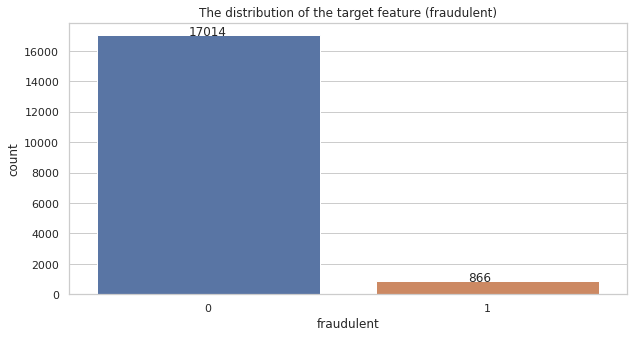

In [526]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_ffill.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))




## OverSampling Method Using SMOTE

In [527]:

smk = SMOTETomek(random_state=42)
X_NaN_ffill_res,Y_NaN_ffill_res= smk.fit_resample(df_NaN_ffill_minmax, y_NaN_ffill)


In [528]:
print(X_NaN_ffill_res.shape)
print(Y_NaN_ffill_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_ffill_res, X_test_NaN_ffill_res, y_train_NaN_ffill_res, y_test_NaN_ffill_res = train_test_split(X_NaN_ffill_res, Y_NaN_ffill_res)
X_train_NaN_ffill_res, X_validation_NaN_ffill_res, y_train_NaN_ffill_res, y_validation_NaN_ffill_res = train_test_split(X_train_NaN_ffill_res, y_train_NaN_ffill_res, train_size=0.8, random_state=42)
print(X_train_NaN_ffill_res.shape)
print(X_test_NaN_ffill_res.shape)
print(X_validation_NaN_ffill_res.shape)

(34028, 113)
(34028,)
(20416, 113)
(8507, 113)
(5105, 113)


In [529]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_ffill_res.fit(X_train_NaN_ffill_res, y_train_NaN_ffill_res)
print_score(rf_NaN_ffill_res, X_train_NaN_ffill_res, X_validation_NaN_ffill_res, y_train_NaN_ffill_res, y_validation_NaN_ffill_res, train=True)
print_score(rf_NaN_ffill_res, X_train_NaN_ffill_res, X_validation_NaN_ffill_res, y_train_NaN_ffill_res, y_validation_NaN_ffill_res, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10226
           1       1.00      1.00      1.00     10190

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10226     0]
 [    0 10190]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9928
Accuracy SD: 		 0.0019

Test Result:

accuracy score: 0.9937

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2539
           1       0.99      0.99      0.99      2566

    accuracy                           0.99      5105
   macro avg       0.99      0.99      0.99      5105
weighted avg       0.99      0.99      0.99      5105


Confusion Matrix: 
 [[2522   17]
 [  15 2551]]

ROC AUC: 0.9937



In [530]:
print_score(rf_NaN_ffill_res, X_train_NaN_ffill_res, X_test_NaN_ffill_res, y_train_NaN_ffill_res, y_test_NaN_ffill_res, train=False)



Test Result:

accuracy score: 0.9946

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4249
           1       0.99      1.00      0.99      4258

    accuracy                           0.99      8507
   macro avg       0.99      0.99      0.99      8507
weighted avg       0.99      0.99      0.99      8507


Confusion Matrix: 
 [[4223   26]
 [  20 4238]]

ROC AUC: 0.9946



## Adaptive Synthetic Sampling (ADASYN)

In [531]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_ffill_res1,Y_NaN_ffill_res1= adasyn.fit_resample(df_NaN_ffill_minmax, y_NaN_ffill)


In [532]:
print(X_NaN_ffill_res1.shape)
print(Y_NaN_ffill_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_ffill_res1, X_test_NaN_ffill_res1, y_train_NaN_ffill_res1, y_test_NaN_ffill_res1 = train_test_split(X_NaN_ffill_res1, Y_NaN_ffill_res1)
X_train_NaN_ffill_res1, X_validation_NaN_ffill_res1, y_train_NaN_ffill_res1, y_validation_NaN_ffill_res1 = train_test_split(X_train_NaN_ffill_res1, y_train_NaN_ffill_res1, train_size=0.8, random_state=42)
print(X_train_NaN_ffill_res1.shape)
print(X_test_NaN_ffill_res1.shape)
print(X_validation_NaN_ffill_res1.shape)

(34024, 113)
(34024,)
(20414, 113)
(8506, 113)
(5104, 113)


In [533]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_ffill_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_ffill_res1.fit(X_train_NaN_ffill_res1, y_train_NaN_ffill_res1)
print_score(rf_NaN_ffill_res1, X_train_NaN_ffill_res1, X_validation_NaN_ffill_res1, y_train_NaN_ffill_res1, y_validation_NaN_ffill_res1, train=True)
print_score(rf_NaN_ffill_res1, X_train_NaN_ffill_res1, X_validation_NaN_ffill_res1, y_train_NaN_ffill_res1, y_validation_NaN_ffill_res1, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10248
           1       1.00      1.00      1.00     10166

    accuracy                           1.00     20414
   macro avg       1.00      1.00      1.00     20414
weighted avg       1.00      1.00      1.00     20414


Confusion Matrix: 
 [[10248     0]
 [    0 10166]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9934
Accuracy SD: 		 0.0014

Test Result:

accuracy score: 0.9937

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2524
           1       0.99      1.00      0.99      2580

    accuracy                           0.99      5104
   macro avg       0.99      0.99      0.99      5104
weighted avg       0.99      0.99      0.99      5104


Confusion Matrix: 
 [[2504   20]
 [  12 2568]]

ROC AUC: 0.9937



In [534]:
print_score(rf_NaN_ffill_res1, X_train_NaN_ffill_res1, X_test_NaN_ffill_res1, y_train_NaN_ffill_res1, y_test_NaN_ffill_res1, train=False)



Test Result:

accuracy score: 0.9928

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4242
           1       0.99      0.99      0.99      4264

    accuracy                           0.99      8506
   macro avg       0.99      0.99      0.99      8506
weighted avg       0.99      0.99      0.99      8506


Confusion Matrix: 
 [[4213   29]
 [  32 4232]]

ROC AUC: 0.9928



# Replacing NaN values with bfill

In [535]:
df_NaN_bfill=df.copy()

In [536]:
df_NaN_bfill.isna().sum()

abil              0
account           0
also              0
amp               0
applic            0
              ...  
min_salary    15012
max_salary    15012
country         346
state          2580
city           2067
Length: 114, dtype: int64

In [537]:
df_NaN_bfill.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ    NaN    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [538]:
df_NaN_bfill=df_NaN_bfill.bfill()
df_NaN_bfill.isna().sum()

abil          0
account       0
also          0
amp           0
applic        0
             ..
min_salary    5
max_salary    5
country       0
state         0
city          0
Length: 114, dtype: int64

In [539]:
df_NaN_bfill.tail()

abil   account      also  ...  country  state          city
17875  0.038962  0.153725  0.082843  ...       CA     ON       Toronto
17876  0.090792  0.776149  0.048262  ...       US     PA  Philadelphia
17877  0.000000  0.174196  0.000000  ...       US     TX       Houston
17878  0.000000  0.000000  0.000000  ...       NG     LA         Lagos
17879  0.000000  0.000000  0.093702  ...       NZ      N    Wellington

[5 rows x 114 columns]

In [540]:
df_NaN_bfill['required_education'].fillna(df_NaN_bfill['required_education'].mode()[0], inplace=True)
df_NaN_bfill['min_salary'].fillna(df_NaN_bfill['min_salary'].mode()[0], inplace=True)
df_NaN_bfill['max_salary'].fillna(df_NaN_bfill['max_salary'].mode()[0], inplace=True)
df_NaN_bfill.isna().sum()


abil          0
account       0
also          0
amp           0
applic        0
             ..
min_salary    0
max_salary    0
country       0
state         0
city          0
Length: 114, dtype: int64

In [541]:
df_NaN_bfill['fraudulent']=df_NaN_bfill['fraudulent'].astype('category')
df_NaN_bfill.dtypes

abil          float64
account       float64
also          float64
amp           float64
applic        float64
               ...   
min_salary    float64
max_salary    float64
country        object
state          object
city           object
Length: 114, dtype: object

In [542]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_bfill['employment_type'] = lb_make.fit_transform(df_NaN_bfill['employment_type'])
df_NaN_bfill['required_experience'] = lb_make.fit_transform(df_NaN_bfill['required_experience'])
df_NaN_bfill['required_education'] = lb_make.fit_transform(df_NaN_bfill['required_education'])
df_NaN_bfill['industry'] = lb_make.fit_transform(df_NaN_bfill['industry'])
df_NaN_bfill['function'] = lb_make.fit_transform(df_NaN_bfill['function'])
df_NaN_bfill['country'] = lb_make.fit_transform(df_NaN_bfill['country'])
df_NaN_bfill['state'] = lb_make.fit_transform(df_NaN_bfill['state'])
df_NaN_bfill['city'] = lb_make.fit_transform(df_NaN_bfill['city'])
df_NaN_bfill.head() #Results in appending a new column to df

abil   account      also       amp  ...  max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...     28000.0       85    227  1457
1  0.000000  0.041469  0.033522  0.059203  ...     28000.0       60    155   188
2  0.000000  0.000000  0.000000  0.092825  ...     28000.0       85    155  2212
3  0.039152  0.566401  0.000000  0.000000  ...     28000.0       85    104  2163
4  0.000000  0.109922  0.000000  0.000000  ...     28000.0       85    130   786

[5 rows x 114 columns]

In [543]:
X_NaN_bfill = df_NaN_bfill.drop(['fraudulent'], axis=1)
X_col_NaN_bfill = X_NaN_bfill.columns
y_NaN_bfill = df_NaN_bfill['fraudulent']

In [544]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill, X_test_NaN_bfill, y_train_NaN_bfill, y_test_NaN_bfill = train_test_split(X_NaN_bfill, y_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_bfill, X_validation_NaN_bfill, y_train_NaN_bfill, y_validation_NaN_bfill = train_test_split(X_train_NaN_bfill, y_train_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on data of which NaN values replaced with bfill

In [545]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill.fit(X_train_NaN_bfill, y_train_NaN_bfill)
print_score(rf_NaN_bfill, X_train_NaN_bfill, X_validation_NaN_bfill, y_train_NaN_bfill, y_validation_NaN_bfill, train=True)
print_score(rf_NaN_bfill, X_train_NaN_bfill, X_validation_NaN_bfill, y_train_NaN_bfill, y_validation_NaN_bfill, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9698
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9685

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.98      0.41      0.58       152

    accuracy                           0.97      2861
   macro avg       0.98      0.71      0.78      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2708    1]
 [  89   63]]

ROC AUC: 0.7071



In [546]:
print_score(rf_NaN_bfill, X_train_NaN_bfill, X_test_NaN_bfill, y_train_NaN_bfill, y_test_NaN_bfill, train=False)


Test Result:

accuracy score: 0.9690

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.39      0.56       181

    accuracy                           0.97      3576
   macro avg       0.98      0.69      0.77      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 111   70]]

ROC AUC: 0.6934



## Standard Scalar on dataset whose all NaN values are replaced with bfill()

In [547]:
from sklearn.preprocessing import StandardScaler
X_NaN_bfill_scaler = StandardScaler().fit_transform(X_NaN_bfill.values)
df_NaN_bfill_scaler = pd.DataFrame(X_NaN_bfill_scaler, columns=X_col_NaN_bfill)
df_NaN_bfill_scaler.head()

abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ...  0.742968  0.678270  0.461999
1 -0.553052  0.050792  0.018699  ... -0.140960 -0.261536 -1.462564
2 -0.553052 -0.342603 -0.549431  ...  0.742968 -0.261536  1.607030
3 -0.000614  5.030532 -0.549431  ...  0.742968 -0.927232  1.532717
4 -0.553052  0.700166 -0.549431  ...  0.742968 -0.587858 -0.555639

[5 rows x 113 columns]

In [548]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill1, X_test_NaN_bfill1, y_train_NaN_bfill1, y_test_NaN_bfill1 = train_test_split(df_NaN_bfill_scaler, y_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_bfill1, X_validation_NaN_bfill1, y_train_NaN_bfill1, y_validation_NaN_bfill1 = train_test_split(X_train_NaN_bfill1, y_train_NaN_bfill1,
                                                    train_size=0.8,
                                                    random_state=42)

In [549]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill1 = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill1.fit(X_train_NaN_bfill1, y_train_NaN_bfill1)
print_score(rf_NaN_bfill1, X_train_NaN_bfill1, X_validation_NaN_bfill1, y_train_NaN_bfill1, y_validation_NaN_bfill1, train=True)
print_score(rf_NaN_bfill1, X_train_NaN_bfill1, X_validation_NaN_bfill1, y_train_NaN_bfill1, y_validation_NaN_bfill1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9692
Accuracy SD: 		 0.0028

Test Result:

accuracy score: 0.9696

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.99      0.43      0.60       152

    accuracy                           0.97      2861
   macro avg       0.98      0.72      0.79      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2708    1]
 [  86   66]]

ROC AUC: 0.7169



In [550]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_bfill_minmax = MinMaxScaler().fit_transform(df_NaN_bfill_scaler.values)
df_NaN_bfill_minmax = pd.DataFrame(X_NaN_bfill_minmax, columns=X_col_NaN_bfill)
df_NaN_bfill_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.955056  0.702786  0.610645
1  0.000000  0.043620  0.056792  ...  0.674157  0.479876  0.078793
2  0.000000  0.000000  0.000000  ...  0.955056  0.479876  0.927075
3  0.044569  0.595785  0.000000  ...  0.955056  0.321981  0.906538
4  0.000000  0.115624  0.000000  ...  0.955056  0.402477  0.329422

[5 rows x 113 columns]

In [551]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill2, X_test_NaN_bfill2, y_train_NaN_bfill2, y_test_NaN_bfill2 = train_test_split(df_NaN_bfill_minmax, y_NaN_bfill,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_bfill2, X_validation_NaN_bfill2, y_train_NaN_bfill2, y_validation_NaN_bfill2 = train_test_split(X_train_NaN_bfill2, y_train_NaN_bfill2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with bfill, scaled using MinMaxScaler.

In [552]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill2 = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill2.fit(X_train_NaN_bfill2, y_train_NaN_bfill2)
print_score(rf_NaN_bfill2, X_train_NaN_bfill2, X_validation_NaN_bfill2, y_train_NaN_bfill2, y_validation_NaN_bfill2, train=True)
print_score(rf_NaN_bfill2, X_train_NaN_bfill2, X_validation_NaN_bfill2, y_train_NaN_bfill2, y_validation_NaN_bfill2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9687
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9692

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       0.98      0.43      0.60       152

    accuracy                           0.97      2861
   macro avg       0.98      0.71      0.79      2861
weighted avg       0.97      0.97      0.96      2861


Confusion Matrix: 
 [[2708    1]
 [  87   65]]

ROC AUC: 0.7136



## Binarize Data (Make Binary) value>0 => 1 , value<0 => 0

In [553]:
from sklearn.preprocessing import Binarizer
X_NaN_bfill_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_bfill.values)
df_NaN_bfill_binary = pd.DataFrame(X_NaN_bfill_binary, columns=X_col_NaN_bfill)
df_NaN_bfill_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
2   0.0      0.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [554]:
from sklearn.model_selection import train_test_split
X_train_NaN_bfill3, X_test_NaN_bfill3, y_train_NaN_bfill3, y_test_NaN_bfill3 = train_test_split(df_NaN_bfill_binary, y_NaN_bfill,
                                                    train_size=0.8, random_state=42)
X_train_NaN_bfill3, X_validation_NaN_bfill3, y_train_NaN_bfill3, y_validation_NaN_bfill3 = train_test_split(X_train_NaN_bfill3, y_train_NaN_bfill3,
                                                    train_size=0.8, random_state=42)

## Random Forest classification on scaled data of which NaN values replaced with ffill, scaled using Binarizer.

In [555]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill3 = RandomForestClassifier(n_estimators=100)
rf_NaN_bfill3.fit(X_train_NaN_bfill3, y_train_NaN_bfill3)
print_score(rf_NaN_bfill3, X_train_NaN_bfill3, X_validation_NaN_bfill3, y_train_NaN_bfill3, y_validation_NaN_bfill3, train=True)
print_score(rf_NaN_bfill3, X_train_NaN_bfill3, X_validation_NaN_bfill3, y_train_NaN_bfill3, y_validation_NaN_bfill3, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9712
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9741

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.52      0.68       152

    accuracy                           0.97      2861
   macro avg       0.98      0.76      0.83      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  73   79]]

ROC AUC: 0.7597



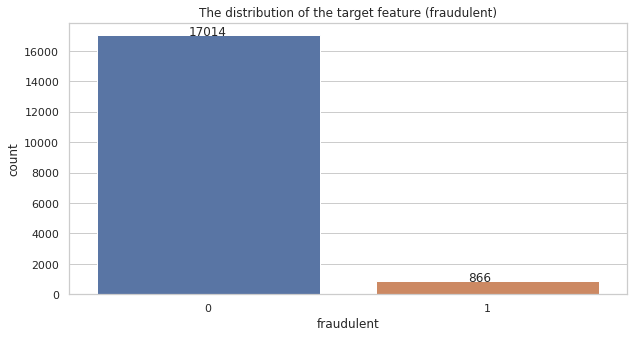

In [556]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_ffill.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))


##OverSampling Method Using SMOTE

In [557]:
smk  = SMOTETomek(random_state=42)
X_NaN_bfill_res,Y_NaN_bfill_res= smk.fit_resample(df_NaN_bfill_scaler,  y_NaN_bfill)

In [558]:
print(X_NaN_bfill_res.shape)
print(Y_NaN_bfill_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_bfill_res, X_test_NaN_bfill_res, y_train_NaN_bfill_res, y_test_NaN_bfill_res = train_test_split(X_NaN_bfill_res, Y_NaN_bfill_res)
X_train_NaN_bfill_res, X_validation_NaN_bfill_res, y_train_NaN_bfill_res, y_validation_NaN_bfill_res = train_test_split(X_train_NaN_bfill_res, y_train_NaN_bfill_res, train_size=0.8, random_state=42)
print(X_train_NaN_bfill_res.shape)
print(X_test_NaN_bfill_res.shape)
print(X_validation_NaN_bfill_res.shape)

(34028, 113)
(34028,)
(20416, 113)
(8507, 113)
(5105, 113)


In [559]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_bfill_res.fit(X_train_NaN_bfill_res, y_train_NaN_bfill_res)
print_score(rf_NaN_bfill_res, X_train_NaN_bfill_res, X_validation_NaN_bfill_res, y_train_NaN_bfill_res, y_validation_NaN_bfill_res, train=True)
print_score(rf_NaN_bfill_res, X_train_NaN_ffill_res, X_validation_NaN_bfill_res, y_train_NaN_bfill_res, y_validation_NaN_bfill_res, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10236
           1       1.00      1.00      1.00     10180

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10236     0]
 [    0 10180]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9940
Accuracy SD: 		 0.0014

Test Result:

accuracy score: 0.9902

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2529
           1       0.99      0.99      0.99      2576

    accuracy                           0.99      5105
   macro avg       0.99      0.99      0.99      5105
weighted avg       0.99      0.99      0.99      5105


Confusion Matrix: 
 [[2499   30]
 [  20 2556]]

ROC AUC: 0.9902



In [560]:
print_score(rf_NaN_bfill_res, X_train_NaN_ffill_res, X_test_NaN_bfill_res, y_train_NaN_bfill_res, y_test_NaN_bfill_res, train=False)


Test Result:

accuracy score: 0.9929

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4249
           1       0.99      0.99      0.99      4258

    accuracy                           0.99      8507
   macro avg       0.99      0.99      0.99      8507
weighted avg       0.99      0.99      0.99      8507


Confusion Matrix: 
 [[4215   34]
 [  26 4232]]

ROC AUC: 0.9929



## Adaptive Synthetic Sampling (ADASYN)

In [561]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_bfill_res1,Y_NaN_bfill_res1= adasyn.fit_resample(df_NaN_bfill_minmax, y_NaN_bfill)

In [562]:
print(X_NaN_bfill_res1.shape)
print(Y_NaN_bfill_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_bfill_res1, X_test_NaN_bfill_res1, y_train_NaN_bfill_res1, y_test_NaN_bfill_res1 = train_test_split(X_NaN_bfill_res1, Y_NaN_bfill_res1)
X_train_NaN_bfill_res1, X_validation_NaN_bfill_res1, y_train_NaN_bfill_res1, y_validation_NaN_bfill_res1 = train_test_split(X_train_NaN_bfill_res1, y_train_NaN_bfill_res1, train_size=0.8, random_state=42)
print(X_train_NaN_bfill_res1.shape)
print(X_test_NaN_bfill_res1.shape)
print(X_validation_NaN_bfill_res1.shape)


(34070, 113)
(34070,)
(20441, 113)
(8518, 113)
(5111, 113)


In [563]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_bfill_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_bfill_res1.fit(X_train_NaN_bfill_res1, y_train_NaN_bfill_res1)
print_score(rf_NaN_bfill_res1, X_train_NaN_bfill_res1, X_validation_NaN_bfill_res1, y_train_NaN_bfill_res1, y_validation_NaN_bfill_res1, train=True)
print_score(rf_NaN_bfill_res1, X_train_NaN_bfill_res1, X_validation_NaN_bfill_res1, y_train_NaN_bfill_res1, y_validation_NaN_bfill_res1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10249
           1       1.00      1.00      1.00     10192

    accuracy                           1.00     20441
   macro avg       1.00      1.00      1.00     20441
weighted avg       1.00      1.00      1.00     20441


Confusion Matrix: 
 [[10249     0]
 [    0 10192]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9940
Accuracy SD: 		 0.0020

Test Result:

accuracy score: 0.9943

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2512
           1       0.99      1.00      0.99      2599

    accuracy                           0.99      5111
   macro avg       0.99      0.99      0.99      5111
weighted avg       0.99      0.99      0.99      5111


Confusion Matrix: 
 [[2495   17]
 [  12 2587]]

ROC AUC: 0.9943



In [591]:
print_score(rf_NaN_bfill_res1, X_train_NaN_bfill_res1, X_test_NaN_bfill_res1, y_train_NaN_bfill_res1, y_test_NaN_bfill_res1, train=False)


Test Result:

accuracy score: 0.9944

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4253
           1       0.99      1.00      0.99      4265

    accuracy                           0.99      8518
   macro avg       0.99      0.99      0.99      8518
weighted avg       0.99      0.99      0.99      8518


Confusion Matrix: 
 [[4220   33]
 [  15 4250]]

ROC AUC: 0.9944



# Filling numerical NaN values using KNNImputer and categorical with mode

In [564]:
df_NaN_imputer=df.copy()
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_NaN_imputer['min_salary']=imp.fit_transform(df_NaN_imputer[['min_salary']]) 
df_NaN_imputer['max_salary']=imp.fit_transform(df_NaN_imputer[['max_salary']]) 

In [565]:
df_NaN_imputer.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ    NaN    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [566]:
#categorical
df_NaN_imputer['employment_type'].fillna(df_NaN_imputer['employment_type'].mode()[0], inplace=True)
df_NaN_imputer['required_experience'].fillna(df_NaN_imputer['required_experience'].mode()[0], inplace=True)
df_NaN_imputer['required_education'].fillna(df_NaN_imputer['required_education'].mode()[0], inplace=True)
df_NaN_imputer['industry'].fillna(df_NaN_imputer['industry'].mode()[0], inplace=True)
df_NaN_imputer['function'].fillna(df_NaN_imputer['function'].mode()[0], inplace=True)
df_NaN_imputer['country'].fillna(df_NaN_imputer['country'].mode()[0], inplace=True)
df_NaN_imputer['state'].fillna(df_NaN_imputer['state'].mode()[0], inplace=True)
df_NaN_imputer['city'].fillna(df_NaN_imputer['city'].mode()[0], inplace=True)


In [567]:
df_NaN_imputer.head()

abil   account      also  ...  country  state        city
0  0.000000  0.000000  0.116434  ...       US     NY    New York
1  0.000000  0.041469  0.033522  ...       NZ     CA    Auckland
2  0.000000  0.000000  0.000000  ...       US     IA       Wever
3  0.039152  0.566401  0.000000  ...       US     DC  Washington
4  0.000000  0.109922  0.000000  ...       US     FL  Fort Worth

[5 rows x 114 columns]

In [568]:
df_NaN_imputer.isna().sum().sum()

0

In [569]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_NaN_imputer['employment_type'] = lb_make.fit_transform(df_NaN_imputer['employment_type'])
df_NaN_imputer['required_experience'] = lb_make.fit_transform(df_NaN_imputer['required_experience'])
df_NaN_imputer['required_education'] = lb_make.fit_transform(df_NaN_imputer['required_education'])
df_NaN_imputer['industry'] = lb_make.fit_transform(df_NaN_imputer['industry'])
df_NaN_imputer['function'] = lb_make.fit_transform(df_NaN_imputer['function'])
df_NaN_imputer['country'] = lb_make.fit_transform(df_NaN_imputer['country'])
df_NaN_imputer['state'] = lb_make.fit_transform(df_NaN_imputer['state'])
df_NaN_imputer['city'] = lb_make.fit_transform(df_NaN_imputer['city'])
df_NaN_imputer.head() #Results in appending a new column to df

abil   account      also       amp  ...     max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...  804935.732218       85    227  1457
1  0.000000  0.041469  0.033522  0.059203  ...  804935.732218       60     83   188
2  0.000000  0.000000  0.000000  0.092825  ...  804935.732218       85    155  2212
3  0.039152  0.566401  0.000000  0.000000  ...  804935.732218       85    104  2163
4  0.000000  0.109922  0.000000  0.000000  ...  804935.732218       85    130   786

[5 rows x 114 columns]

In [570]:
X_NaN_imputer = df_NaN_imputer.drop(['fraudulent'], axis=1)
X_col_NaN_imputer = X_NaN_imputer.columns
y_NaN_imputer = df_NaN_imputer['fraudulent']

In [571]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer, X_test_NaN_imputer, y_train_NaN_imputer, y_test_NaN_imputer = train_test_split(X_NaN_imputer, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer, X_validation_NaN_imputer, y_train_NaN_imputer, y_validation_NaN_imputer = train_test_split(X_train_NaN_imputer, y_train_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on data of which numerical NaN values replaced with KNN Imputer categorical with mode.

In [572]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer.fit(X_train_NaN_imputer, y_train_NaN_imputer)
print_score(rf_NaN_imputer, X_train_NaN_imputer, X_validation_NaN_imputer, y_train_NaN_imputer, y_validation_NaN_imputer, train=True)
print_score(rf_NaN_imputer, X_train_NaN_imputer, X_validation_NaN_imputer, y_train_NaN_imputer, y_validation_NaN_imputer, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9707
Accuracy SD: 		 0.0029

Test Result:

accuracy score: 0.9717

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.98      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  80   72]]

ROC AUC: 0.7367



In [592]:
print_score(rf_NaN_imputer, X_train_NaN_imputer, X_test_NaN_imputer, y_train_NaN_imputer, y_test_NaN_imputer, train=False)


Test Result:

accuracy score: 0.9701

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.97      0.42      0.59       181

    accuracy                           0.97      3576
   macro avg       0.97      0.71      0.79      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3393    2]
 [ 105   76]]

ROC AUC: 0.7097



## Standard Scalar on dataset whose all numerical NaN values are replaced with KNNImputer() and categorical with mode

In [573]:
from sklearn.preprocessing import StandardScaler
X_NaN_imputer_scaler = StandardScaler().fit_transform(X_NaN_imputer.values)
df_NaN_imputer_scaler = pd.DataFrame(X_NaN_imputer_scaler, columns=X_col_NaN_imputer)
df_NaN_imputer_scaler.head()

abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ...  0.732256  0.836076  0.480200
1 -0.553052  0.050792  0.018699  ... -0.155046 -1.010106 -1.567810
2 -0.553052 -0.342603 -0.549431  ...  0.732256 -0.087015  1.698677
3 -0.000614  5.030532 -0.549431  ...  0.732256 -0.740871  1.619597
4 -0.553052  0.700166 -0.549431  ...  0.732256 -0.407533 -0.602712

[5 rows x 113 columns]

In [574]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer1, X_test_NaN_imputer1, y_train_NaN_imputer1, y_test_NaN_imputer1 = train_test_split(df_NaN_imputer_scaler, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer1, X_validation_NaN_imputer1, y_train_NaN_imputer1, y_validation_NaN_imputer1 = train_test_split(X_train_NaN_imputer1, y_train_NaN_imputer1,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which numerical NaN values replaced with KNN Imputer categorical with mode, scaled using StandardScaler.

In [575]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer1 = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer1.fit(X_train_NaN_imputer1, y_train_NaN_imputer1)
print_score(rf_NaN_imputer1, X_train_NaN_imputer1, X_validation_NaN_imputer1, y_train_NaN_imputer1, y_validation_NaN_imputer1, train=True)
print_score(rf_NaN_imputer1, X_train_NaN_imputer1, X_validation_NaN_imputer1, y_train_NaN_imputer1, y_validation_NaN_imputer1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9700
Accuracy SD: 		 0.0031

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  80   72]]

ROC AUC: 0.7368



In [593]:
print_score(rf_NaN_imputer1, X_train_NaN_imputer1, X_test_NaN_imputer1, y_train_NaN_imputer1, y_test_NaN_imputer1, train=False)


Test Result:

accuracy score: 0.9715

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.99      0.44      0.61       181

    accuracy                           0.97      3576
   macro avg       0.98      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 101   80]]

ROC AUC: 0.7208



##  MinMax Scalar on dataset whose all NaN values are replaced with KNNImputer()

In [576]:
from sklearn.preprocessing import MinMaxScaler
X_NaN_imputer_minmax = MinMaxScaler().fit_transform(X_NaN_imputer.values)
df_NaN_imputer_minmax = pd.DataFrame(X_NaN_imputer_minmax, columns=X_col_NaN_imputer)
df_NaN_imputer_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.955056  0.702786  0.610645
1  0.000000  0.043620  0.056792  ...  0.674157  0.256966  0.078793
2  0.000000  0.000000  0.000000  ...  0.955056  0.479876  0.927075
3  0.044569  0.595785  0.000000  ...  0.955056  0.321981  0.906538
4  0.000000  0.115624  0.000000  ...  0.955056  0.402477  0.329422

[5 rows x 113 columns]

In [577]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer2, X_test_NaN_imputer2, y_train_NaN_imputer2, y_test_NaN_imputer2 = train_test_split(df_NaN_imputer_minmax, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer2, X_validation_NaN_imputer2, y_train_NaN_imputer2, y_validation_NaN_imputer2 = train_test_split(X_train_NaN_imputer2, y_train_NaN_imputer2,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which numerical NaN values replaced with KNNimputer, categorical with mode, scaled using MinMax scalar

In [578]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer2 = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer2.fit(X_train_NaN_imputer2, y_train_NaN_imputer2)
print_score(rf_NaN_imputer2, X_train_NaN_imputer2, X_validation_NaN_imputer2, y_train_NaN_imputer2, y_validation_NaN_imputer2, train=True)
print_score(rf_NaN_imputer2, X_train_NaN_imputer2, X_validation_NaN_imputer2, y_train_NaN_imputer2, y_validation_NaN_imputer2, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9712
Accuracy SD: 		 0.0037

Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       1.00      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.99      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  80   72]]

ROC AUC: 0.7368



In [594]:
print_score(rf_NaN_imputer2, X_train_NaN_imputer2, X_test_NaN_imputer2, y_train_NaN_imputer2, y_test_NaN_imputer2, train=False)


Test Result:

accuracy score: 0.9715

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       1.00      0.44      0.61       181

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3395    0]
 [ 102   79]]

ROC AUC: 0.7182



## Binarize Data (Make Binary) value>0 => 1 , value<0 => 0

In [579]:
from sklearn.preprocessing import Binarizer
X_NaN_imputer_binary = Binarizer(threshold=0.0).fit_transform(X_NaN_imputer.values)
df_NaN_imputer_binary = pd.DataFrame(X_NaN_imputer_binary, columns=X_col_NaN_imputer)
df_NaN_imputer_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
2   0.0      0.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [580]:
from sklearn.model_selection import train_test_split
X_train_NaN_imputer3, X_test_NaN_imputer3, y_train_NaN_imputer3, y_test_NaN_imputer3 = train_test_split(df_NaN_imputer_binary, y_NaN_imputer,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_NaN_imputer3, X_validation_NaN_imputer3, y_train_NaN_imputer3, y_validation_NaN_imputer3 = train_test_split(X_train_NaN_imputer3, y_train_NaN_imputer3,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on scaled data of which numerical NaN values replaced with KNNimputer, categorical with mode, scaled using Binarizer.

In [581]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer3 = RandomForestClassifier(n_estimators=100)
rf_NaN_imputer3.fit(X_train_NaN_imputer3, y_train_NaN_imputer3)
print_score(rf_NaN_imputer3, X_train_NaN_imputer3, X_validation_NaN_imputer3, y_train_NaN_imputer3, y_validation_NaN_imputer3, train=True)
print_score(rf_NaN_imputer3, X_train_NaN_imputer3, X_validation_NaN_imputer3, y_train_NaN_imputer3, y_validation_NaN_imputer3, train=False)

Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    1   532]]

ROC AUC: 0.9991

Average Accuracy: 	 0.9719
Accuracy SD: 		 0.0030

Test Result:

accuracy score: 0.9748

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.53      0.69       152

    accuracy                           0.97      2861
   macro avg       0.98      0.77      0.84      2861
weighted avg       0.98      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  71   81]]

ROC AUC: 0.7663



In [595]:
print_score(rf_NaN_imputer3, X_train_NaN_imputer3, X_test_NaN_imputer3, y_train_NaN_imputer3, y_test_NaN_imputer3, train=False)


Test Result:

accuracy score: 0.9718

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.99      0.45      0.62       181

    accuracy                           0.97      3576
   macro avg       0.98      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 100   81]]

ROC AUC: 0.7236



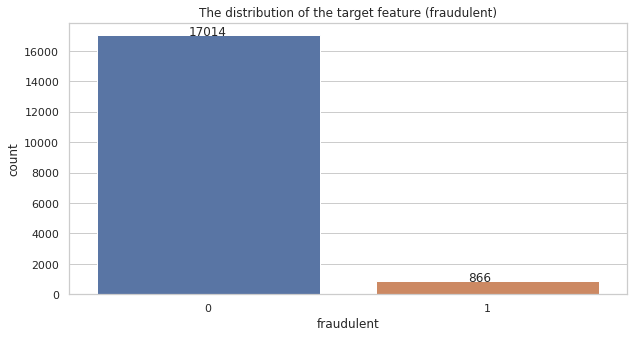

In [582]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_NaN_imputer.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))


## OverSampling Method Using SMOTE

In [583]:
smk = SMOTETomek(random_state=42)
X_NaN_imputer_res,Y_NaN_imputer_res= smk.fit_resample(df_NaN_imputer_minmax, y_NaN_imputer)

In [584]:
print(X_NaN_imputer_res.shape)
print(Y_NaN_imputer_res.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_imputer_res, X_test_NaN_imputer_res, y_train_NaN_imputer_res, y_test_NaN_imputer_res = train_test_split(X_NaN_imputer_res, Y_NaN_imputer_res)
X_train_NaN_imputer_res, X_validation_NaN_imputer_res, y_train_NaN_imputer_res, y_validation_NaN_imputer_res = train_test_split(X_train_NaN_imputer_res, y_train_NaN_imputer_res, train_size=0.8, random_state=42)
print(X_train_NaN_imputer_res.shape)
print(X_test_NaN_imputer_res.shape)
print(X_validation_NaN_imputer_res.shape)

(34028, 113)
(34028,)
(20416, 113)
(8507, 113)
(5105, 113)


In [585]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_imputer_res.fit(X_train_NaN_imputer_res, y_train_NaN_imputer_res)
print_score(rf_NaN_imputer_res, X_train_NaN_imputer_res, X_validation_NaN_imputer_res, y_train_NaN_imputer_res, y_validation_NaN_imputer_res, train=True)
print_score(rf_NaN_imputer_res, X_train_NaN_imputer_res, X_validation_NaN_imputer_res, y_train_NaN_imputer_res, y_validation_NaN_imputer_res, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10216
           1       1.00      1.00      1.00     10200

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10216     0]
 [    0 10200]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9952
Accuracy SD: 		 0.0015

Test Result:

accuracy score: 0.9961

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2558
           1       0.99      1.00      1.00      2547

    accuracy                           1.00      5105
   macro avg       1.00      1.00      1.00      5105
weighted avg       1.00      1.00      1.00      5105


Confusion Matrix: 
 [[2545   13]
 [   7 2540]]

ROC AUC: 0.9961



In [596]:
print_score(rf_NaN_imputer_res, X_train_NaN_imputer_res, X_train_NaN_imputer_res, y_train_NaN_imputer_res, y_train_NaN_imputer_res, train=False)


Test Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10216
           1       1.00      1.00      1.00     10200

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10216     0]
 [    0 10200]]

ROC AUC: 1.0000



## Adaptive Synthetic Sampling (ADASYN)

In [586]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_NaN_imputer_res1,Y_NaN_imputer_res1= adasyn.fit_resample(df_NaN_imputer_minmax, y_NaN_imputer)

In [587]:
print(X_NaN_imputer_res1.shape)
print(Y_NaN_imputer_res1.shape)
from sklearn.model_selection import train_test_split
X_train_NaN_imputer_res1, X_test_NaN_imputer_res1, y_train_NaN_imputer_res1, y_test_NaN_imputer_res1 = train_test_split(X_NaN_imputer_res1, Y_NaN_imputer_res1)
X_train_NaN_imputer_res1, X_validation_NaN_imputer_res1, y_train_NaN_imputer_res1, y_validation_NaN_imputer_res1 = train_test_split(X_train_NaN_imputer_res1, y_train_NaN_imputer_res1, train_size=0.8, random_state=42)
print(X_train_NaN_imputer_res1.shape)
print(X_test_NaN_imputer_res1.shape)
print(X_validation_NaN_imputer_res1.shape)

(34021, 113)
(34021,)
(20412, 113)
(8506, 113)
(5103, 113)


In [588]:
from sklearn.ensemble import RandomForestClassifier
rf_NaN_imputer_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_NaN_imputer_res1.fit(X_train_NaN_imputer_res1, y_train_NaN_imputer_res1)
print_score(rf_NaN_imputer_res1, X_train_NaN_imputer_res1, X_validation_NaN_imputer_res1, y_train_NaN_imputer_res1, y_validation_NaN_imputer_res1, train=True)
print_score(rf_NaN_imputer_res1, X_train_NaN_imputer_res1, X_validation_NaN_imputer_res1, y_train_NaN_imputer_res1, y_validation_NaN_imputer_res1, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10267
           1       1.00      1.00      1.00     10145

    accuracy                           1.00     20412
   macro avg       1.00      1.00      1.00     20412
weighted avg       1.00      1.00      1.00     20412


Confusion Matrix: 
 [[10267     0]
 [    0 10145]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9946
Accuracy SD: 		 0.0014

Test Result:

accuracy score: 0.9957

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2483
           1       0.99      1.00      1.00      2620

    accuracy                           1.00      5103
   macro avg       1.00      1.00      1.00      5103
weighted avg       1.00      1.00      1.00      5103


Confusion Matrix: 
 [[2466   17]
 [   5 2615]]

ROC AUC: 0.9956



In [589]:
print_score(rf_NaN_imputer_res1, X_train_NaN_imputer_res1, X_test_NaN_imputer_res1, y_train_NaN_imputer_res1, y_test_NaN_imputer_res1, train=False)



Test Result:

accuracy score: 0.9952

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4264
           1       0.99      1.00      1.00      4242

    accuracy                           1.00      8506
   macro avg       1.00      1.00      1.00      8506
weighted avg       1.00      1.00      1.00      8506


Confusion Matrix: 
 [[4239   25]
 [  16 4226]]

ROC AUC: 0.9952



# Iterative Imputer

In [597]:
df_iterative=df.copy()
df_iterative.head()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
df_iterative['min_salary']=imputer.fit_transform(df_iterative[['min_salary']]) 
df_iterative['max_salary']=imputer.fit_transform(df_iterative[['max_salary']]) 

In [598]:
#categorical
df_iterative['employment_type'].fillna(df_iterative['employment_type'].mode()[0], inplace=True)
df_iterative['required_experience'].fillna(df_iterative['required_experience'].mode()[0], inplace=True)
df_iterative['required_education'].fillna(df_iterative['required_education'].mode()[0], inplace=True)
df_iterative['industry'].fillna(df_iterative['industry'].mode()[0], inplace=True)
df_iterative['function'].fillna(df_iterative['function'].mode()[0], inplace=True)
df_iterative['country'].fillna(df_iterative['country'].mode()[0], inplace=True)
df_iterative['state'].fillna(df_iterative['state'].mode()[0], inplace=True)
df_iterative['city'].fillna(df_iterative['city'].mode()[0], inplace=True)


In [599]:
df_iterative.isna().sum().sum()

0

In [600]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_iterative['employment_type'] = lb_make.fit_transform(df_iterative['employment_type'])
df_iterative['required_experience'] = lb_make.fit_transform(df_iterative['required_experience'])
df_iterative['required_education'] = lb_make.fit_transform(df_iterative['required_education'])
df_iterative['industry'] = lb_make.fit_transform(df_iterative['industry'])
df_iterative['function'] = lb_make.fit_transform(df_iterative['function'])
df_iterative['country'] = lb_make.fit_transform(df_iterative['country'])
df_iterative['state'] = lb_make.fit_transform(df_iterative['state'])
df_iterative['city'] = lb_make.fit_transform(df_iterative['city'])
df_iterative.head() #Results in appending a new column to df

abil   account      also       amp  ...     max_salary  country  state  city
0  0.000000  0.000000  0.116434  0.102818  ...  804935.732218       85    227  1457
1  0.000000  0.041469  0.033522  0.059203  ...  804935.732218       60     83   188
2  0.000000  0.000000  0.000000  0.092825  ...  804935.732218       85    155  2212
3  0.039152  0.566401  0.000000  0.000000  ...  804935.732218       85    104  2163
4  0.000000  0.109922  0.000000  0.000000  ...  804935.732218       85    130   786

[5 rows x 114 columns]

In [601]:
X_iterative = df_iterative.drop(['fraudulent'], axis=1)
X_col_iterative = X_iterative.columns
y_iterative = df_iterative['fraudulent']

In [602]:
from sklearn.model_selection import train_test_split
X_train_iterative, X_test_iterative, y_train_iterative, y_test_iterative = train_test_split(X_iterative, y_iterative,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_iterative, X_validation_iterative, y_train_iterative, y_validation_iterative = train_test_split(X_train_iterative, y_train_iterative,
                                                    train_size=0.8,
                                                    random_state=42)

## Random Forest classification on data of which numerical NaN values replaced with Iterative Imputer categorical with mode.

In [603]:
from sklearn.ensemble import RandomForestClassifier
rf_iterative = RandomForestClassifier(n_estimators=100)
rf_iterative.fit(X_train_iterative, y_train_iterative)
print_score(rf_iterative, X_train_iterative, X_validation_iterative, y_train_iterative, y_validation_iterative, train=True)
print_score(rf_iterative, X_train_iterative, X_validation_iterative, y_train_iterative, y_validation_iterative, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9707
Accuracy SD: 		 0.0036

Test Result:

accuracy score: 0.9713

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.47      0.63       152

    accuracy                           0.97      2861
   macro avg       0.98      0.73      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  81   71]]

ROC AUC: 0.7334



In [604]:
print_score(rf_iterative, X_train_iterative, X_test_iterative, y_train_iterative, y_test_iterative, train=False)


Test Result:

accuracy score: 0.9698

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.41      0.58       181

    accuracy                           0.97      3576
   macro avg       0.98      0.70      0.78      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3394    1]
 [ 107   74]]

ROC AUC: 0.7043



## standard scalar

In [605]:
from sklearn.preprocessing import StandardScaler
X_iterative_scaler = StandardScaler().fit_transform(X_iterative.values)
df_iterative_scaler = pd.DataFrame(X_iterative_scaler, columns=X_col_iterative)
df_iterative_scaler.head()


abil   account      also  ...   country     state      city
0 -0.553052 -0.342603  1.423907  ...  0.732256  0.836076  0.480200
1 -0.553052  0.050792  0.018699  ... -0.155046 -1.010106 -1.567810
2 -0.553052 -0.342603 -0.549431  ...  0.732256 -0.087015  1.698677
3 -0.000614  5.030532 -0.549431  ...  0.732256 -0.740871  1.619597
4 -0.553052  0.700166 -0.549431  ...  0.732256 -0.407533 -0.602712

[5 rows x 113 columns]

In [606]:
from sklearn.model_selection import train_test_split
X_train_iterative1, X_test_iterative1, y_train_iterative1, y_test_iterative1 = train_test_split(df_iterative_scaler, y_iterative,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_iterative1, X_validation_iterative1, y_train_iterative1, y_validation_iterative1 = train_test_split(X_train_iterative1, y_train_iterative1,
                                                    train_size=0.8,
                                                    random_state=42)

In [607]:
from sklearn.ensemble import RandomForestClassifier
rf_iterative1 = RandomForestClassifier(n_estimators=100)
rf_iterative1.fit(X_train_NaN_imputer1, y_train_iterative1)
print_score(rf_iterative1, X_train_iterative1, X_validation_iterative1, y_train_iterative1, y_validation_iterative1, train=True)
print_score(rf_iterative1, X_train_iterative1, X_validation_iterative1, y_train_iterative1, y_validation_iterative1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9700
Accuracy SD: 		 0.0032

Test Result:

accuracy score: 0.9717

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.47      0.64       152

    accuracy                           0.97      2861
   macro avg       0.98      0.74      0.81      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  80   72]]

ROC AUC: 0.7367



In [608]:
print_score(rf_iterative1, X_train_iterative1, X_test_iterative1, y_train_iterative1, y_test_iterative1, train=False)


Test Result:

accuracy score: 0.9709

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       0.99      0.43      0.60       181

    accuracy                           0.97      3576
   macro avg       0.98      0.72      0.79      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [ 103   78]]

ROC AUC: 0.7153



## Min Max Scalar

In [609]:
from sklearn.preprocessing import MinMaxScaler
X_iterative_minmax = MinMaxScaler().fit_transform(X_iterative.values)
df_iterative_minmax = pd.DataFrame(X_iterative_minmax, columns=X_col_iterative)
df_iterative_minmax.head()

abil   account      also  ...   country     state      city
0  0.000000  0.000000  0.197262  ...  0.955056  0.702786  0.610645
1  0.000000  0.043620  0.056792  ...  0.674157  0.256966  0.078793
2  0.000000  0.000000  0.000000  ...  0.955056  0.479876  0.927075
3  0.044569  0.595785  0.000000  ...  0.955056  0.321981  0.906538
4  0.000000  0.115624  0.000000  ...  0.955056  0.402477  0.329422

[5 rows x 113 columns]

In [610]:
from sklearn.model_selection import train_test_split
X_train_iterative2, X_test_iterative2, y_train_iterative2, y_test_iterative2 = train_test_split(df_iterative_minmax, y_iterative,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_iterative2, X_validation_iterative2, y_train_iterative2, y_validation_iterative2 = train_test_split(X_train_iterative2, y_train_iterative2,
                                                    train_size=0.8,
                                                    random_state=42)

In [611]:
from sklearn.ensemble import RandomForestClassifier
rf_iterative2 = RandomForestClassifier(n_estimators=100)
rf_iterative2.fit(X_train_iterative2, y_train_iterative2)
print_score(rf_iterative2, X_train_iterative2, X_validation_iterative2, y_train_iterative2, y_validation_iterative2, train=True)
print_score(rf_iterative2, X_train_iterative2, X_validation_iterative2, y_train_iterative2, y_validation_iterative2, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10910     0]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9701
Accuracy SD: 		 0.0028

Test Result:

accuracy score: 0.9710

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2709
           1       1.00      0.45      0.62       152

    accuracy                           0.97      2861
   macro avg       0.99      0.73      0.80      2861
weighted avg       0.97      0.97      0.97      2861


Confusion Matrix: 
 [[2709    0]
 [  83   69]]

ROC AUC: 0.7270



In [612]:
print_score(rf_iterative2, X_train_iterative2, X_test_iterative2, y_train_iterative2, y_test_iterative2, train=False)



Test Result:

accuracy score: 0.9701

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3395
           1       1.00      0.41      0.58       181

    accuracy                           0.97      3576
   macro avg       0.98      0.70      0.78      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix: 
 [[3395    0]
 [ 107   74]]

ROC AUC: 0.7044



## Binarizer

In [613]:
from sklearn.preprocessing import Binarizer
X_iterative_binary = Binarizer(threshold=0.0).fit_transform(X_iterative.values)
df_iterative_binary = pd.DataFrame(X_iterative_binary, columns=X_col_iterative)
df_iterative_binary.head()

abil  account  also  amp  ...  max_salary  country  state  city
0   0.0      0.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
1   0.0      1.0   1.0  1.0  ...         1.0      1.0    1.0   1.0
2   0.0      0.0   0.0  1.0  ...         1.0      1.0    1.0   1.0
3   1.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0
4   0.0      1.0   0.0  0.0  ...         1.0      1.0    1.0   1.0

[5 rows x 113 columns]

In [614]:
from sklearn.model_selection import train_test_split
X_train_iterative3, X_test_iterative3, y_train_iterative3, y_test_iterative3 = train_test_split(df_iterative_binary, y_iterative,
                                                    train_size=0.8,
                                                    random_state=42)
X_train_iterative3, X_validation_iterative3, y_train_iterative3, y_validation_iterative3 = train_test_split(X_train_iterative3, y_train_iterative3,
                                                    train_size=0.8,
                                                    random_state=42)

In [615]:
from sklearn.ensemble import RandomForestClassifier
rf_iterative3 = RandomForestClassifier(n_estimators=100)
rf_iterative3.fit(X_train_iterative3, y_train_iterative3)
print_score(rf_iterative3, X_train_iterative3, X_validation_iterative3, y_train_iterative3, y_validation_iterative3, train=True)
print_score(rf_iterative3, X_train_iterative3, X_validation_iterative3, y_train_iterative3, y_validation_iterative3, train=False)


Train Result:

accuracy score: 0.9999

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10910
           1       1.00      1.00      1.00       533

    accuracy                           1.00     11443
   macro avg       1.00      1.00      1.00     11443
weighted avg       1.00      1.00      1.00     11443


Confusion Matrix: 
 [[10909     1]
 [    0   533]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9724
Accuracy SD: 		 0.0033

Test Result:

accuracy score: 0.9752

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2709
           1       0.99      0.54      0.70       152

    accuracy                           0.98      2861
   macro avg       0.98      0.77      0.84      2861
weighted avg       0.98      0.98      0.97      2861


Confusion Matrix: 
 [[2708    1]
 [  70   82]]

ROC AUC: 0.7696



In [616]:
print_score(rf_iterative3, X_train_iterative3, X_test_iterative3, y_train_iterative3, y_test_iterative3, train=False)



Test Result:

accuracy score: 0.9720

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       0.99      0.45      0.62       181

    accuracy                           0.97      3576
   macro avg       0.98      0.73      0.80      3576
weighted avg       0.97      0.97      0.97      3576


Confusion Matrix: 
 [[3394    1]
 [  99   82]]

ROC AUC: 0.7264



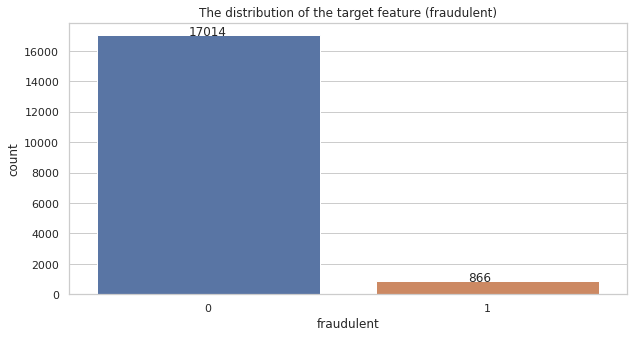

In [617]:
# Plotting targeted variable
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_iterative.fraudulent)
plt.title('The distribution of the target feature (fraudulent)')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()))

## OverSampling Method Using SMOTE

In [618]:
smk = SMOTETomek(random_state=42)
X_iterative_res,Y_iterative_res= smk.fit_resample(df_iterative_scaler, y_iterative)


In [619]:
print(X_iterative_res.shape)
print(Y_iterative_res.shape)
from sklearn.model_selection import train_test_split
X_train_iterative_res, X_test_iterative_res, y_train_iterative_res, y_test_iterative_res = train_test_split(X_iterative_res, Y_iterative_res)
X_train_iterative_res, X_validation_iterative_res, y_train_iterative_res, y_validation_iterative_res = train_test_split(X_train_iterative_res, y_train_iterative_res, train_size=0.8, random_state=42)
print(X_train_iterative_res.shape)
print(X_test_iterative_res.shape)
print(X_validation_iterative_res.shape)


(34028, 113)
(34028,)
(20416, 113)
(8507, 113)
(5105, 113)


In [620]:

from sklearn.ensemble import RandomForestClassifier
rf_iterative_res = RandomForestClassifier(n_estimators=100, random_state=42)
rf_iterative_res.fit(X_train_iterative_res, y_train_iterative_res)
print_score(rf_iterative_res, X_train_iterative_res, X_validation_iterative_res, y_train_iterative_res, y_validation_iterative_res, train=True)
print_score(rf_iterative_res, X_train_iterative_res, X_validation_iterative_res, y_train_iterative_res, y_validation_iterative_res, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10208
           1       1.00      1.00      1.00     10208

    accuracy                           1.00     20416
   macro avg       1.00      1.00      1.00     20416
weighted avg       1.00      1.00      1.00     20416


Confusion Matrix: 
 [[10208     0]
 [    0 10208]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9946
Accuracy SD: 		 0.0013

Test Result:

accuracy score: 0.9955

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2538
           1       0.99      1.00      1.00      2567

    accuracy                           1.00      5105
   macro avg       1.00      1.00      1.00      5105
weighted avg       1.00      1.00      1.00      5105


Confusion Matrix: 
 [[2520   18]
 [   5 2562]]

ROC AUC: 0.9955



In [621]:
print_score(rf_iterative_res, X_train_iterative_res, X_test_iterative_res, y_train_iterative_res, y_test_iterative_res, train=False)



Test Result:

accuracy score: 0.9955

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4268
           1       0.99      1.00      1.00      4239

    accuracy                           1.00      8507
   macro avg       1.00      1.00      1.00      8507
weighted avg       1.00      1.00      1.00      8507


Confusion Matrix: 
 [[4245   23]
 [  15 4224]]

ROC AUC: 0.9955



## OverSampling Method Using ADASYN

In [622]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN()
X_iterative_res1,Y_iterative_res1= adasyn.fit_resample(df_iterative_scaler, y_iterative)


In [623]:
print(X_iterative_res1.shape)
print(Y_iterative_res1.shape)
from sklearn.model_selection import train_test_split
X_train_iterative_res1, X_test_iterative_res1, y_train_iterative_res1, y_test_iterative_res1 = train_test_split(X_iterative_res1, Y_iterative_res1)
X_train_iterative_res1, X_validation_iterative_res1, y_train_iterative_res1, y_validation_iterative_res1 = train_test_split(X_train_iterative_res1, y_train_iterative_res1, train_size=0.8, random_state=42)
print(X_train_iterative_res1.shape)
print(X_test_iterative_res1.shape)
print(X_validation_iterative_res1.shape)

(34055, 113)
(34055,)
(20432, 113)
(8514, 113)
(5109, 113)


In [624]:
from sklearn.ensemble import RandomForestClassifier
rf_iterative_res1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_iterative_res1.fit(X_train_iterative_res1, y_train_iterative_res1)
print_score(rf_iterative_res1, X_train_iterative_res1, X_validation_iterative_res1, y_train_iterative_res1, y_validation_iterative_res1, train=True)
print_score(rf_iterative_res1, X_train_iterative_res1, X_validation_iterative_res1, y_train_iterative_res1, y_validation_iterative_res1, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10209
           1       1.00      1.00      1.00     10223

    accuracy                           1.00     20432
   macro avg       1.00      1.00      1.00     20432
weighted avg       1.00      1.00      1.00     20432


Confusion Matrix: 
 [[10209     0]
 [    0 10223]]

ROC AUC: 1.0000

Average Accuracy: 	 0.9942
Accuracy SD: 		 0.0012

Test Result:

accuracy score: 0.9951

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      2519
           1       0.99      1.00      1.00      2590

    accuracy                           1.00      5109
   macro avg       1.00      1.00      1.00      5109
weighted avg       1.00      1.00      1.00      5109


Confusion Matrix: 
 [[2503   16]
 [   9 2581]]

ROC AUC: 0.9951



In [625]:
print_score(rf_iterative_res1, X_train_iterative_res1, X_test_iterative_res1, y_train_iterative_res1, y_test_iterative_res1, train=False)


Test Result:

accuracy score: 0.9940

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4286
           1       0.99      1.00      0.99      4228

    accuracy                           0.99      8514
   macro avg       0.99      0.99      0.99      8514
weighted avg       0.99      0.99      0.99      8514


Confusion Matrix: 
 [[4250   36]
 [  15 4213]]

ROC AUC: 0.9940



# Random Forest classification algorithm applied on data of ADASYN Over sampling done on filling NaN values with bfill data Scaled using Standard scalar accuracy: 99.44